# Integrantes
* David Armendáriz
* Camilo Vélez
* Juan Sebastian Avila
* David López
* Andrés Puerta

# Problema 1 sección 4.8 ejercicio 5


We now examine the differences between LDA and QDA.


(a) If the Bayes decision boundary is linear, do we expect LDA or
QDA to perform better on the training set? On the test set?


Si la frontera de decisión de Bayes es lineal, en el conjunto de entrenamiento el QDA será mejor porque es más flexible y se ajusta mejor a los datos. En el conjunto de prueba, el LDA será mejor porque el QDA se sobreajusta a los datos de entrenamiento mientras que el LDA sería mejor ya que la frontera de decisión de Bayes es lineal.


(b) If the Bayes decision boundary is non-linear, do we expect LDA
or QDA to perform better on the training set? On the test set?


Si la frontera de decisión de Bayes es no lineal, en el conjunto de entrenamiento el QDA será mejor porque es más flexible y se ajusta mejor a los datos. En el conjunto de prueba, si la frontera de decisión puede ser aproximada mejor por el QDA y si hay la suficiente data de entrenamiento para estimar los parámetros sin que haya sobreajuste, entonces también el QDA será mejor. Sin embargo, si la frontera de decisión es muy compleja o no hay suficiente data de entrenamiento, el QDA puede sobreajustarse a la data de entrenamiento y no generalizar bien, haciendo que el LDA sea mejor por su simplicidad.


(c) In general, as the sample size n increases, do we expect the test
prediction accuracy of QDA relative to LDA to improve, decline,
or be unchanged? Why?


Cuando `n` aumenta, esperamos que el accuracy del QDA sea mejor por las siguientes razones:

- Debido a que el QDA no asume una matriz de covarianza igual para todas las clases, el QDA estima más parámetros que el LDA. Con un `n` pequeño, la estimación de estos parámetros puede ser muy pobre, haciendo que haya sobreajuste y una mala generalización en el conjunto de prueba. Cuando `n` aumenta, los parámetros son más confiables y el QDA puede generalizar mejor capturando la verdadera frontera de decisión.
- El QDA es un modelo más complejo, y con poca data, hay riesgo de que haya sobreajuste. Cuando `n` aumenta, el riesgo de sobreajuste disminuye y el QDA puede tomar ventaja de que utiliza más información para hacer predicciones más precisas.
- Si la frontera de decisión es no lineal, QDA es mejor que LDA. Cuando `n` aumenta, el QDA tendrá más datos para aprender la frontera de decisión no lineal mientras que LDA siempre será una frontera lineal independientemente de la cantidad de datos.


(d) True or False: Even if the Bayes decision boundary for a given
problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible
enough to model a linear decision boundary. Justify your answer.


Esto es falso por las siguientes razones:

- Si la frontera de decisión es lineal, la complejidad del QDA es innecesaria y puede conllevar a sobreajuste, especialmente cuando el número de datos es bajo. Esto significa que el modelo capturará ruido de la data de entrenamiento que no generalizará bien a la data de prueba.
- La asunción de LDA de matrices de covarianzas iguales significa que tienen más sesgo pero menos varianza con respecto a QDA. Cuando la frontera realmente es lineal, el alto sesgo del LDA no es un problema porque se alinea a la verdadera estructura de la data. Por otra parte, el QDA tiene menor sesgo y mayor varianza, lo que puede ser malo para la data de prueba.


# Problema 1 sección 4.8 ejercicio 6


In [453]:
import math
import sympy as sp

Suppose we collect data for a group of students statistics in a class with variables $X_1 = \text{hours}$ studied, $X_2 = \text{undergrad GPA}$, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, $\hat{\beta_0}$ = −6, $\hat{\beta_1} = 0.05$, $\hat{\beta_2} = 1$.

(a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.


In [454]:
b0 = -6
b1 = 0.05
b2 = 1
x1 = 40
x2 = 3.5
xb = (b0 + x1 * b1 + x2 * b2) * -1
e = math.exp(xb)

y = 1 / (1 + e)
y

0.3775406687981454

Podemos concluir que la probabilidad que el estudiante que estudió 40 horas teniendo un GPA antes de graduarse de 3.5 obtenga una A es del 37.754%


(b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?


In [455]:
x1 = sp.symbols("x1")
y = 1 / (1 + sp.exp(-6 + 0.05 * x1 + 3.5))

eq = sp.Eq(y, 0.5)

solution = sp.solve(eq, x1)

print("El valor para x1 donde y = 0.5 es:", solution)

El valor para x1 donde y = 0.5 es: [50.0000000000000]


Prueba del resultado


In [456]:
b0 = -6
b1 = 0.05
b2 = 1
x1 = 50
x2 = 3.5
xb = (b0 + x1 * b1 + x2 * b2) * -1
e = math.exp(xb)

y = 1 / (1 + e)
y

0.5

# Problema 1 sección 4.8 ejercicio 7


Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent
profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was ̄X = 10,
while the mean for those that didn’t was ̄X = 0 . In addition, the variance of X for these two sets of companies was ˆσ2 = 36. Finally,
80% of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue
a dividend this year given that its percentage profit was X = 4 last year.

Hint: Recall that the density function for a normal random variableis f (x) = 1√2πσ2 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.


In [457]:
import scipy.stats as stats

In [458]:
# Definiendo los parametros

promedio_yes = 10
varianza_yes = 36
promedio_no = 0
varianza_no = 36
prob_yes = 0.8
prob_no = 1 - prob_yes
x = 4

In [459]:
prob_x_dado_yes = stats.norm.pdf(x, loc=promedio_yes, scale=varianza_yes**0.5)
prob_x_dado_no = stats.norm.pdf(x, loc=promedio_no, scale=varianza_no**0.5)
prob_margin_x_4 = (prob_x_dado_yes * prob_yes) + (prob_x_dado_no * prob_no)

# calcular la probabilidad condicional P(yes | X = 4) using Bayes' theorem
prob_cond_yes_dado_x_4 = (prob_x_dado_yes * prob_yes) / prob_margin_x_4

print(
    f"la probabilidad de que una compañia de dividendos con X = 4 es: {prob_cond_yes_dado_x_4:.4f}"
)

la probabilidad de que una compañia de dividendos con X = 4 es: 0.7519


# Problema 1 sección 4.8 ejercicio 8


Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neigh-bors (i.e. K = 1 ) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations?
Why?


Con base a la teoría, se podría intuir que un modelo de `K-nearest neigh-bors` (con K=1) no sería la mejor opción para la predicción de nuevos valores, porque esto tiende a sobre ajustar el modelo y causar que la tasa de error disminuya en el conjunto de **_training_** pero que no lo haga en el conjunto de **_test_**.

Sin embargo, para este escenario, en el que el error es igual para el conjunto de **_training_** y de **_test_**. Se concluyó que para clasificar una nueva observación es mejor el modelo `K-nearest neighbors` (con K=1) por los siguientes motivos:

1. En términos generales, el error promedio es menor que el modelo de `Logistic Regression`. Por lo tanto, sus predicciones fueron más acertadas tanto en el conjunto de **_training_** como en el de **_test_**.

2. Dado que el error promedio es igual en el conjunto de **_training_** y en el de **_test_** (18% en ambos), se puede concluir que el modelo generalizó bien, y por lo tanto, será más acertado que para predecir nuevas observaciones. Por otra parte, el modelo de `Logistic Regression` tiene un error menor en el conjunto de **_training_** (20%) que en el conjunto de **_test_** (30%), lo que nos indica que el modelo tiene un sobre ajuste con los datos de entrenamiento, y, no generalizó bien, por lo que no sería recomendado para clasificar nuevos datos.


# Problema 1 sección 4.8 ejercicio 12


Suppose that you wish to classify an observation $X \in R$ into `apples`
and `oranges`. You fit a logistic regression model and find that

$$
\widehat{\text{Pr}}(Y=\text{orange} | X=x) = \frac{\exp{(\hat{\beta_0} + \hat{\beta_1}x)}}{1+\exp{(\hat{\beta_0} + \hat{\beta_1}x)}}
$$

Your friend fits a logistic regression model to the same data using the softmax formulation and finds that

$$
\widehat{\text{Pr}}(Y=\text{orange} | X=x) = \frac{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)}}{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)} + \exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}}
$$


(a) What is the log odds of `orange` vs `apple` in your model?


Denotemos $p(x) = \widehat{\text{Pr}}(Y=\text{orange} | X=x)$, entonces tenemos que:

$$
1-p(x) = \frac{1}{1+\exp{(\hat{\beta_0} + \hat{\beta_1}x)}}
$$

Por lo tanto

$$
\frac{p(x)}{1-p(x)} = \frac{\frac{\exp{(\hat{\beta_0} + \hat{\beta_1}x)}}{1+\exp{(\hat{\beta_0} + \hat{\beta_1}x)}}}{\frac{1}{1+\exp{(\hat{\beta_0} + \hat{\beta_1}x)}}} = \exp{(\hat{\beta_0} + \hat{\beta_1}x)}
$$

Entonces los log odds de `orange` vs `apple` sería:

$$
\log{\left( \frac{p(x)}{1-p(x)} \right)} = \hat{\beta_0} + \hat{\beta_1}x
$$


(b) What is the log odds of `orange` vs `apple` in your friend’s model?


Denotemos $p_1(x) = \widehat{\text{Pr}}(Y=\text{orange} | X=x)$ y denotemos

$$
p_2(x) = \widehat{\text{Pr}}(Y=\text{apple} | X=x) = \frac{\exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}}{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)} + \exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}}
$$

Entonces tenemos que:

$$
\frac{p_1(x)}{p_2(x)} = \frac{\frac{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)}}{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)} + \exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}}}{\frac{\exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}}{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)} + \exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}}} = \frac{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)}}{\exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}}
$$

Entonces los log odds de `orange` vs `apple` sería:

$$
\log{\left( \frac{p_1(x)}{p_2(x)} \right)} = \log{\left( \frac{\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)}}{\exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)}} \right)}
$$

$$
= \log{(\exp{(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x)})} - \log{(\exp{(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1}x)})}
$$

$$
= \hat{\alpha}_{orange0} + \hat{\alpha}_{orange1}x - \hat{\alpha}_{apple0} - \hat{\alpha}_{apple1}x
$$

$$
= (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) + (\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1})x
$$


(c) Suppose that in your model, $\hat{\beta_0} = 2$ and $\hat{\beta_1} = −1$. What are
the coefficient estimates in your friend’s model? Be as specific
as possible


Si igualamos los log odds de los dos modelos tenemos que:

$$
\hat{\beta_0} + \hat{\beta_1}x = (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) + (\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1})x
$$

Por lo tanto

$$
\hat{\beta_0} = \hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}\\
\hat{\beta_1} = \hat{\alpha}_{orange1} - \hat{\alpha}_{apple1}
$$

Es decir que tenemos un sistema de ecuaciones con 4 incógnitas y 2 ecuaciones. Esto significa que tenemos infinitas soluciones. Para simplificar el problema, podemos decir que $\hat{\alpha}_{apple0} = 0$ y $\hat{\alpha}_{apple1} = 0$. Esto es equivalente a decir que `apple` será nuestra clase o categoría "base" o de referencia. Entonces tenemos que:

$$
\hat{\beta_0} = \hat{\alpha}_{orange0} = 2\\
\hat{\beta_1} = \hat{\alpha}_{orange1} = -1
$$


(d) Now suppose that you and your friend fit the same two models
on a different data set. This time, your friend gets the coefficient
estimates $\hat{\alpha}_{orange0} = 1.2$, $\hat{\alpha}_{orange1} = -2$, $\hat{\alpha}_{apple0} = 3$, $\hat{\alpha}_{apple1} = 0.6$. What are the coefficient estimates in your model?


En este caso,

$$
\hat{\beta_0} = 1.2 - 3 = -1.8\\
\hat{\beta_1} = -2 - 0.6 = -2.6
$$


(e) Finally, suppose you apply both models from (d) to a data set
with 2,000 test observations. What fraction of the time do you
expect the predicted class labels from your model to agree with
those from your friend’s model? Explain your answer.


Debido a que tanto la regresión logística como la regresión multinomial son equivalentes para un problema de clasificación binaria, los class labels predichos por ambos modelos teóricamente deberían coincidir todo el tiempo, siempre y cuando se apliquen al mismo conjunto de datos con los mismos valores de entrada para $X$.

Esto es porque los log odds en ambos modelos son iguales y son funciones lineales de $X$. Cuando se aplica la función logística o la función softmax a estos log odds, las probabilidades resultantes que se utilizan para hacer las predicciones de clase serán las mismas.

Por lo tanto, si aplicamos ambos modelos a un conjunto de datos de 2,000 observaciones de prueba, esperaríamos que las etiquetas de clase predichas por ambos modelos coincidan en casi todas las 2,000 observaciones, asumiendo que todos los demás factores como el preprocesamiento de datos y el umbral para la clasificación sean consistentes entre los dos modelos.


# Sección 4.8 Problema 13

This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    roc_curve,
)

In [461]:
Weekly = load_data("Weekly")
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [462]:
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


In [463]:
Weekly.drop("Direction", axis=1).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Las correlaciones entre las variables de lag y Today son cercanas a cero. La única correlación relevante es la de Year y Volume.


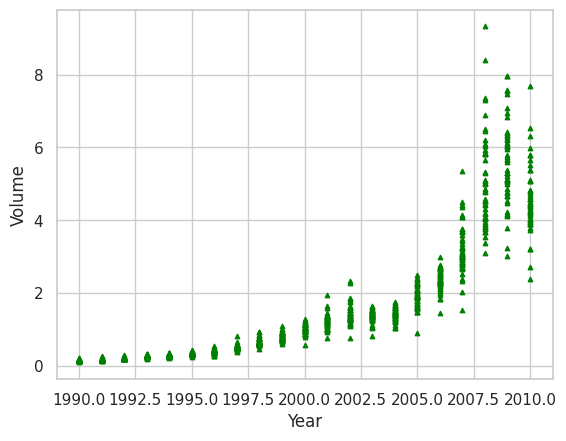

In [464]:
plt.scatter(Weekly.Year, Weekly.Volume, c="green", s=10, marker="^")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

Al graficar los datos vemos que el volumen aumenta con el tiempo


(b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [465]:
df = pd.get_dummies(Weekly, columns=["Direction"], drop_first=True)
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [466]:
# Datos
X = df[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
y = df[["Direction_Up"]]

In [467]:
X = sm.add_constant(X)
model1 = sm.Logit(y, X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4


In [468]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                     inf
Time:                        21:21:14   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


Los p_values son muy grandes por lo que no hay evidencia clara de una asociación de los Lag y Volume con respecto a la Dirección. Con excepción de Lag2 que tiene un p-value de 0.03


(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.


In [469]:
df_performance = pd.DataFrame(
    {"Accuracy": [], "Precision": [], "Recall": [], "AUC": []}
)

In [470]:
# Dividimos los datos en conjunto de entrenamiento y pruebas
# 40% son utilizados para las pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=42
)

In [471]:
# Escalar el conjunto de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [472]:
# Modelo de regresión logistica
model_rl = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


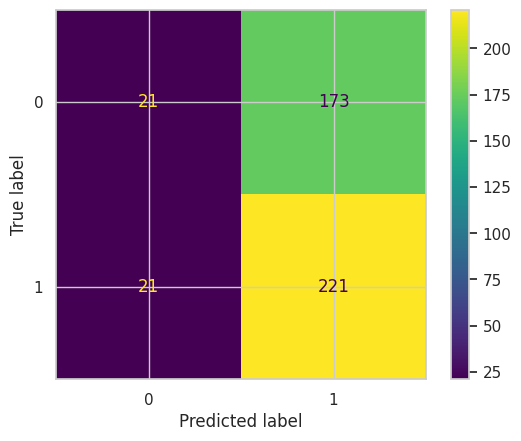

In [473]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()

In [474]:
print("Informe de clasificación:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

Informe de clasificación:
Accuracy: 0.555045871559633
Precision: 0.5609137055837563
Recall: 0.9132231404958677
AUC: 0.5485643690892051


In [475]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

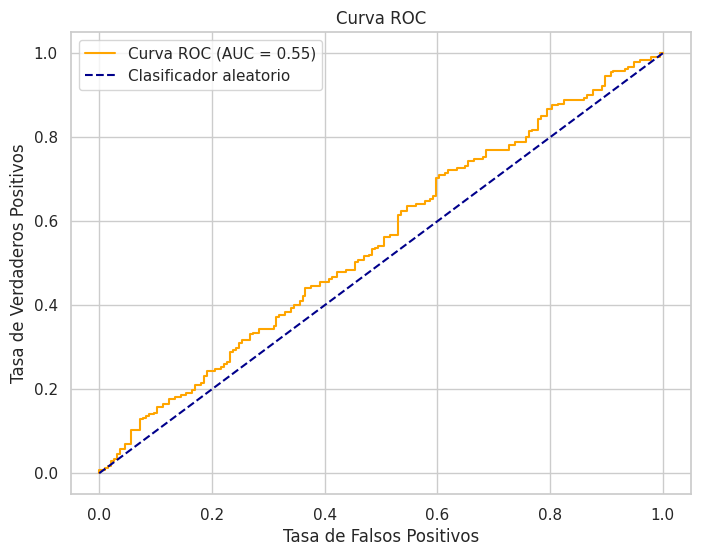

In [476]:
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).


In [477]:
df1 = df[["Year", "Lag2", "Direction_Up"]]
df1

train = df1.Year < 2009
X_train = df1.loc[train]
X_test = df1.loc[~train]
y_train = df1.loc[train]
y_test = df1.loc[~train]

In [478]:
X_train = X_train[["Lag2"]]
X_test = X_test[["Lag2"]]
y_train = y_train[["Direction_Up"]]
y_test = y_test[["Direction_Up"]]

In [479]:
# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


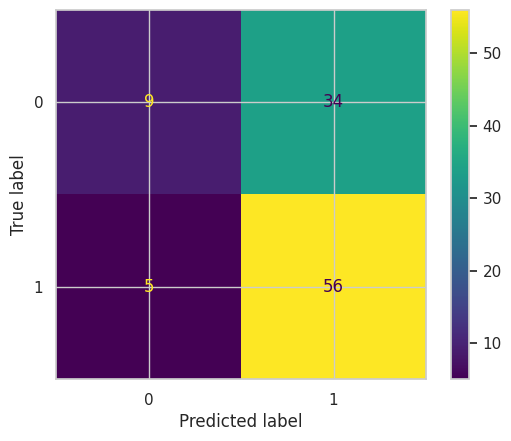

In [480]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()

In [481]:
print("Informe de clasificación:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

df_performance.loc["Regresión Logística", :] = [accuracy, precision, recall, auc]

Informe de clasificación:
Accuracy: 0.625
Precision: 0.6222222222222222
Recall: 0.9180327868852459
AUC: 0.5463210064811285


In [482]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

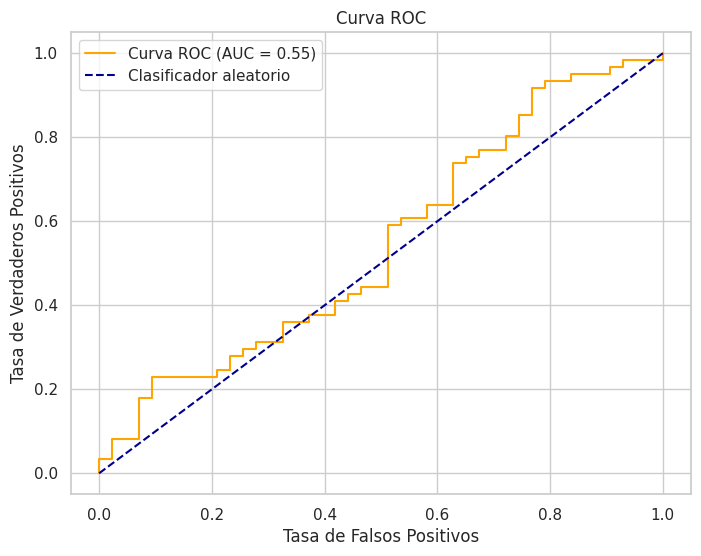

In [483]:
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

(e) Repeat (d) using LDA


In [484]:
# Create an LDA classifier
lda = LDA()

# Fit the classifier to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)
y_pred_score = lda.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


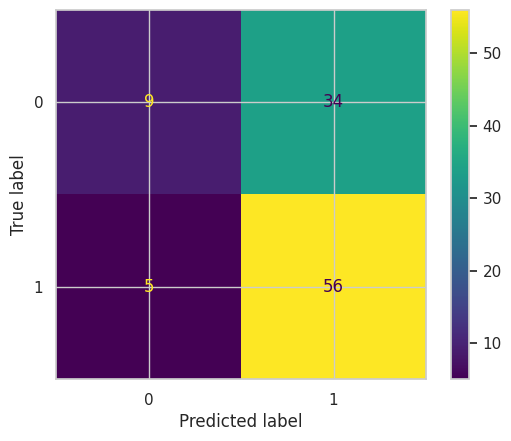

In [485]:
# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot()
plt.show()

In [486]:
print("Informe de clasificación:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

df_performance.loc["LDA", :] = [accuracy, precision, recall, auc]

Informe de clasificación:
Accuracy: 0.625
Precision: 0.6222222222222222
Recall: 0.9180327868852459
AUC: 0.5463210064811285


(f) Repeat (d) using QDA.


In [487]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
y_pred_score = qda.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


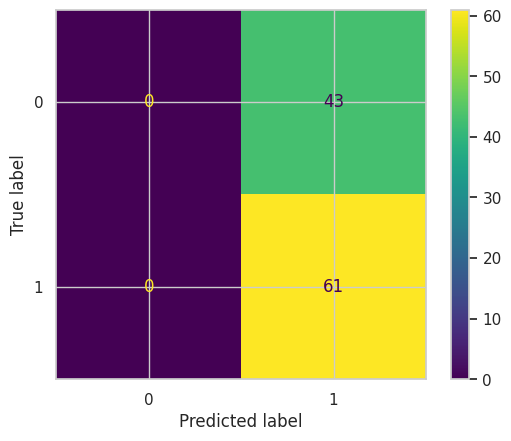

In [488]:
# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=qda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=qda.classes_)
disp.plot()
plt.show()

In [489]:
print("Informe de clasificación:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

df_performance.loc["QDA", :] = [accuracy, precision, recall, auc]

Informe de clasificación:
Accuracy: 0.5865384615384616
Precision: 0.5865384615384616
Recall: 1.0
AUC: 0.508577964163172


(g) Repeat (d) using KNN with K = 1.


In [490]:
# Create a KNN classifier with a specified number of neighbors (e.g., 3)
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)
y_pred_score = knn.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


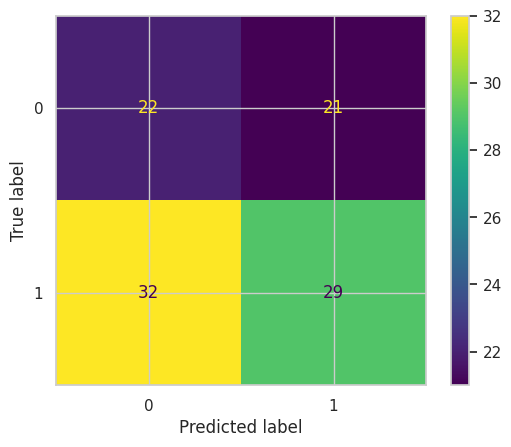

In [491]:
# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [492]:
print("Informe de clasificación:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Precisión del modelo: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

df_performance.loc["KNN", :] = [accuracy, precision, recall, auc]

Informe de clasificación:
Precisión del modelo: 0.49038461538461536
Precision: 0.58
Recall: 0.47540983606557374
AUC: 0.493518871521159


(h) Repeat (d) using naive Bayes.


In [493]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)
y_pred_score = knn.predict_proba(X_test)[:, 1]

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusión:


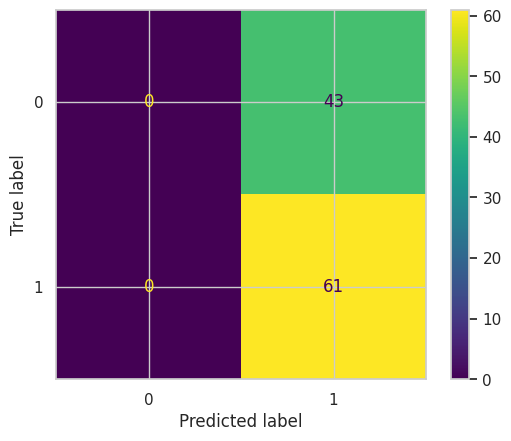

In [494]:
# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=nb_classifier.classes_
)
disp.plot()
plt.show()

In [495]:
print("Informe de clasificación:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

df_performance.loc["Naive Bayes", :] = [accuracy, precision, recall, auc]

Informe de clasificación:
Accuracy: 0.5865384615384616
Precision: 0.5865384615384616
Recall: 1.0
AUC: 0.493518871521159


(i) Which of these methods appears to provide the best results on this data?


In [496]:
df_performance

,Accuracy,Precision,Recall,AUC
Regresión Logística,0.625000,0.622222,0.918033,0.546321
LDA,0.625000,0.622222,0.918033,0.546321
QDA,0.586538,0.586538,1.000000,0.508578
KNN,0.490385,0.580000,0.475410,0.493519
Naive Bayes,0.586538,0.586538,1.000000,0.493519


Según las métricas, tanto la regresión logística como LDA dan los mejores resultados similares.


(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.


## Regresión lineal logistica con las variables: Year, Lag2 y Volume


In [497]:
df = pd.get_dummies(Weekly, columns=["Direction"], drop_first=True)
X = df[["Year", "Lag2", "Volume"]]
y = df[["Direction_Up"]]
# 0=Down, 1=Up
X = sm.add_constant(X)
model1 = sm.Logit(y, X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 1.249369
         Iterations 5


In [498]:
result1.summary()

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                     inf
Time:                        21:21:16   Log-Likelihood:                -1360.6
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1144     37.678      0.613      0.540     -50.732      96.961
Year          -0.0115      0.019     -0.607      0.544      -0.048       0.026
Lag2           0.0631      0.027      2.376      0.017       0.011       0.115
Volume         0.0208      0.068      0.307      0.759      -0.112       0.154
==============================================================================
"""

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


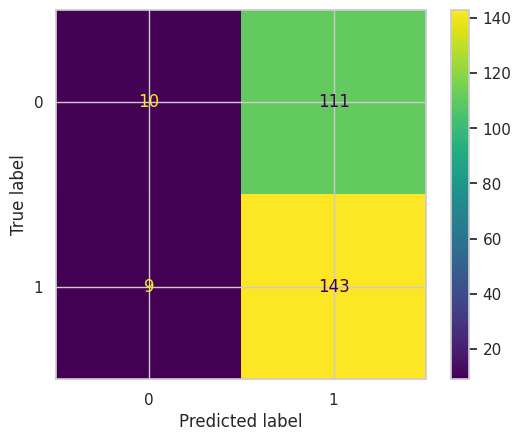

Informe de clasificación:
Accuracy: 0.5604395604395604
Precision: 0.562992125984252
Recall: 0.9407894736842105
AUC: 0.5570900391474554


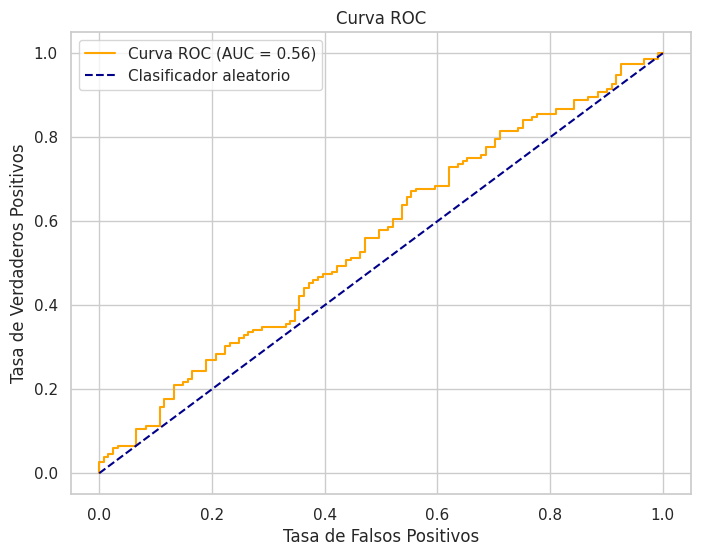

In [499]:
# Dividimos los datos en conjunto de entrenamiento y pruebas
# 25% son utilizados para las pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)
# Escalar el conjunto de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de regresión logistica
model_rl = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()
print("Informe de clasificación:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## Regresión lineal logística con las variables Lag1, Lag2 y Lag4


In [500]:
df = pd.get_dummies(Weekly, columns=["Direction"], drop_first=True)
X = df.drop(columns="Direction_Up")
X = X[["Lag1", "Lag2", "Lag4"]]
y = df[["Direction_Up"]]
# 0=Down, 1=Up
X = sm.add_constant(X)
model1 = sm.Logit(y, X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 1.618805
         Iterations 4


In [501]:
result1.summary()

/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                     inf
Time:                        21:21:17   Log-Likelihood:                -1762.9
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2252      0.062      3.653      0.000       0.104       0.346
Lag1          -0.0404      0.026     -1.538      0.124      -0.092       0.011
Lag2           0.0617      0.027      2.318      0.020       0.010       0.114
Lag4          -0.0245      0.026     -0.935      0.350      -0.076       0.027
==============================================================================
"""

Accuracy del modelo: 0.5567765567765568


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


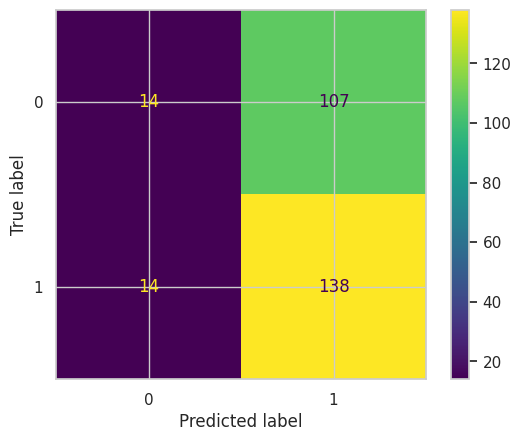


Informe de clasificación:
Precision: 0.563265306122449
Recall: 0.9078947368421053
auc: 0.54458460200087


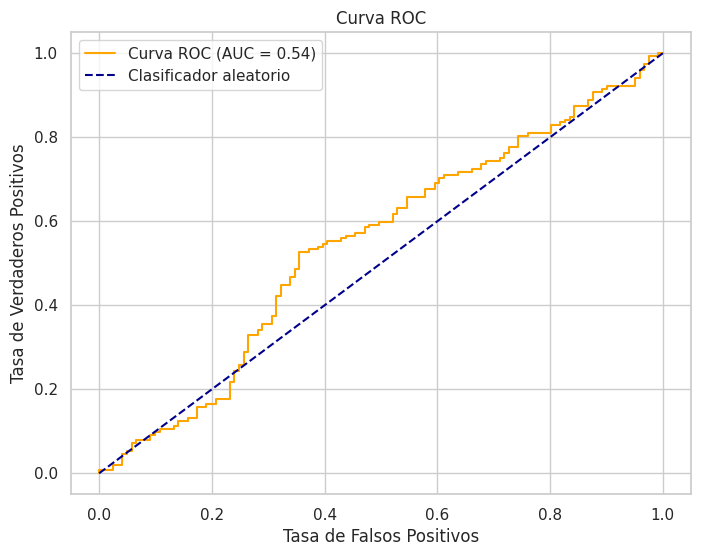

In [502]:
# Dividimos los datos en conjunto de entrenamiento y pruebas
# 25% son utilizados para las pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)
# Escalar el conjunto de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de regresión logistica
model_rl = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)
y_pred_score = model_rl.predict_proba(X_test)[:, 1]
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rl.classes_)
disp.plot()
plt.show()
print("\nInforme de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"auc: {auc}")
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
# Graficar la curva ROC
plt.figure("ROC Regresion Logistica", figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {auc:.2f})")
plt.plot(
    [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## KNN, con K = 2


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Precisión del modelo: 0.5274725274725275


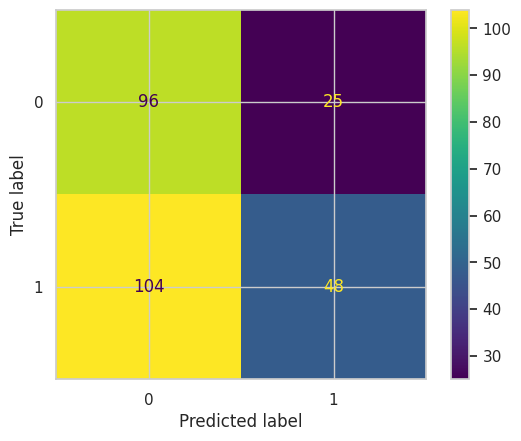

Informe de clasificación:
Precision: 0.6575342465753424
Recall: 0.3157894736842105
ROC-AUC: 0.5561113527620706


In [503]:
# Create a KNN classifier with a specified number of neighbors (e.g., 3)
k = 2
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)
y_pred_score = knn.predict_proba(X_test)[:, 1]
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
print("Informe de clasificación:")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_score)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {auc}")

# Sección 4.8 problema 16

Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.

Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.


In [504]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    roc_curve,
)

In [505]:
boston = load_data("Boston")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [506]:
# Agregar la variable de respuesta (tasa de criminalidad superior o inferior a la mediana)
median_crime = np.median(boston.crim)
boston["crim"] = np.where(boston > median_crime, 1, 0)

In [507]:
# Dividir el conjunto de datos en características (X) y variable de respuesta (y)
X = boston.drop("crim", axis=1)
y = boston["crim"]

In [508]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [509]:
# Escalar las características para algunos modelos (p. ej., KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [510]:
# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
}

Informe de clasificación:
Model: Logistic Regression


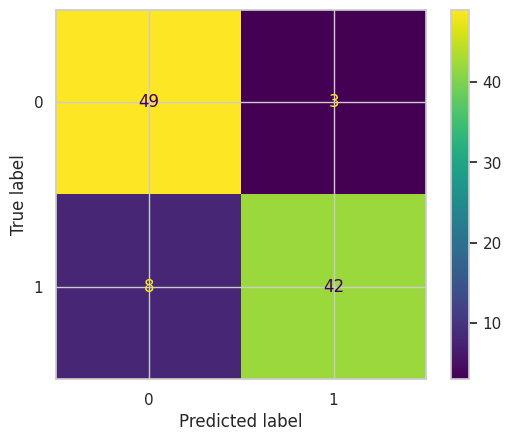

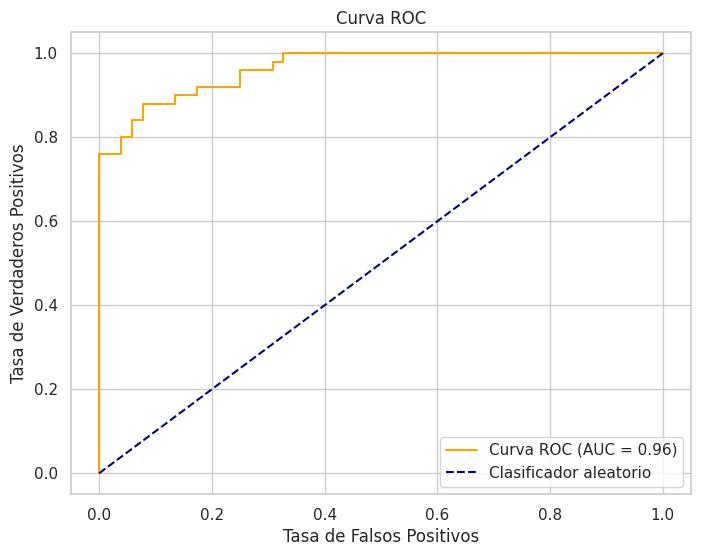

Precision: 0.9333333333333333
Recall: 0.84
auc: 0.9642307692307693
Accuracy: 0.8922
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        52
           1       0.93      0.84      0.88        50

    accuracy                           0.89       102
   macro avg       0.90      0.89      0.89       102
weighted avg       0.90      0.89      0.89       102


Informe de clasificación:
Model: LDA


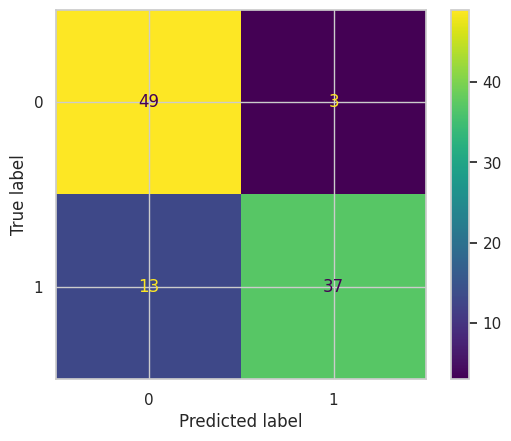

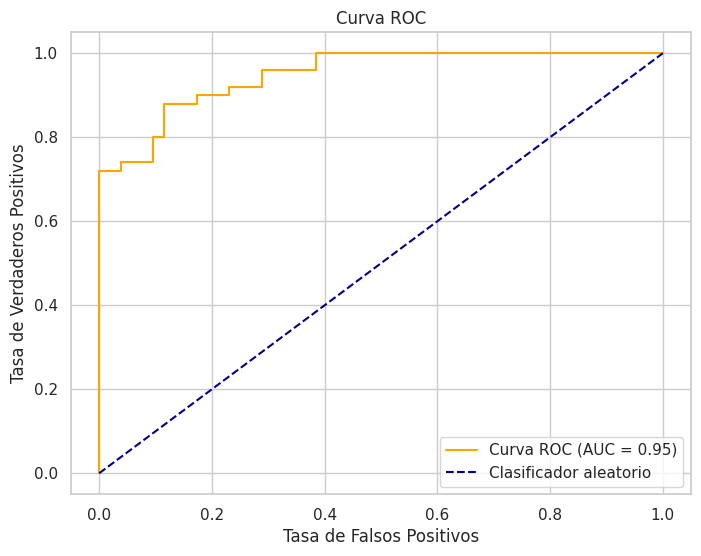

Precision: 0.925
Recall: 0.74
auc: 0.9492307692307693
Accuracy: 0.8431
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        52
           1       0.93      0.74      0.82        50

    accuracy                           0.84       102
   macro avg       0.86      0.84      0.84       102
weighted avg       0.86      0.84      0.84       102


Informe de clasificación:
Model: Naive Bayes


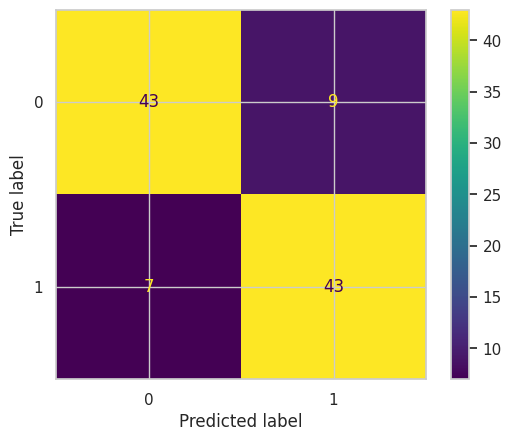

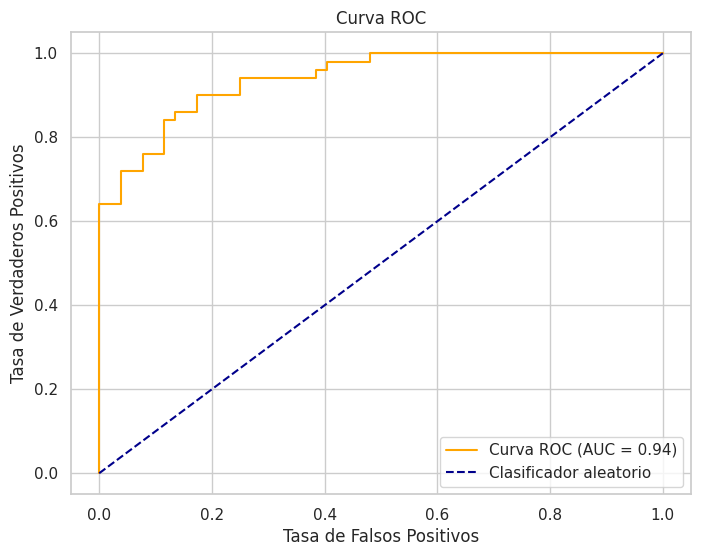

Precision: 0.8269230769230769
Recall: 0.86
auc: 0.9396153846153845
Accuracy: 0.8431
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        52
           1       0.83      0.86      0.84        50

    accuracy                           0.84       102
   macro avg       0.84      0.84      0.84       102
weighted avg       0.84      0.84      0.84       102


Informe de clasificación:
Model: KNN


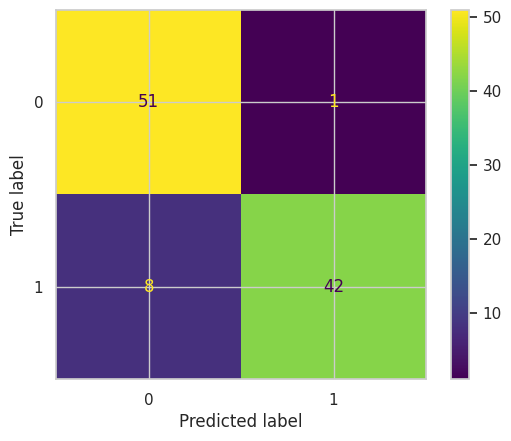

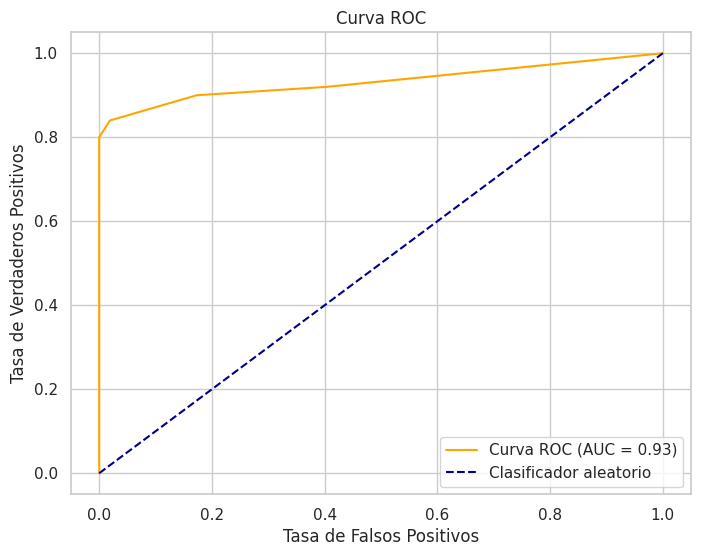

Precision: 0.9767441860465116
Recall: 0.84
auc: 0.931923076923077
Accuracy: 0.9118
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.98      0.84      0.90        50

    accuracy                           0.91       102
   macro avg       0.92      0.91      0.91       102
weighted avg       0.92      0.91      0.91       102




In [511]:
# Entrenar y evaluar modelos
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_score = model.predict_proba(X_test_scaled)[:, 1]

    # Hacer predicciones
    print("Informe de clasificación:")
    print(f"Model: {name}")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_score)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
    # Graficar la curva ROC
    plt.figure("ROC Regresion Logistica", figsize=(8, 6))
    plt.plot(fpr, tpr, color="orange", label=f"Curva ROC (AUC = {roc_auc:.2f})")
    plt.plot(
        [0, 1], [0, 1], color="darkblue", linestyle="--", label="Clasificador aleatorio"
    )
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title("Curva ROC")
    plt.legend()
    plt.show()

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"auc: {roc_auc}")

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n{'='*40}\n")

# Problema 1 sección 5.4 ejercicio 3


We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.


La validación cruzada (cross-validation) en k-folds se implementa con los siguientes pasos:

1. Se particiona aleatoriamente el conjunto de datos en `k` subconjuntos.

2. Se utilizan $k-1$ sunconjuntos para entrenar el modelo y el conjunto restante se utiliza para evaluarlo. Este proceso se repite $k$ veces, de tal forma que cada subconjunto se utiliza una vez para evaluar el modelo.

3. Se obtiene el promedio del error en las evaluaciones realizadas para obtener la estimación del error general del modelo. Es decir, se calcula al final una métrica de error ponderada. Por ejemplo, si estamos utilizando el $MSE$ como métrica de error, la estimación del error general del modelo sería:

$$ CV_k = \frac{1}{k} \sum_{i=1}^{n} MSE_i $$


(b) What are the advantages and disadvantages of k-fold cross-validation relative to:

Es importante recordar, que en el método **_k-fold cross validation_** existe un trafe-off entre sesgo y varianza según el valor que se elija de `k`.

Entre mayor sea el valor de `k`, la partición de los datos se asemeja cada vez más al método **_LOOCV_**, en el cual, una mayor proporción de los datos son incluidos en el conjunto de entrenamiento y, por lo tanto, el sesgo respecto a la estimación del error al utilizar todos los datos tiende a disminuir, mientras que la varianza y la flexibilidad de la estimación tienden a aumentar.

Por otra parte, entre menor sea el valor de `k`, la partición de los datos se asemeja cada vez más al enfoque de **_Validation set_**, por lo que aumenta el sesgo respecto a la estimación del error cuando se usan todos los datos, pero disminuye la varianza y la flexibilidad de la estimación.

En clonclusión, las ventajas y desventajas respecto a otro métodos, dependen del valor de `k`. Sin embargo, si asumimos un `k` igual a 5 o a 10, este método permite estimaciones sin un sesgo excesivamente grande ni de varianza muy alta. Por lo que vamos a asumir que el método usa un `k`= 5 para describir las ventajas y las desventajas respecto a los otros métodos.

i. The **_validation set approach_**?

- **Ventajas**:

  - En el enfoque de **_validation set_**, cuando se repite el proceso varias veces, el error estimado tiende a variar mucho, dada la partición aleatoria de los datos en cada repetición.
    Cuando se utiliza **_k-folds cross validation_** la variabilidad del error estimado disminuye considerablemente, porque no existen solo dos formas muy diferentes de separar los datos, sino k (5) formas (no tan diferentes entre sí) de hacerlo.

  - Si comparamos el error encontrado al entrenar el modelo con todos los datos, con el error encontrado con los enfoques de **_k-folds cross validation_** y de **_validation set_**. Se tiene que en el método de **_k-folds cross validation_**, hay un menor sesgo porque se utiliza una mayor cantidad de datos en el conjunto de entrenamiento, por lo que su estimación se acerca más a la estimación con todo el conjunto de datos.

- **Desventajas**:

  - Se tiene que realizar el entrenamiento $k$ veces, lo que puede ser más costoso computacionalmente cuando `k`>2.
  - Adicionalmente, tiene una mayor varianza que **_validation set_**. Lo que en algunos casos podría ser algo negativo.

  Sin embargo, para un `k`=5, estas dos desventajas no representan problemas mayores.

ii. **Leave-One-Out Cross Validation (LOOCV)**?

En general, las ventajas y deventajas, dependen del valor de `k`.

- **Ventajas**:

  - Para un `k`<`n` es menos costoso computacionalmente que **_LOOCV_**.
  - A menudo da estimaciones más precisas de la tasa de error que **_LOOCV_**, esto se debe al trade-off entre varianza y sesgo que hacen que dichas estimaciones no estén _sobreajustadas_.

- **Desventajas**:
  - Si no se elige el valor de `k` adecuado, este método podría tener un sesgo alto que no sea compensado por su baja varianza, o viceversa. Para un `k`=5, esto no representa un problema significativo.


# Problema 1 sección 5.4 ejercicio 5


In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.


In [512]:
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [513]:
df = load_data("Default")
df["default"] = df["default"].map({"Yes": 1, "No": 0})
df["student"] = df["student"].map({"Yes": 1, "No": 0})
print(df.shape)
df.head()

(10000, 4)


,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


(a) Fit a logistic regression model that uses `income` and `balance` to
predict `default`.


In [514]:
# Agregando constante para el intercepto
X = sm.add_constant(df[["balance", "income"]])
y = df["default"]
X.head()

,const,balance,income
0,1.0,729.526495,44361.625074
1,1.0,817.180407,12106.134700
2,1.0,1073.549164,31767.138947
3,1.0,529.250605,35704.493935
4,1.0,785.655883,38463.495879


In [515]:
# Ajustando modelo de Regresión Logistica
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.4594
Time:                        21:21:19   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training observations.

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassifed


In [516]:
# i. Separar la data en training y validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ii. Ajustar el modelo usando el training set
model = sm.Logit(y_train, X_train).fit()

# iii. Obtener predicción de validation con un umbral de decisión del 0.5
y_val_pred_proba = model.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

# iv. Caluclar el e rror en validation set
validation_error = (1 - accuracy_score(y_val, y_val_pred)) * 100

# Display the validation set error
display(model.summary())

print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred)*100:.2f}%")
print(f"Validation Set Error: {validation_error:.2f}%")

Optimization terminated successfully.
         Current function value: 0.076230
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.4743
Time:                        21:21:19   Log-Likelihood:                -609.84
converged:                       True   LL-Null:                       -1160.2
Covariance Type:            nonrobust   LLR p-value:                9.963e-240
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8297      0.506    -23.387      0.000     -12.821     -10.838
balance        0.0058      0.000     22.038      0.000       0.005       0.006
income      2.075e-05   5.64e-06      3.682      0.000    9.71e-06    3.18e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Validation Set Accuracy: 96.95%
Validation Set Error: 3.05%


(c) Repeat the process in (b) three times, using three diferent splits
of the observations into a training set and a validation set. Comment on the results obtained.


In [517]:
random_seed = 50

# Repetir el proceso 3 veces con diferentes particiones del conjunto de datos
for i in range(3):
    # i. Separar la data en training y validation set
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=random_seed + i
    )

    # ii. Ajustar el modelo usando el training set
    model = sm.Logit(y_train, X_train).fit()

    # iii. Obtener predicción de validation con un umbral de decisión del 0.5
    y_val_pred_proba = model.predict(X_val)
    y_val_pred = (y_val_pred_proba > 0.5).astype(int)

    # iv. Caluclar el error en validation set
    validation_error_percentage = (1 - accuracy_score(y_val, y_val_pred)) * 100

    # Mostrar los resultados de cada iretación
    print(
        f"\nIteration {i + 1}: Validation Set Error: {validation_error_percentage:.2f}%\n"
    )

Optimization terminated successfully.
         Current function value: 0.077885
         Iterations 10

Iteration 1: Validation Set Error: 2.90%

Optimization terminated successfully.
         Current function value: 0.077232
         Iterations 10

Iteration 2: Validation Set Error: 3.00%

Optimization terminated successfully.
         Current function value: 0.078456
         Iterations 10

Iteration 3: Validation Set Error: 2.60%



Se puede evidenciar que dada la distirbución aleatoria del conjunto de training y validation, en cada repetición, se asignan observaciones diferentes a cada uno de estos conjuntos y, por lo tanto, se obtienen estimaciones del error diferentes.


(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.


In [518]:
# Agregando constante al conjuinto de Variables X
X = sm.add_constant(df[["balance", "income", "student"]])
y = df["default"]

# i. Separar la data en training y validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ii. Ajustar el modelo usando el training set
model = sm.Logit(y_train, X_train).fit()

# iii. Obtener predicción de validation con un umbral de decisión del 0.5
y_val_pred_proba = model.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

# iv. Caluclar el error en validation set
validation_error_percentage = (1 - accuracy_score(y_val, y_val_pred)) * 100

# Mostrar el error sobre el conjunto de validación y los resultados
display(model.summary())
print(f"Validation Set Error: {validation_error_percentage:.2f}%")

Optimization terminated successfully.
         Current function value: 0.076032
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.4757
Time:                        21:21:20   Log-Likelihood:                -608.26
converged:                       True   LL-Null:                       -1160.2
Covariance Type:            nonrobust   LLR p-value:                5.404e-239
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3117      0.577    -19.614      0.000     -12.442     -10.181
balance        0.0059      0.000     21.933      0.000       0.005       0.006
income       7.21e-06   9.46e-06      0.763      0.446   -1.13e-05    2.57e-05
student       -0.4881      0.273     -1.790      0.074      -1.023       0.046
==============================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Validation Set Error: 3.05%


En este caso, agregar la variable binaria `student` no tienen ningún efecto sobre la estimación del error sobre el conjunto de validación. Dato que da 3.05% (lo mismo que dió el modelo sin esta variable con el misms `random_state`)


# Problema 1 sección 5.4 ejercicio 8


We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

`rng = np.random.default_rng(1)`

`x = rng.normal(size=100)`

`y = x - 2 * x**2 + rng.normal(size=100)`

In this data set, what is **_n_** and what is **_p_**?

Write out the model used to generate the data in equation form.


In [519]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut

In [520]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

**_n_**: es el número de observaciones, que en este caso es 100


In [521]:
print("Número de observaciones (n) de 'x' ^ 'y' = ", len(x))

Número de observaciones (n) de 'x' ^ 'y' =  100


**_p_**: Es el número de predictores del modelo, en este contexto `p`= 1 porque solo hay una variable predictora que es `x`.

El modelo usado para generar `y`, es una ecuacuión cuadrática que puede ser escrita como:

$$
y=\beta_0 + \beta_1 x + \beta_2 x^2+ \varepsilon
$$


Donde:

$$
\beta_0 = 0 , \beta_1 = 1,
 \beta_2 = -2
$$


Por lo tanto, la función se puede escribir como:

$$
y= x -2 x^2 + \varepsilon
$$


(b) Create a scatterplot of X against Y . Comment on what you fnd.


In [522]:
df = pd.DataFrame({"y": y, "x": x})
df.head()

,y,x
0,-0.544554,0.345584
1,0.333950,0.821618
2,-0.013532,0.330437
3,-4.030442,-1.303157
4,0.484861,0.905356


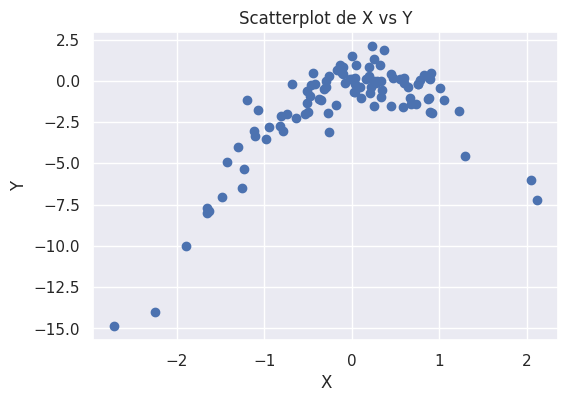

In [523]:
plt.figure(figsize=(6, 4))
sns.set_style("darkgrid")
fig = plt.scatter(df["x"], df["y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot de X vs Y")

plt.show()

Se puede evidenciar que no existe una relación lineal entre los datos. Por el contrario, existe una relación cuadrática, lo cual tiene sentido con la definición de la función.


(c) Set a random seed, and then compute the LOOCV errors that result from fItting the following four models using least squares:

$$
\text{1. } Y = \beta_0 + \beta_1X + \varepsilon
$$

$$
\text{2. } Y = \beta_0 + \beta_1X + \beta_2X^2+\varepsilon
$$

$$
\text{3. } Y = \beta_0 + \beta_1X + \beta_2X^2+\beta_3X^3+\varepsilon
$$

$$
\text{4. } Y = \beta_0 + \beta_1X + \beta_2X^2+\beta_3X^3+\beta_4X^4+\varepsilon
$$


#### Implementando el proceso manual


In [524]:
# Model 1: Y = β0 + β1X + E
model_1_formula = "y ~ x"
model_1_errors = []

# Model 2: Y = β0 + β1X + β2X2 + E
model_2_formula = "y ~ x + np.power(x, 2)"
model_2_errors = []

# Model 3: Y = β0 + β1X + β2X2 + β3X3 + E
model_3_formula = "y ~ x + np.power(x, 2) + np.power(x, 3)"
model_3_errors = []

# Model 4: Y = β0 + β1X + β2X2 + β3X3 + β4X4 + E
model_4_formula = "y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)"
model_4_errors = []

# Set a random seed
np.random.seed(42)

# Leave-One-Out Cross-Validation
for i in range(len(df)):
    # Prepare the data for each iteration
    train_data = df.drop(index=i)
    test_data = df.iloc[i]

    # Model i
    model_1 = sm.OLS.from_formula(model_1_formula, data=train_data).fit()
    model_1_errors.append((test_data["y"] - model_1.predict(test_data)) ** 2)

    # Model ii
    model_2 = sm.OLS.from_formula(model_2_formula, data=train_data).fit()
    model_2_errors.append((test_data["y"] - model_2.predict(test_data)) ** 2)

    # Model iii
    model_3 = sm.OLS.from_formula(model_3_formula, data=train_data).fit()
    model_3_errors.append((test_data["y"] - model_3.predict(test_data)) ** 2)

    # Model iv
    model_4 = sm.OLS.from_formula(model_4_formula, data=train_data).fit()
    model_4_errors.append((test_data["y"] - model_4.predict(test_data)) ** 2)

# Calculate Mean Squared Error (MSE) for each model
mse_model_1 = np.mean(model_1_errors)
mse_model_2 = np.mean(model_2_errors)
mse_model_3 = np.mean(model_3_errors)
mse_model_4 = np.mean(model_4_errors)

print(f"MSE Model 1: {mse_model_1}")
print(f"MSE Model 2: {mse_model_2}")
print(f"MSE Model 3: {mse_model_3}")
print(f"MSE Model 4: {mse_model_4}")

MSE Model 1: 6.633029839181983
MSE Model 2: 1.1229368563419688
MSE Model 3: 1.3017965489358871
MSE Model 4: 1.3323942694179303


#### Implementando el proceso con librería de ScikitLearn


In [525]:
# Models
model_formulas = [
    "y ~ x",
    "y ~ x + np.power(x, 2)",
    "y ~ x + np.power(x, 2) + np.power(x, 3)",
    "y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)",
]

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

avg_mse_scores = []

for formula in model_formulas:
    mse_scores = []
    for train_index, test_index in loo.split(df):
        train_data, test_data = df.iloc[train_index], df.iloc[test_index]

        # Fit the model using statsmodels
        model = sm.OLS.from_formula(formula, data=train_data).fit()

        # Make predictions on the test set
        predictions = model.predict(test_data)

        # Calculate mean squared error
        mse = np.mean((test_data["y"] - predictions) ** 2)
        mse_scores.append(mse)

    # Calculate Mean Squared Error (MSE) for each model
    avg_mse = np.mean(mse_scores)

    # Display the results
    print(f"MSE for model {formula}: {avg_mse}")
    avg_mse_scores.append(avg_mse)

MSE for model y ~ x: 6.633029839181983
MSE for model y ~ x + np.power(x, 2): 1.1229368563419688
MSE for model y ~ x + np.power(x, 2) + np.power(x, 3): 1.3017965489358871
MSE for model y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4): 1.3323942694179303


In [526]:
df_LOOCV = pd.DataFrame(
    {
        "Polinomio": [1, 2, 3, 4],
        "MSE_Manual": [mse_model_1, mse_model_2, mse_model_3, mse_model_4],
        "MSE_SkLearn": avg_mse_scores,
    }
)

df_LOOCV.head()

,Polinomio,MSE_Manual,MSE_SkLearn
0,1,6.633030,6.633030
1,2,1.122937,1.122937
2,3,1.301797,1.301797
3,4,1.332394,1.332394


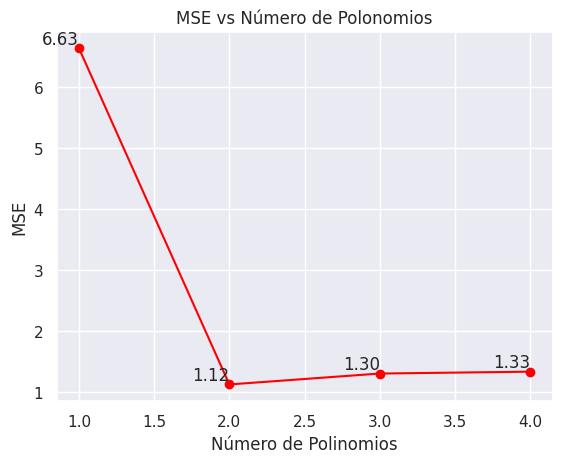

In [527]:
# Create a line plot
fig, ax = plt.subplots()
line = ax.plot(df_LOOCV["Polinomio"], df_LOOCV["MSE_SkLearn"], marker="o", color="red")

# Add labels to the values
for i, txt in enumerate(df_LOOCV["MSE_SkLearn"]):
    ax.text(
        df_LOOCV["Polinomio"][i],
        df_LOOCV["MSE_SkLearn"][i],
        f"{txt:.2f}",
        ha="right",
        va="bottom",
    )

# Adding labels and title
plt.xlabel("Número de Polinomios")
plt.ylabel("MSE")
plt.title("MSE vs Número de Polonomios")
plt.show()

(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

Dado que en `Leave-One-Out-Cross-Validation`, no se usa una distribución aleatoria, sino que se utiliza cada uno de las observaciones del dataset tanto en validación como en training, la `random seed` no tiene ningún efecto en los resultados.


(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

El modelo que tiene un menor LOOCV Error es el que usa solo dos polinomios, es decir:

$$Y=\beta_0+\beta_1X+\beta_2X^2+\varepsilon$$

Esto tiene sentido, dado que los valores de Y, se generaron utilizando X y X al cuadrado.


(f) Comment on the statistical signifcance of the coefcient estimates that results from ftting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?


#### Evaluación de significancia estadística de los coeficientes

Los coeficientes son estadísticamente significativos cuando se rechaza la Hipótesis nula de que sea igual a cero. Esto se hace cuando `p-value`<`alpha`

**Modelo1**:

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes y, por lo tanto, todos son estadísticamente significativos.


In [528]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     45.06
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.29e-09
Time:                        21:21:28   Log-Likelihood:                -229.02
No. Observations:                  99   AIC:                             462.0
Df Residuals:                      97   BIC:                             467.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4635      0.249     -5.869      0.000      -1.958      -0.969
x              1.9501      0.291      6.713      0.000       1.374       2.527
==============================================================================
Omnibus:                       52.008   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.499
Skew:                          -1.945   Prob(JB):                     4.19e-32
Kurtosis:                       7.460   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo2**:

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes a excepción del interpecto y, por lo tanto, `X` y `X**2` son estadísticamente significaivos.


In [529]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     379.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.57e-46
Time:                        21:21:28   Log-Likelihood:                -139.65
No. Observations:                  99   AIC:                             285.3
Df Residuals:                      96   BIC:                             293.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0600      0.120     -0.501      0.618      -0.298       0.178
x                  0.9702      0.126      7.673      0.000       0.719       1.221
np.power(x, 2)    -2.0081      0.091    -22.089      0.000      -2.189      -1.828
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                0.905
Skew:                           0.109   Prob(JB):                        0.636
Kurtosis:                       3.414   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo3**:

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes a excepción del interpecto y `X**3` y, por lo tanto, `X` y `X**2` son estadísticamente significaivos.


In [530]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     254.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.02e-45
Time:                        21:21:28   Log-Likelihood:                -139.00
No. Observations:                  99   AIC:                             286.0
Df Residuals:                      95   BIC:                             296.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0429      0.121     -0.355      0.723      -0.282       0.197
x                  1.1265      0.188      6.001      0.000       0.754       1.499
np.power(x, 2)    -2.0529      0.099    -20.708      0.000      -2.250      -1.856
np.power(x, 3)    -0.0677      0.060     -1.125      0.263      -0.187       0.052
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.466
Skew:                           0.038   Prob(JB):                        0.792
Kurtosis:                       3.327   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo4**:

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes a excepción del interpecto, `X**3` y `X**4` y, por lo tanto, `X` y `X**2` son estadísticamente significaivos.


In [531]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.76e-45
Time:                        21:21:28   Log-Likelihood:                -136.21
No. Observations:                  99   AIC:                             282.4
Df Residuals:                      94   BIC:                             295.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1172      0.136      0.859      0.393      -0.154       0.388
x                  0.9156      0.205      4.475      0.000       0.509       1.322
np.power(x, 2)    -2.5161      0.221    -11.386      0.000      -2.955      -2.077
np.power(x, 3)     0.0311      0.072      0.430      0.669      -0.113       0.175
np.power(x, 4)     0.1052      0.045      2.332      0.022       0.016       0.195
==============================================================================
Omnibus:                        2.661   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.377
Skew:                           0.105   Prob(JB):                        0.305
Kurtosis:                       3.729   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estas conclusiones están alineadas con lo mencionado en los resultados de Cross-Validation y con la definición de la variable Y. Dado que solo son estadísticamente significativos los coeficientes que componen a Y, y que están en el modelo que tiene el menor error de validación.


# Sección 12.6, Problema 3


In this problem, you will perform K-means clustering manually, with `K = 2`, on a small example with `n = 6` observations and `p = 2` features. The observations are as follows.


(a) Plot the observations.

In [532]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

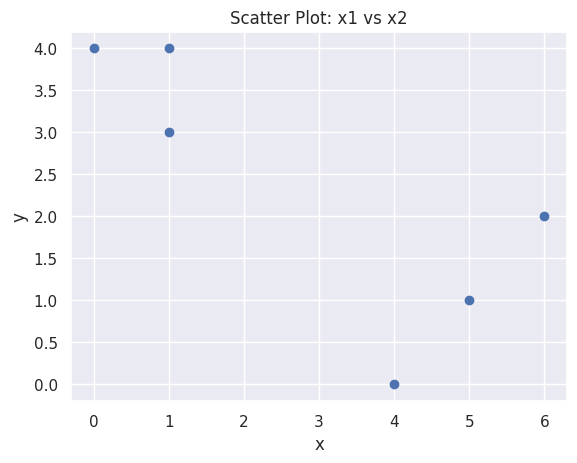

In [533]:
x1 = np.array([1, 1, 0, 5, 6, 4])
x2 = np.array([4, 3, 4, 1, 2, 0])
df = pd.DataFrame({"x1": x1, "x2": x2})
plt.scatter(x1, x2)
plt.title("Scatter Plot: x1 vs x2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(b) Randomly assign a cluster label to each observation. You can use
the `np.random.choice()` function to do this. Report the cluster
labels for each observation.


In [534]:
df["cluster"] = np.random.choice([0, 1], size=len(df))
df.head()

,x1,x2,cluster
0,1,4,0
1,1,3,1
2,0,4,0
3,5,1,0
4,6,2,0


(c) Compute the centroid for each cluster.


In [535]:
cluster0 = df[df["cluster"] == 0]
cluster1 = df[df["cluster"] == 1]
mean0 = cluster0.mean()
mean1 = cluster1.mean()
centroid0 = np.array([mean0["x1"], mean0["x2"]])
centroid1 = np.array([mean1["x1"], mean1["x2"]])
print(f"Centroid for cluster 0: ({centroid0[0]}, {centroid0[1]})")
print(f"Centroid for cluster 1: ({centroid1[0]}, {centroid1[1]})")

Centroid for cluster 0: (3.0, 2.75)
Centroid for cluster 1: (2.5, 1.5)


(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation


In [536]:
def calculate_shortest_distance(row):
    x = np.array([row["x1"], row["x2"]])
    distance0 = np.linalg.norm(x - centroid0)
    distance1 = np.linalg.norm(x - centroid1)
    if distance0 < distance1:
        row["cluster"] = 0
    else:
        row["cluster"] = 1
    return row


df = df.apply(calculate_shortest_distance, axis=1)
df.head()

,x1,x2,cluster
0,1,4,0
1,1,3,0
2,0,4,0
3,5,1,1
4,6,2,0


(e) Repeat (c) and (d) until the answers obtained stop changing.


In [537]:
initial_cluster = df["cluster"].copy()
while initial_cluster.equals(df["cluster"]) == False:
    cluster0 = df[df["cluster"] == 0]
    cluster1 = df[df["cluster"] == 1]
    mean0 = cluster0.mean()
    mean1 = cluster1.mean()
    centroid0 = np.array([mean0["x1"], mean0["x2"]])
    centroid1 = np.array([mean1["x1"], mean1["x2"]])
    df = df.apply(calculate_shortest_distance, axis=1)
df.head()

,x1,x2,cluster
0,1,4,0
1,1,3,0
2,0,4,0
3,5,1,1
4,6,2,0


(f) In your plot from (a), color the observations according to the
cluster labels obtained


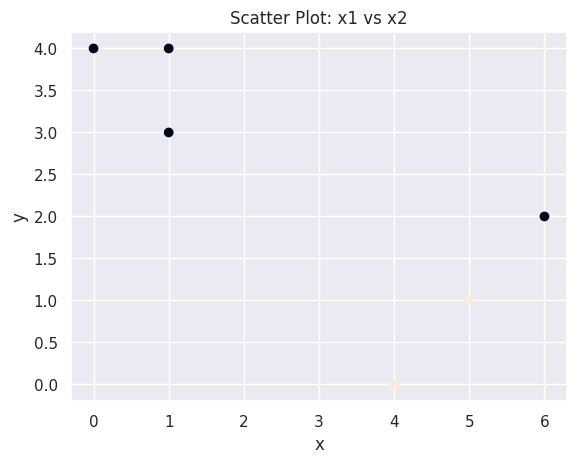

In [538]:
plt.scatter(x1, x2, c=df["cluster"])
plt.title("Scatter Plot: x1 vs x2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Sección 12.6 problema 10


In [539]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in Python that you can
use to generate data. One example is the normal() method of
the random() function in numpy; the uniform() method is another
option. Be sure to add a mean shift to the observations in each
class so that there are three distinct classes.


In [540]:
# Generar datos aleatorios

Class1 = np.random.normal(loc=0, scale=1, size=(20, 50))
Class2 = np.random.normal(loc=3, scale=1, size=(20, 50))
class3 = np.random.normal(loc=6, scale=1, size=(20, 50))

# Combinar los datos en un solo conjunto de datos

simulated_data = np.vstack((Class1, Class2, class3))

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors


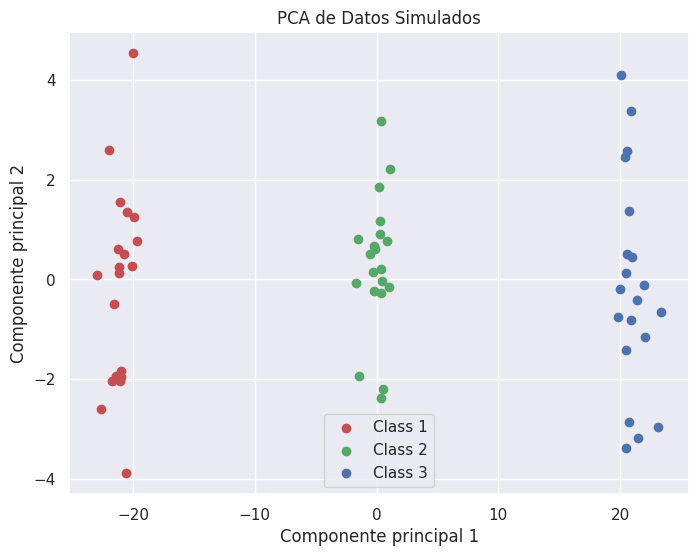

In [541]:
# Realizar PCA en los datos
pca = PCA(n_components=2)
pca_result = pca.fit_transform(simulated_data)

# Crear un gráfico de dispersión de los datos proyectados en las dos primeras componentes principales
plt.figure(figsize=(8, 6))
colors = ["r", "g", "b"]
for i in range(3):
    plt.scatter(
        pca_result[i * 20 : (i + 1) * 20, 0],
        pca_result[i * 20 : (i + 1) * 20, 1],
        c=colors[i],
        label="Class {}".format(i + 1),
    )
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("PCA de Datos Simulados")
plt.legend()
plt.show()

(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same


In [542]:
# Realizar K-means clustering en los datos proyectados en las dos primeras componentes principales

KMeans_1 = KMeans(n_clusters=3)
KMeans_1.fit(simulated_data)
cluster_labels = KMeans_1.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)
print(crosstab)

col_0   0   1   2
row_0            
0       0   0  20
1      20   0   0
2       0  20   0


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


La tabla de contingencia que se genera muestra que los clusters obtenidos mediante K-means se alinean perfectamente con las las clases verdaderas. Cada una de las tres clases verdaderas tienen un cluster correspondiente en la tabla y todas las observaciones en cada cluster peternecen a la misla clase verdadera.


(d) Perform K-means clustering with K = 2 . Describe your results


In [543]:
# Realizar K-means clustering en los datos proyectados en las dos primeras componentes principales

KMeans_2 = KMeans(n_clusters=2)
KMeans_2.fit(simulated_data)
cluster_labels = KMeans_2.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)

print(crosstab)

col_0   0   1
row_0        
0       0  20
1      20   0
2      20   0


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


La tabla de contigencia nos muestra que los cluster obtenidos utilizando K = 2 no se alinean perfectamente con las clases verdaderas. La clase verdadera 0 se divide en dos clusters, uno con 20 observaciones y otro con 0 observaciones, mientras que la clase verdadera 1 se divide en dos clusters, uno con 0 observaciones y otros con 20 observaciones. La clase verdadera 2 se asigna complentamente a un solo cluster.


(e) Perform K-means clustering with K = 4 . Describe your results


In [544]:
# Realizar K-means clustering en los datos proyectados en las dos primeras componentes principales

KMeans_3 = KMeans(n_clusters=4)
KMeans_3.fit(simulated_data)
cluster_labels = KMeans_3.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)

print(crosstab)

col_0   0   1   2   3
row_0                
0       0  20   0   0
1       0   0  20   0
2      10   0   0  10


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Esto demuestra qye ek akgoritmo K means con K= 4 no ha sido capaz de identificar correctamente las tres clases distintas en los datos simulados.


(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.


In [545]:
# Realizar K-means clustering en los dos primeros vectores de puntuación de PCA
Kmeans_pca = KMeans(n_clusters=3)
Kmeans_pca.fit(pca_result)
cluster_labels = Kmeans_pca.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)

print(crosstab)

col_0   0   1   2
row_0            
0       0   0  20
1      20   0   0
2       0  20   0


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Utilizando el metodo de PCA (Disminución de dimensionalidad ), la tabla de contingencia que se genera muestra que los clusters obtenidos mediante K-means se alinean perfectamente con las las clases verdaderas. Cada una de las tres clases verdaderas tienen un cluster correspondiente en la tabla y todas las observaciones en cada cluster peternecen a la misla clase verdadera.


(g) Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have
standard deviation one. How do these results compare to those
obtained in (b)? Explain.


In [546]:
# Realizar K-means clustering en los dato originales del punto b

Kmeans_original = KMeans(n_clusters=3)
Kmeans_original.fit(simulated_data)
cluster_labels_original = Kmeans_original.labels_

# Calcular la inercia y el de Silhouette para los resultados de clustering en los datos originales

inertia_oroginal = Kmeans_original.inertia_
silhouette_original = silhouette_score(simulated_data, cluster_labels_original)

# Crear una instancia de StandardScaler y realizar el escalado estándar de los datos simulados
scaler = StandardScaler()

# Escalar los datos del punto g
scaled_data = scaler.fit_transform(simulated_data)

# Realizar K-means clustering en los datos escalados

kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(scaled_data)
cluster_labels_scaled = kmeans_scaled.labels_

## Calcular la inercia y el de Silhouette para los resultados de clustering en los datos escalados

inertia_scaled = kmeans_scaled.inertia_
silhouette_scaled = silhouette_score(scaled_data, cluster_labels_scaled)

# Comparar las metricas de evaluación de clustering en los datos originales y escalados

print("Inercia de los datos originales: ", inertia_oroginal)
print("Inercia de los datos escalados: ", inertia_scaled)
print("Silhouette de los datos originales: ", silhouette_original)
print("Silhouette de los datos escalados: ", silhouette_scaled)

Inercia de los datos originales:  2825.1350319554062
Inercia de los datos escalados:  413.2112516988479
Silhouette de los datos originales:  0.5692738872885593
Silhouette de los datos escalados:  0.5688000722709156


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Los resultados indican que la estandarización de los datos tuvo un impacto significativo en la estructura de los clusters. La inercia de los datos escalados es mucho menor que la de los datos originales, lo que sugiere que los clusters escalados están más densamente agrupados que los datos originales. (Una incercia más baja indica que los puntos dentro de cada cluster están más cerca de sus respectivos centroides). Sin embargo, el índice de Silueta para los datos escalados es ligeramente menor que el de los datos originales, lo que sugiere que los clusters escalados pueden no ser tan bien definidos como los originales. Aun así, dio más cercano a 0


# Sección 12.6, Problema 13


On the book website, www.statlearning.com, there is a gene expression data set (Ch12Ex13.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.


In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram
from ISLP.cluster import compute_linkage
from scipy.spatial.distance import correlation
from scipy.stats import ttest_ind

(a) Load in the data using pd.read_csv(). You will need to select header = None.


In [548]:
df = pd.read_csv("Ch12Ex13.csv", header=None).T
df.shape

(40, 1000)

(b) Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?


In [549]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


In [550]:
# tabla_datos = ...

# Inicializa una matriz de distancias
matriz_distancias = np.zeros((40, 40))

# Calcula la distancia euclidiana entre cada par de muestras
for i in range(40):
    for j in range(40):
        matriz_distancias[i, j] = correlation(df.loc[i, :], df.loc[j, :])

# Imprime la matriz de distancias
print(matriz_distancias)

[[0.         1.02801306 0.98469742 ... 1.04080076 1.0637182  1.04090627]
 [1.02801306 0.         1.03759278 ... 1.00582427 1.00777069 0.99765448]
 [0.98469742 1.03759278 0.         ... 0.97236451 1.03274407 0.97561676]
 ...
 [1.04080076 1.00582427 0.97236451 ... 0.         0.68754848 0.71859267]
 [1.0637182  1.00777069 1.03274407 ... 0.68754848 0.         0.69205911]
 [1.04090627 0.99765448 0.97561676 ... 0.71859267 0.69205911 0.        ]]


Text(0.5, 1.0, 'Complete Linkage with Correlation-Based Dissimilarity')

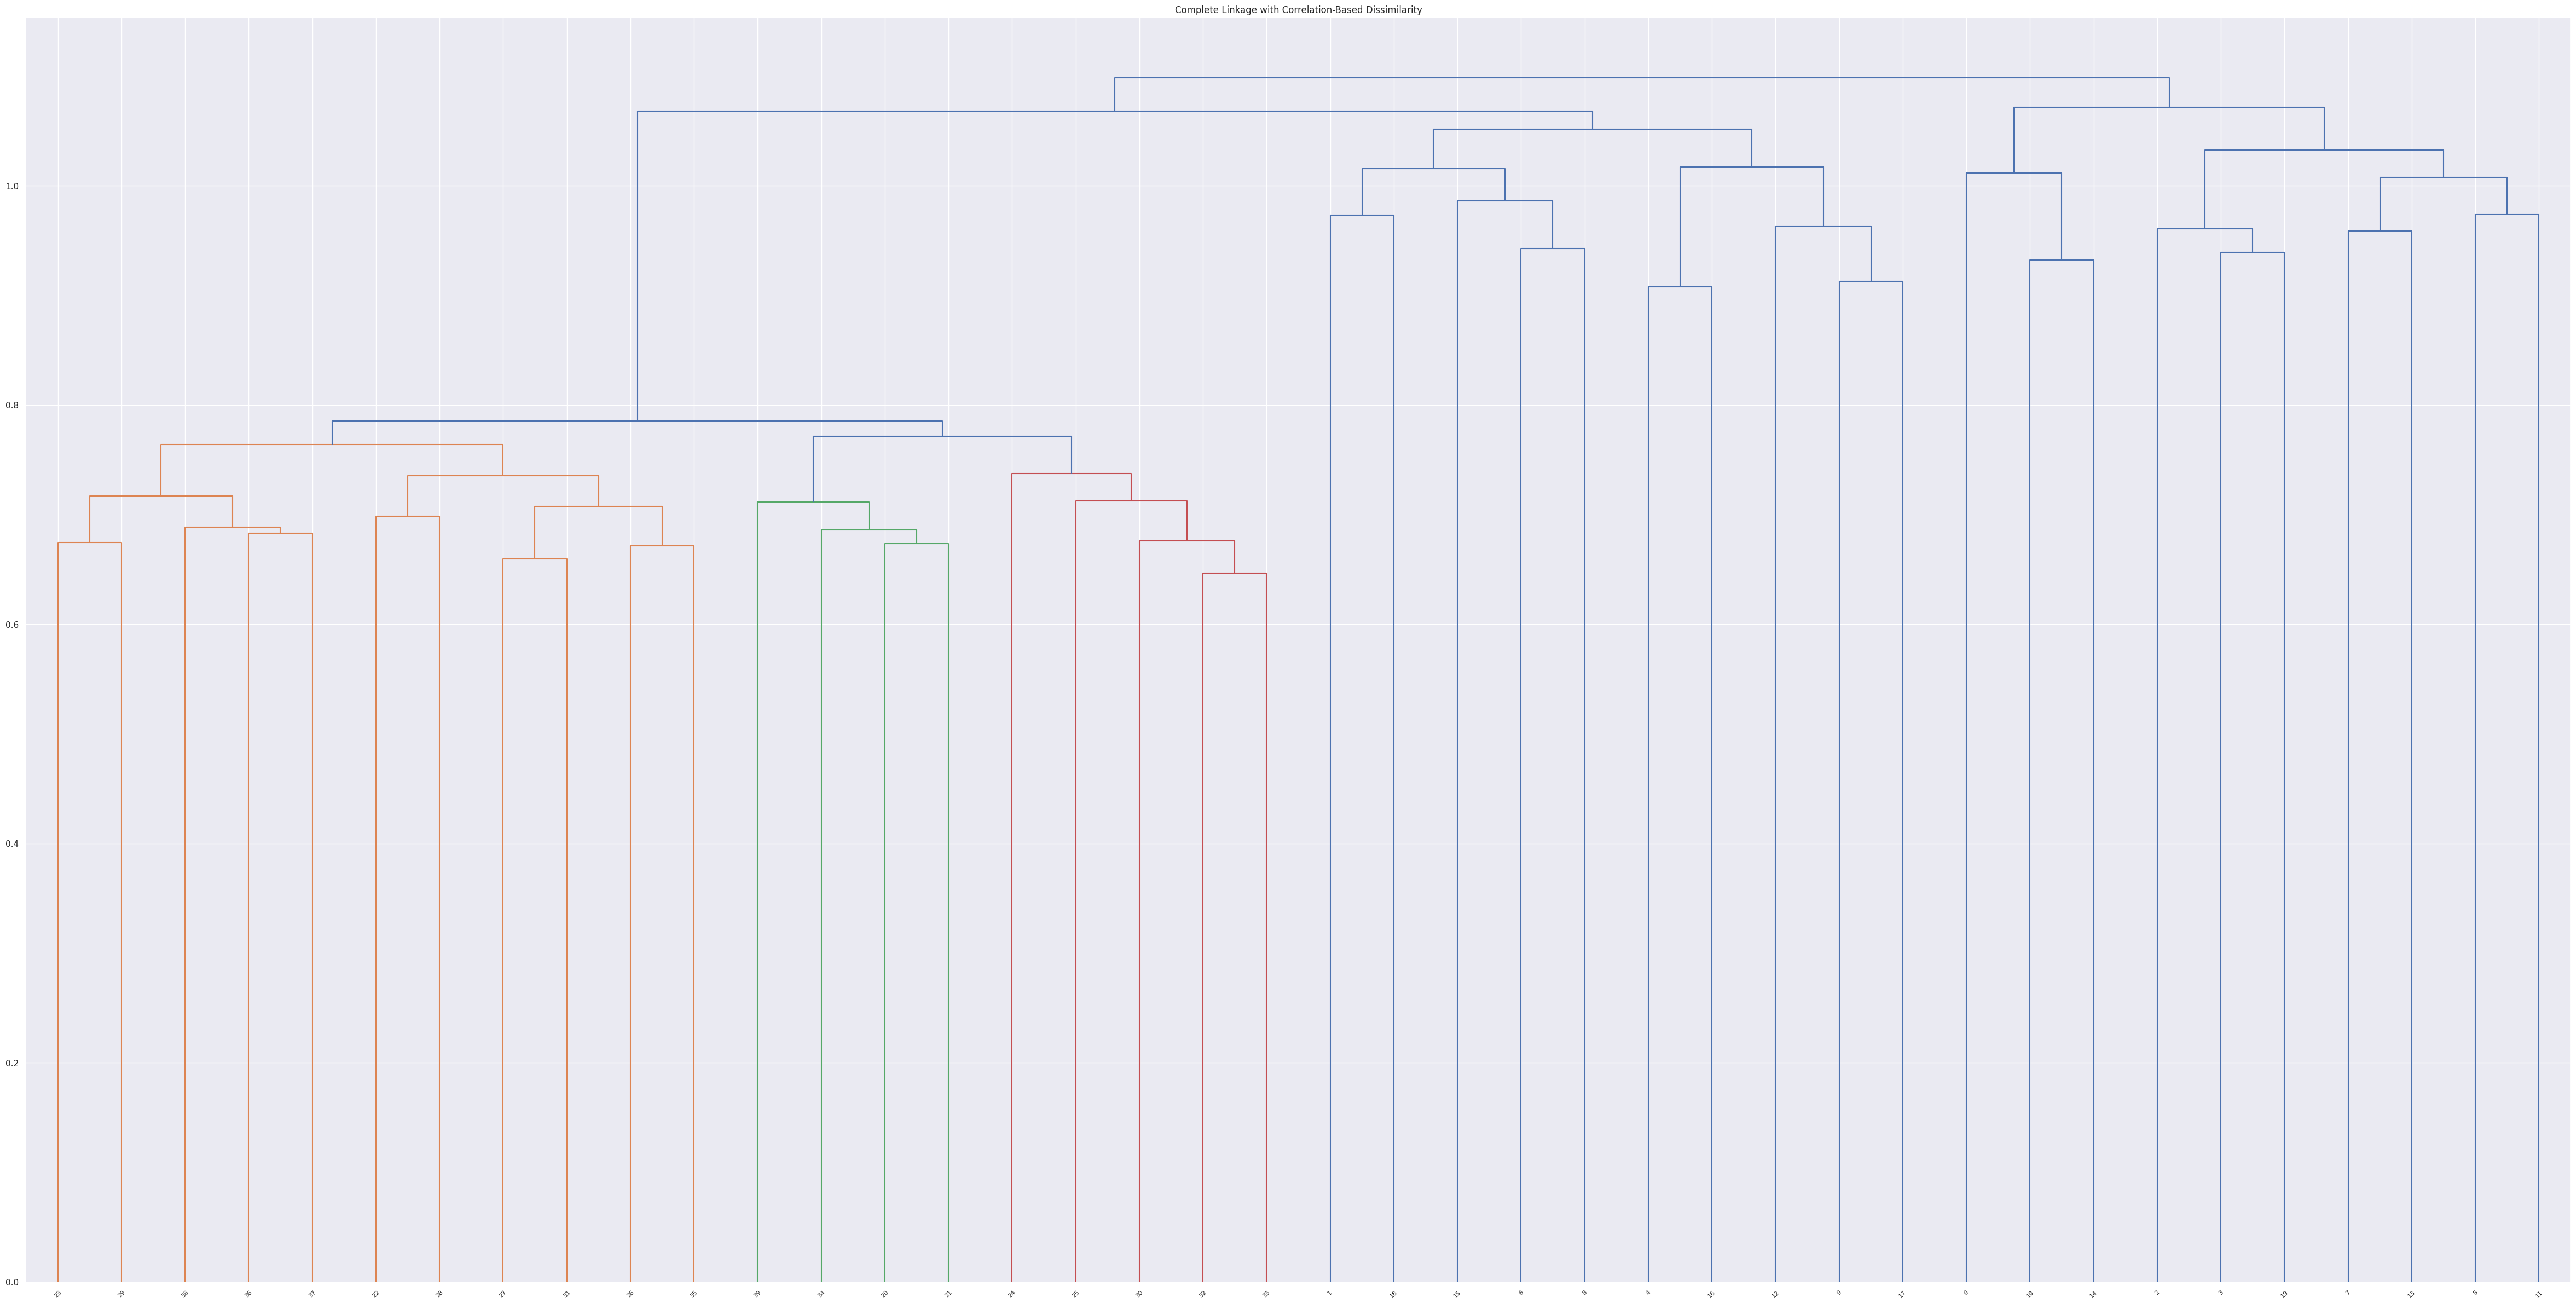

In [551]:
hc_cor1 = AgglomerativeClustering(
    linkage="complete", compute_distances=True, n_clusters=2, metric="precomputed"
)
hc_cor1.fit(matriz_distancias)
linkage_cor = compute_linkage(hc_cor1)
fig, ax = plt.subplots(1, 1, figsize=(60, 30))
dendrogram(linkage_cor, ax=ax)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity")

Text(0.5, 1.0, 'Single Linkage with Correlation-Based Dissimilarity')

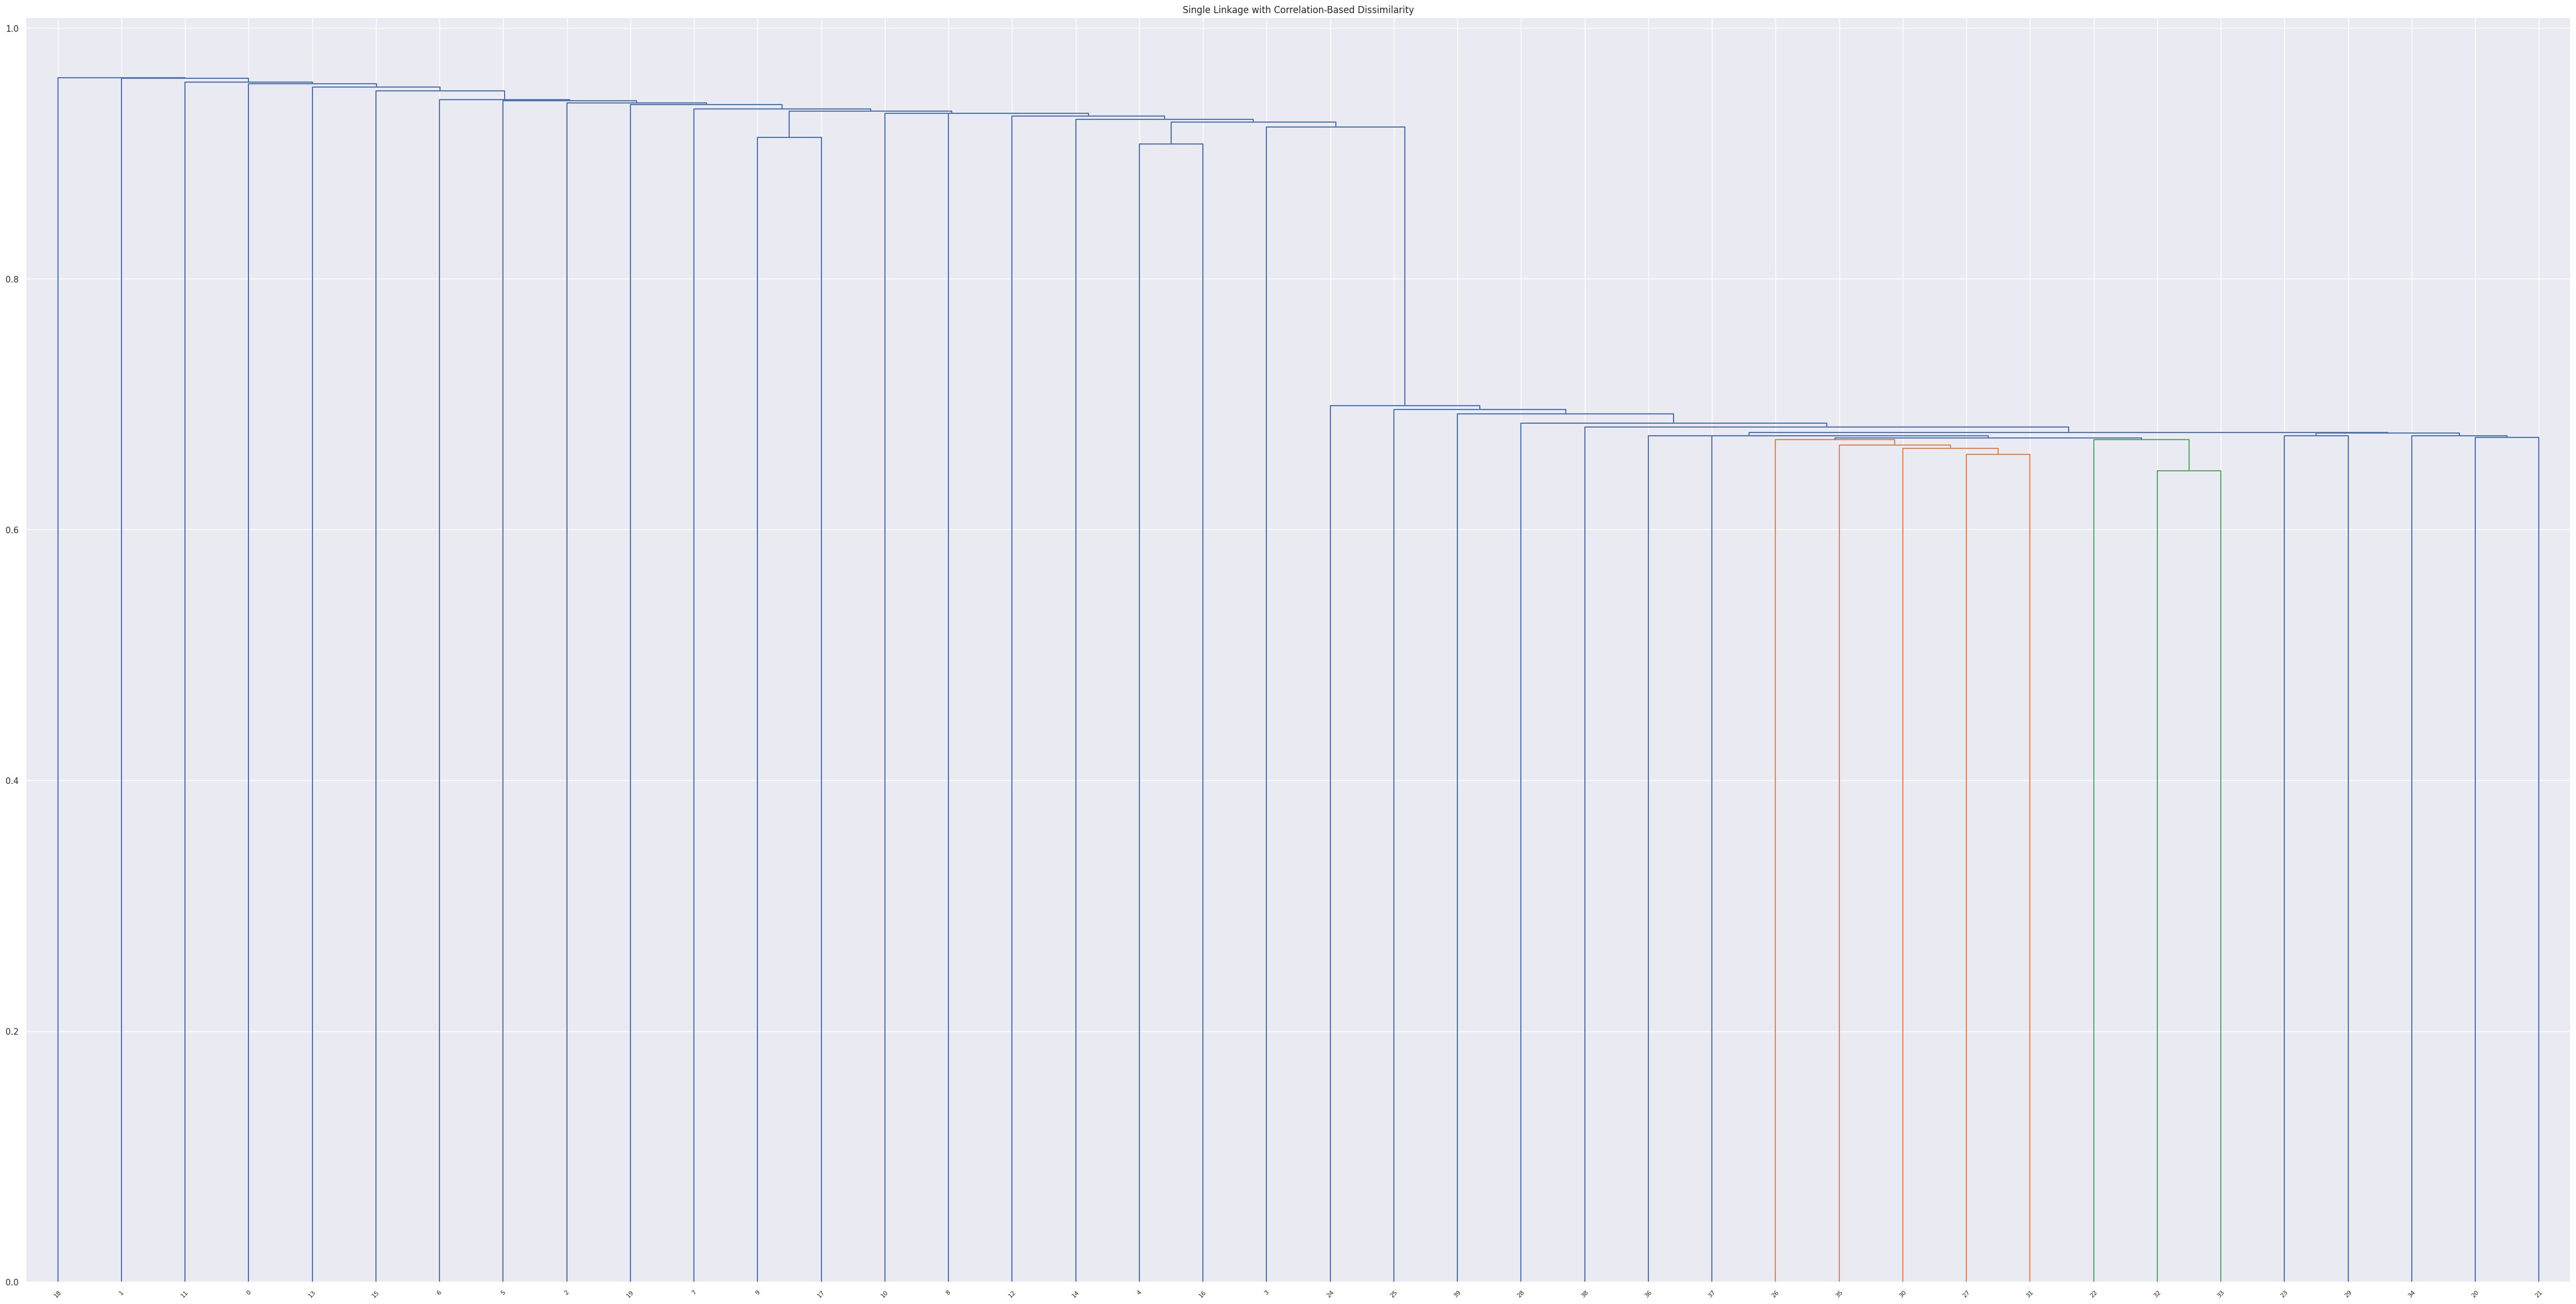

In [552]:
hc_cor2 = AgglomerativeClustering(
    linkage="single", compute_distances=True, n_clusters=2, metric="precomputed"
)
hc_cor2.fit(matriz_distancias)
linkage_cor = compute_linkage(hc_cor2)
fig, ax = plt.subplots(1, 1, figsize=(60, 30))
dendrogram(linkage_cor, ax=ax)
ax.set_title("Single Linkage with Correlation-Based Dissimilarity")

Text(0.5, 1.0, 'Average Linkage with Correlation-Based Dissimilarity')

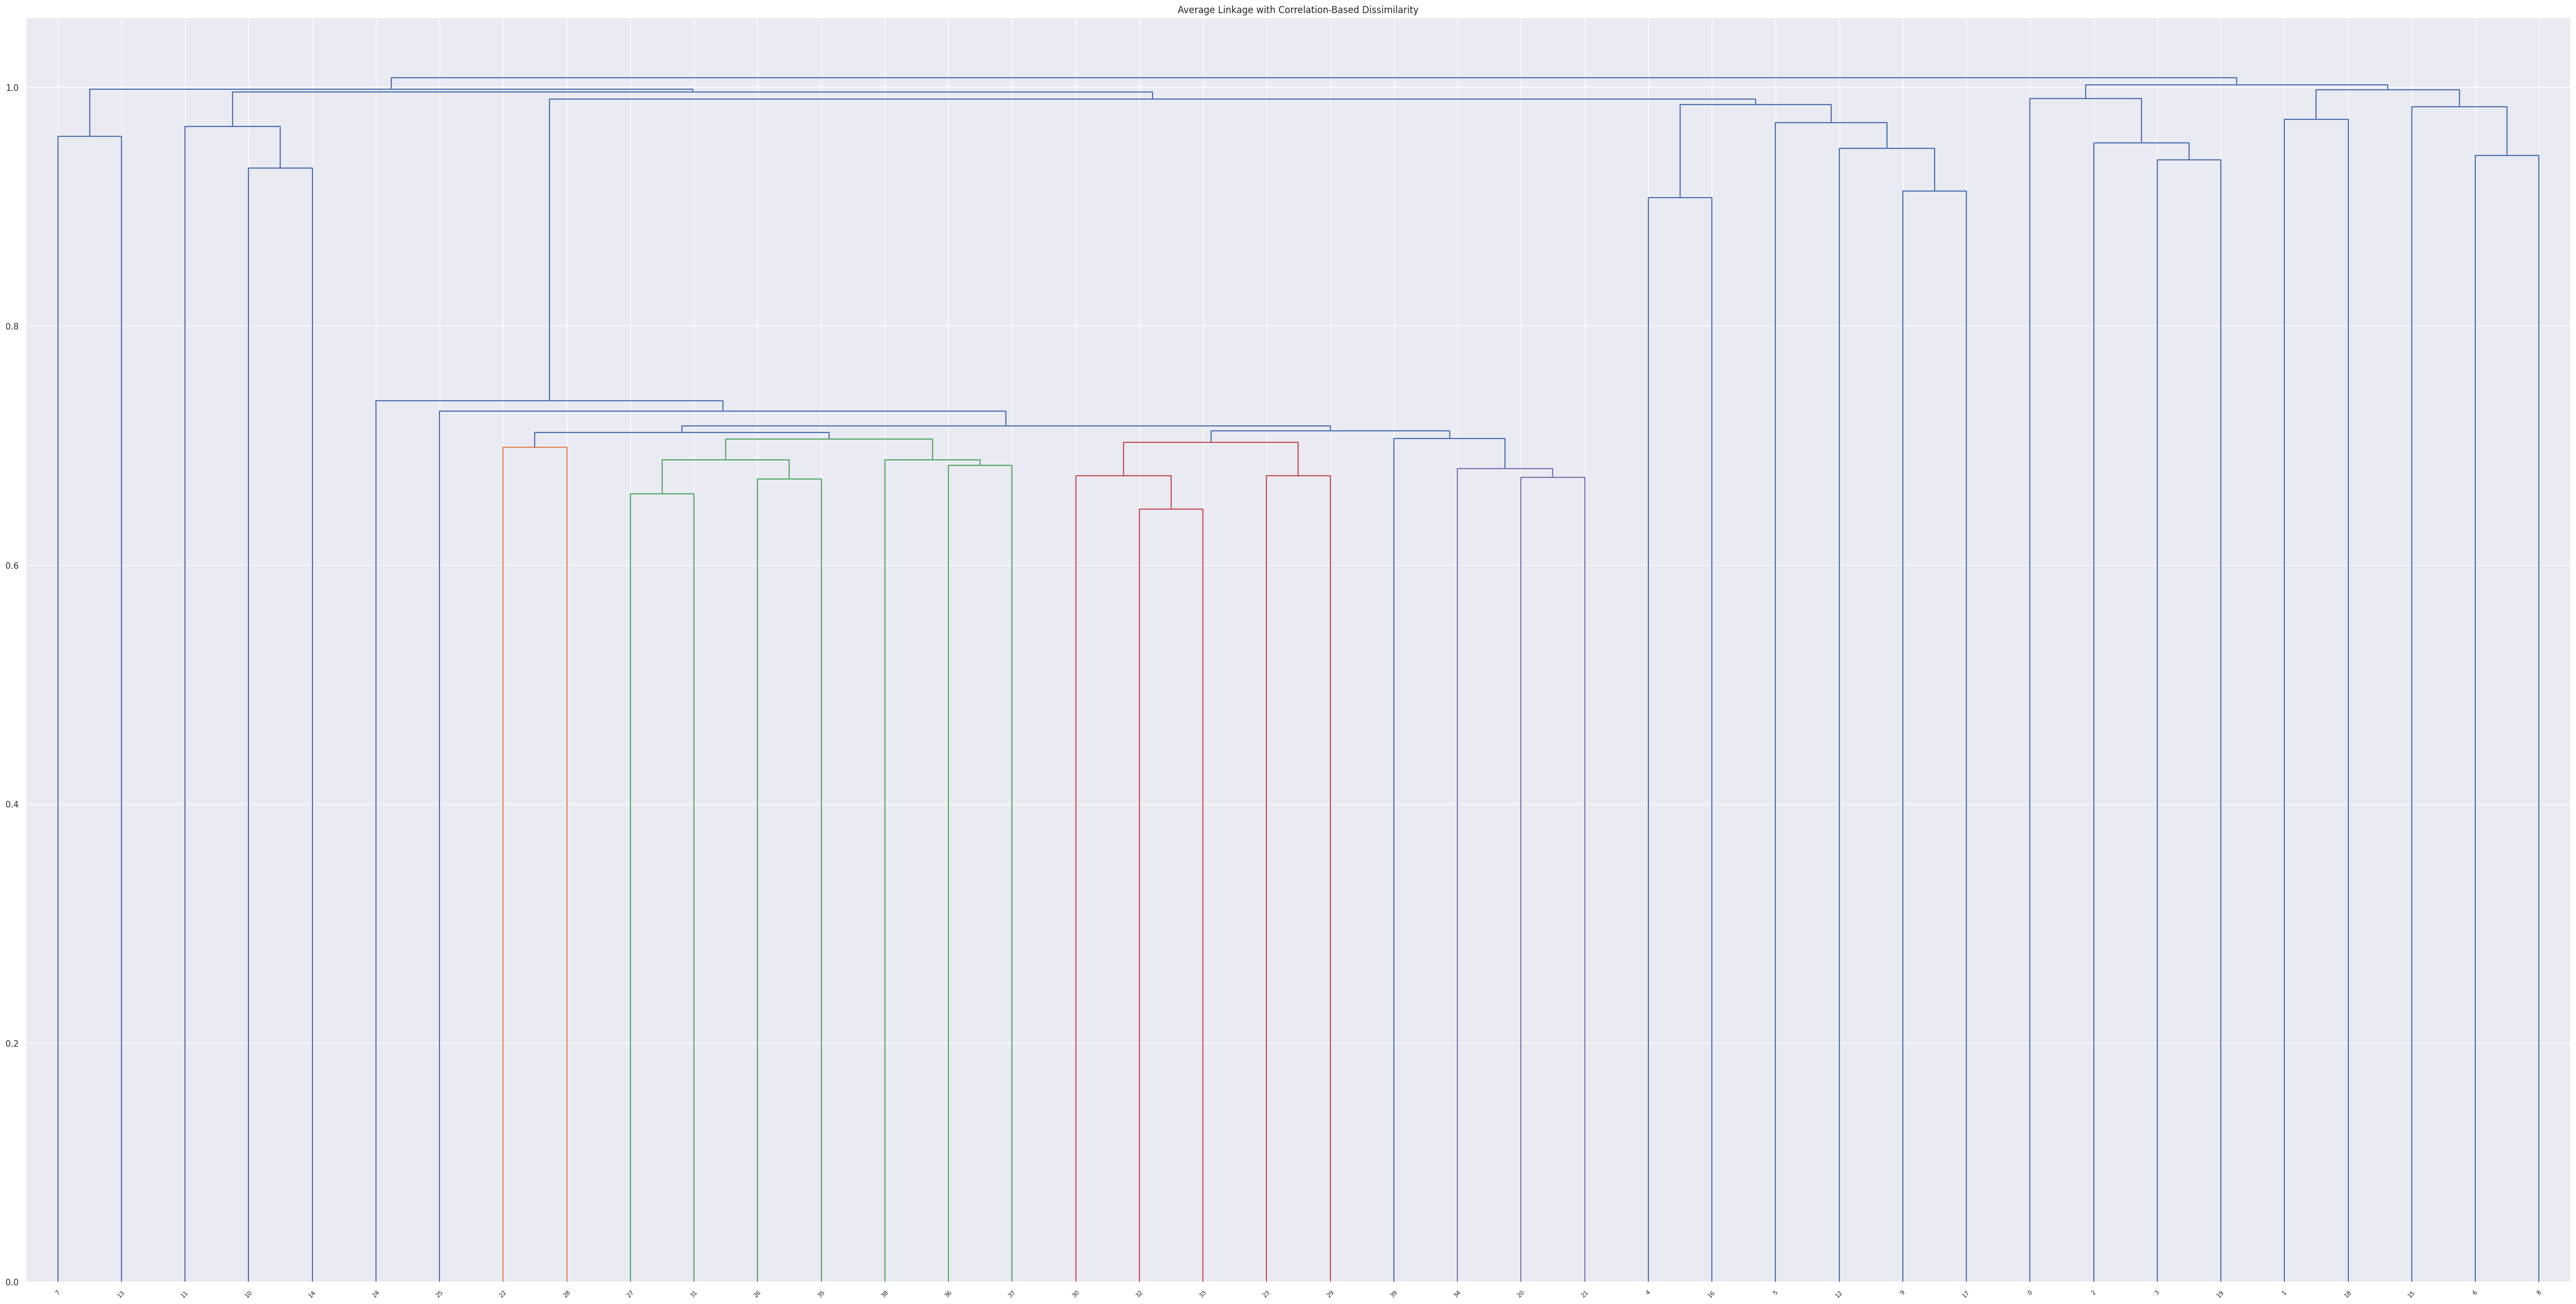

In [553]:
hc_cor3 = AgglomerativeClustering(
    linkage="average", compute_distances=True, n_clusters=2, metric="precomputed"
)
hc_cor3.fit(matriz_distancias)
linkage_cor = compute_linkage(hc_cor3)
fig, ax = plt.subplots(1, 1, figsize=(60, 30))
dendrogram(linkage_cor, ax=ax)
ax.set_title("Average Linkage with Correlation-Based Dissimilarity")

Haciendo uso de los métodos de "complete" y "average" tienden a generar conglomerados más equilibrados que los métodos de "single linkage". En los métodos "complete" y "average" se observa la formación de dos grupos.


(c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.


Se plantea para observar que diferencia de expresión genes existe entre los dos grupos un test hipotesis para diferencia entre medias por cada gen. Bajo las siguientes hipótesis:

- Hipotesis nula = las medias del cluster0 es igual al cluster1

- Hipotesis alternativa =las medias del cluster0 es diferente del cluster1


Test de hipotesis para el método "complete"


In [554]:
hc_cor1.labels_

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [555]:
df["cluster"] = hc_cor1.labels_

In [556]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,cluster
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977,0
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482,1
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576,0
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473,0
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700,1


In [557]:
df_cluster0 = df[df["cluster"] == 0]
df_cluster0.drop(["cluster"], axis=1, inplace=True)
df_cluster1 = df[df["cluster"] == 1]
df_cluster1.drop(["cluster"], axis=1, inplace=True)

/tmp/ipykernel_306481/1500681459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.drop(["cluster"], axis=1, inplace=True)
/tmp/ipykernel_306481/1500681459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.drop(["cluster"], axis=1, inplace=True)


In [558]:
df_cluster0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
5,0.316294,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
7,-0.063966,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
10,-0.722730,-0.115765,-0.187579,-0.243219,1.650957,-0.272064,-0.488366,-0.304619,0.195527,1.576088,...,-0.189856,-0.016484,0.175246,0.097714,-0.307409,0.137414,0.032998,1.560240,0.820755,-1.037164
11,-0.281955,0.825978,-1.500163,-0.433034,-1.744909,2.176562,-0.741054,0.985715,1.378114,0.916068,...,0.210086,0.529153,0.204599,-0.042698,-1.445376,-0.545526,-1.902298,1.698944,-0.748894,-1.530438
13,0.701980,-0.569549,0.855989,-0.057897,-0.679826,-1.025781,-0.749054,2.017286,0.804883,0.140770,...,0.425689,0.684255,-0.730480,-0.810308,0.286564,-0.115167,-1.046251,-0.807240,-0.509583,0.300096
14,1.007616,-0.131537,1.249855,-1.397762,-2.131584,0.298158,0.854232,-0.605265,0.740193,-1.672722,...,0.230818,0.640030,-1.503089,0.314016,-0.000341,-0.188576,0.665139,-1.146654,1.071049,-0.643579
19,-0.220045,-0.525504,0.551440,2.019194,-0.097723,0.670965,-0.142455,0.072211,-0.411758,-0.502616,...,-0.197562,-0.586523,-0.140592,-0.413133,1.882245,-0.488302,1.380388,-1.797123,-0.413003,-0.442702


In [559]:
df_cluster1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
6,-0.024967,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
8,0.031497,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
9,-0.350311,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514
12,1.337515,0.346450,-1.228737,-0.038791,-0.378885,1.436407,0.253504,-0.773110,-0.370561,0.264296,...,1.726559,1.320573,1.407051,0.956756,-0.462178,1.237348,-0.437141,-2.109933,1.560224,1.692381
15,-0.465383,0.690229,-0.898081,-0.156187,-0.230172,-0.555966,0.354744,0.520390,0.070931,1.568677,...,0.146904,0.252300,-1.305663,0.345203,-0.271390,-0.335445,-0.443117,-2.119410,-0.969547,0.056759
16,0.638595,-0.909038,0.870206,-2.735982,0.466124,0.204653,2.651606,0.266984,0.122554,-0.390499,...,0.682763,-0.558269,-1.278102,1.403212,0.986357,-1.039042,0.179952,-1.382769,-1.436005,-1.265215
17,0.286781,1.302642,-0.225253,0.775617,-1.800449,-1.191648,-0.303511,0.318984,0.012029,0.226263,...,0.615246,-0.099880,1.145779,0.178372,0.493799,2.098071,-0.504088,0.975307,0.424573,0.278177
18,-0.227078,-1.672695,0.450289,0.614156,0.626290,0.235092,-1.686913,-0.347158,-0.625985,1.324377,...,-0.715490,0.225333,0.771537,0.439871,-0.143558,1.189881,-0.297914,-0.815841,-0.688211,-0.499156


In [560]:
# Realiza la prueba t de Student para cada columna
p_values = []

for columna in df_cluster1.columns:
    stat, p_value = ttest_ind(df_cluster1[columna], df_cluster0[columna])
    p_values.append(p_value)

# Ahora, p_values contiene los p-values resultantes de las pruebas t
# Puedes ajustar el nivel de significancia según tus necesidades
nivel_de_significancia = 0.05
columnas_significativas = [
    columna
    for columna, p_value in zip(df_cluster1.columns, p_values)
    if p_value < nivel_de_significancia
]

# Muestra las columnas significativas
print("Columnas significativas:")
print(f"Numero de columnas diferentes: {len(columnas_significativas)}")
print(columnas_significativas)

Columnas significativas:
Numero de columnas diferentes: 139
[10, 11, 12, 14, 15, 16, 17, 18, 32, 34, 44, 51, 69, 87, 103, 123, 136, 154, 171, 191, 259, 265, 280, 305, 312, 315, 330, 377, 400, 409, 447, 452, 459, 461, 489, 498, 500, 501, 502, 503, 504, 505, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 519, 520, 521, 522, 523, 525, 526, 527, 528, 531, 532, 534, 535, 536, 537, 539, 540, 541, 542, 543, 544, 545, 547, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 567, 568, 569, 570, 571, 572, 574, 575, 577, 578, 579, 581, 582, 583, 584, 585, 586, 587, 588, 589, 591, 592, 593, 594, 595, 596, 597, 598, 599, 614, 635, 646, 660, 688, 709, 733, 737, 778, 779, 805, 813, 851, 923, 944, 961, 966, 974]


Test de hipotesis para el método "single"


In [561]:
hc_cor2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [562]:
df["cluster"] = hc_cor2.labels_

In [563]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,cluster
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977,0
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482,0
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576,0
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473,0
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700,0


In [564]:
df_cluster0 = df[df["cluster"] == 0]
df_cluster0.drop(["cluster"], axis=1, inplace=True)
df_cluster1 = df[df["cluster"] == 1]
df_cluster1.drop(["cluster"], axis=1, inplace=True)

/tmp/ipykernel_306481/1500681459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.drop(["cluster"], axis=1, inplace=True)
/tmp/ipykernel_306481/1500681459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.drop(["cluster"], axis=1, inplace=True)


In [565]:
df_cluster0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
5,0.316294,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
6,-0.024967,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
7,-0.063966,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
8,0.031497,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
9,-0.350311,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514


In [566]:
df_cluster1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
18,-0.227078,-1.672695,0.450289,0.614156,0.62629,0.235092,-1.686913,-0.347158,-0.625985,1.324377,...,-0.71549,0.225333,0.771537,0.439871,-0.143558,1.189881,-0.297914,-0.815841,-0.688211,-0.499156


In [567]:
# Realiza la prueba t de Student para cada columna
p_values = []

for columna in df_cluster1.columns:
    stat, p_value = ttest_ind(df_cluster1[columna], df_cluster0[columna])
    p_values.append(p_value)

# Ahora, p_values contiene los p-values resultantes de las pruebas t
# Puedes ajustar el nivel de significancia según tus necesidades
nivel_de_significancia = 0.05
columnas_significativas = [
    columna
    for columna, p_value in zip(df_cluster1.columns, p_values)
    if p_value < nivel_de_significancia
]

# Muestra las columnas significativas
print("Columnas significativas:")
print(f"Numero de columnas diferentes: {len(columnas_significativas)}")
print(columnas_significativas)

Columnas significativas:
Numero de columnas diferentes: 59
[13, 64, 70, 94, 98, 112, 119, 162, 172, 213, 229, 261, 290, 297, 332, 347, 352, 362, 405, 411, 413, 465, 480, 523, 538, 541, 545, 548, 634, 639, 641, 642, 648, 663, 671, 688, 710, 767, 771, 780, 785, 805, 807, 828, 837, 854, 859, 860, 867, 878, 882, 884, 888, 910, 915, 920, 956, 984, 988]


Test de hipotesis para el método "average"


In [568]:
hc_cor3.labels_

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [569]:
df["cluster"] = hc_cor3.labels_

In [570]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,cluster
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977,0
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482,0
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576,0
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473,0
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700,1


In [571]:
df_cluster0 = df[df["cluster"] == 0]
df_cluster0.drop(["cluster"], axis=1, inplace=True)
df_cluster1 = df[df["cluster"] == 1]
df_cluster1.drop(["cluster"], axis=1, inplace=True)

/tmp/ipykernel_306481/1500681459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.drop(["cluster"], axis=1, inplace=True)
/tmp/ipykernel_306481/1500681459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.drop(["cluster"], axis=1, inplace=True)


In [572]:
df_cluster0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
6,-0.024967,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
8,0.031497,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
15,-0.465383,0.690229,-0.898081,-0.156187,-0.230172,-0.555966,0.354744,0.520390,0.070931,1.568677,...,0.146904,0.252300,-1.305663,0.345203,-0.271390,-0.335445,-0.443117,-2.119410,-0.969547,0.056759
18,-0.227078,-1.672695,0.450289,0.614156,0.626290,0.235092,-1.686913,-0.347158,-0.625985,1.324377,...,-0.715490,0.225333,0.771537,0.439871,-0.143558,1.189881,-0.297914,-0.815841,-0.688211,-0.499156
19,-0.220045,-0.525504,0.551440,2.019194,-0.097723,0.670965,-0.142455,0.072211,-0.411758,-0.502616,...,-0.197562,-0.586523,-0.140592,-0.413133,1.882245,-0.488302,1.380388,-1.797123,-0.413003,-0.442702


In [573]:
df_cluster1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
5,0.316294,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
7,-0.063966,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
9,-0.350311,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514
10,-0.722730,-0.115765,-0.187579,-0.243219,1.650957,-0.272064,-0.488366,-0.304619,0.195527,1.576088,...,-0.189856,-0.016484,0.175246,0.097714,-0.307409,0.137414,0.032998,1.560240,0.820755,-1.037164
11,-0.281955,0.825978,-1.500163,-0.433034,-1.744909,2.176562,-0.741054,0.985715,1.378114,0.916068,...,0.210086,0.529153,0.204599,-0.042698,-1.445376,-0.545526,-1.902298,1.698944,-0.748894,-1.530438
12,1.337515,0.346450,-1.228737,-0.038791,-0.378885,1.436407,0.253504,-0.773110,-0.370561,0.264296,...,1.726559,1.320573,1.407051,0.956756,-0.462178,1.237348,-0.437141,-2.109933,1.560224,1.692381
13,0.701980,-0.569549,0.855989,-0.057897,-0.679826,-1.025781,-0.749054,2.017286,0.804883,0.140770,...,0.425689,0.684255,-0.730480,-0.810308,0.286564,-0.115167,-1.046251,-0.807240,-0.509583,0.300096
14,1.007616,-0.131537,1.249855,-1.397762,-2.131584,0.298158,0.854232,-0.605265,0.740193,-1.672722,...,0.230818,0.640030,-1.503089,0.314016,-0.000341,-0.188576,0.665139,-1.146654,1.071049,-0.643579
16,0.638595,-0.909038,0.870206,-2.735982,0.466124,0.204653,2.651606,0.266984,0.122554,-0.390499,...,0.682763,-0.558269,-1.278102,1.403212,0.986357,-1.039042,0.179952,-1.382769,-1.436005,-1.265215


In [574]:
# Realiza la prueba t de Student para cada columna
p_values = []

for columna in df_cluster1.columns:
    stat, p_value = ttest_ind(df_cluster1[columna], df_cluster0[columna])
    p_values.append(p_value)

# Ahora, p_values contiene los p-values resultantes de las pruebas t
# Puedes ajustar el nivel de significancia según tus necesidades
nivel_de_significancia = 0.05
columnas_significativas = [
    columna
    for columna, p_value in zip(df_cluster1.columns, p_values)
    if p_value < nivel_de_significancia
]

# Muestra las columnas significativas
print("Columnas significativas:")
print(f"Numero de columnas diferentes: {len(columnas_significativas)}")
print(columnas_significativas)

Columnas significativas:
Numero de columnas diferentes: 154
[5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 36, 75, 78, 84, 97, 123, 142, 163, 213, 218, 223, 287, 298, 302, 330, 331, 350, 359, 362, 363, 381, 382, 418, 447, 451, 456, 458, 461, 490, 492, 500, 501, 502, 503, 504, 505, 506, 507, 508, 510, 511, 513, 514, 515, 516, 518, 519, 520, 521, 522, 524, 525, 527, 528, 529, 531, 532, 534, 535, 537, 538, 539, 540, 543, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 562, 564, 565, 566, 567, 568, 569, 570, 571, 573, 576, 577, 581, 583, 584, 585, 587, 588, 589, 591, 593, 594, 596, 598, 599, 612, 616, 620, 633, 642, 648, 650, 663, 674, 677, 679, 685, 695, 708, 724, 735, 797, 804, 828, 835, 841, 846, 854, 859, 864, 893, 894, 899, 900, 930, 934, 938, 953, 956, 984, 985, 988, 999]


Al comparar los tres métodos de "linking" tenemos que se expresan diferencialmente el siguiente número de genes:
Complete = 139
Single = 59
Average = 154


# Problema 2


Considere el conjunto de datos de fraudes realizados con tarjeta de creito en el siguiente link.
Utilizando los metodos vistos en clase, encuentre el mejor modelo de clasificacion para el caso
en estudio, si una transaccion es fraudulenta o no. Considere:


In [575]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import (
    train_test_split,
    cross_val_predict,
    KFold,
    GridSearchCV,
)
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
from scipy.stats import zscore
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.naive_bayes import GaussianNB

In [576]:
df = pd.read_csv("card_transdata.csv")

## Eliminación de información redundante


Revsión de existencia de campos null en el archivo y tipo de datos


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Identificar datos duplicados


In [578]:
filas_duplicadas = df.duplicated()
print("Filas Duplicadas:")
print(len(df[filas_duplicadas]))

Filas Duplicadas:
0


In [579]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [580]:
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

Busqueda de datos atipicos


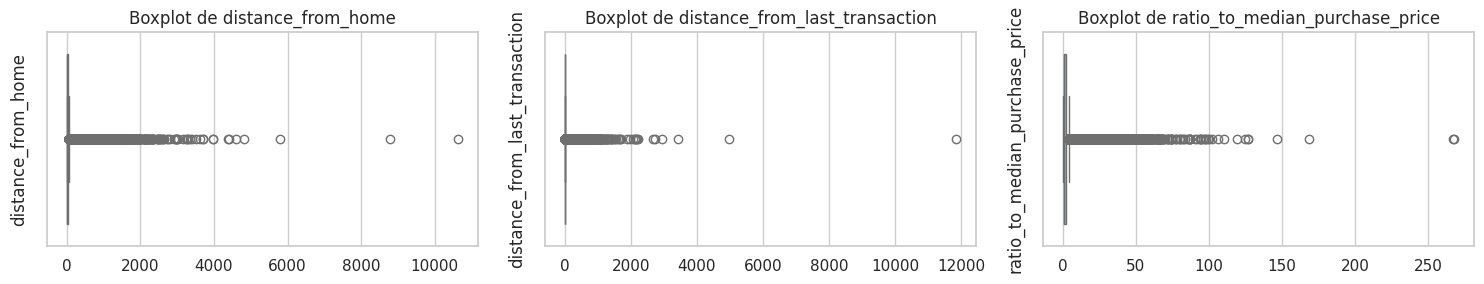

1000000


In [581]:
columnas_numericas = df.iloc[:, :3]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i, columna in enumerate(columnas_numericas.columns):
    sns.boxplot(x=columnas_numericas[columna], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {columna}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()
print(len(df))

Eliminación de datos atipicos definiendo un umbral z=3 lo que representa bajo el supuesto de distirbución normal estándar el 99.7% de los datos


In [582]:
umbral_zscore = 3
z_scores = zscore(df.select_dtypes(include=["float64", "int64"]))
filas_outliers = (abs(z_scores) > umbral_zscore).any(axis=1)

# Eliminar filas con outliers
dataframe_sin_outliers = df[~filas_outliers]

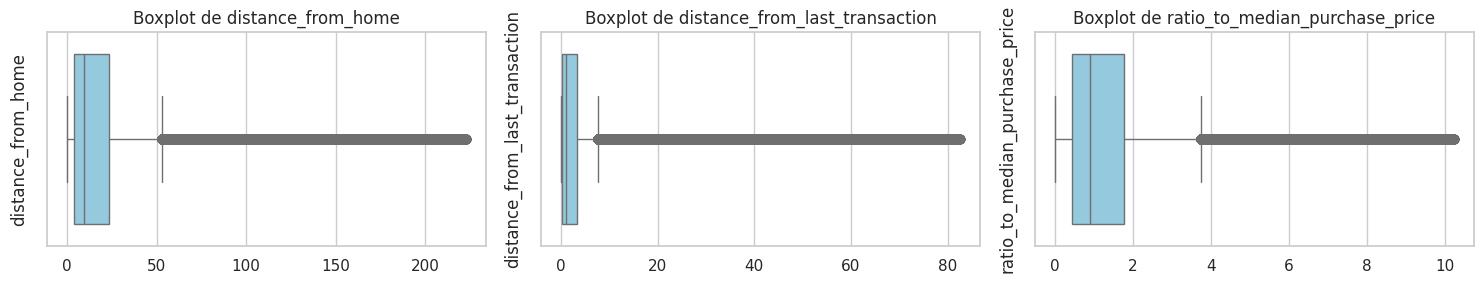

895305
queda el 0.895305 de los datos


In [583]:
columnas_numericas = dataframe_sin_outliers.iloc[:, :3]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i, columna in enumerate(columnas_numericas.columns):
    sns.boxplot(x=columnas_numericas[columna], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {columna}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()
print(len(dataframe_sin_outliers))
pIQR = len(dataframe_sin_outliers) / len(df)
print(f"queda el {pIQR} de los datos")

In [584]:
dataframe_sin_outliers.fraud.value_counts()

0.0    895305
Name: fraud, dtype: int64

Eliminación de datos atipicos por IQR que es más robusto frente a distribuciones no normales


In [585]:
columnas_numericas = df.iloc[:, :3]

# Calcular el rango intercuartílico (IQR) para cada columna
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral para identificar outliers basados en IQR
umbral_IQR = 1.5

# Identificar filas con outliers
mascara_outliers = (
    (columnas_numericas < (Q1 - umbral_IQR * IQR))
    | (columnas_numericas > (Q3 + umbral_IQR * IQR))
).any(axis=1)

# Eliminar filas con outliers
dataframe_sin_outliers_IQR = df[~mascara_outliers]

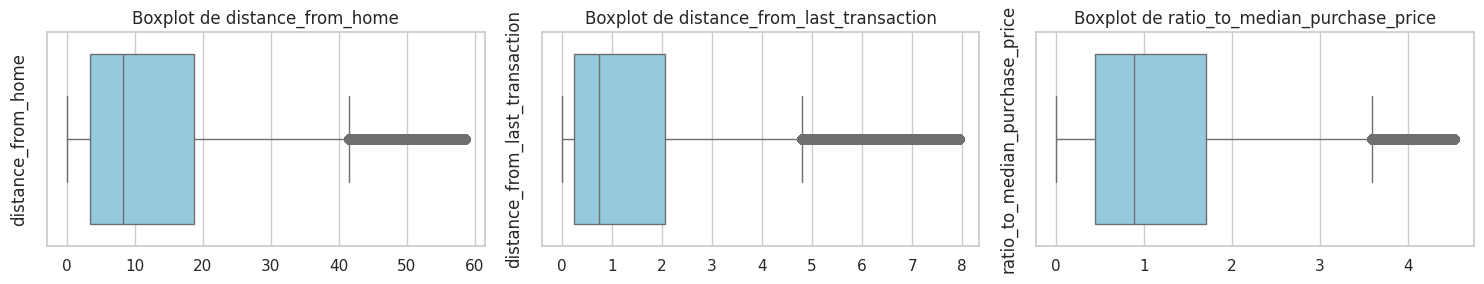

718750
queda el 0.71875 de los datos


In [586]:
columnas_numericas_IQR = dataframe_sin_outliers_IQR.iloc[:, :3]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i, columna in enumerate(columnas_numericas_IQR.columns):
    sns.boxplot(x=columnas_numericas_IQR[columna], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {columna}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()
print(len(dataframe_sin_outliers_IQR))
pIQR = len(dataframe_sin_outliers_IQR) / len(df)
print(f"queda el {pIQR} de los datos")

In [587]:
dataframe_sin_outliers_IQR.fraud.value_counts()

0.0    709710
1.0      9040
Name: fraud, dtype: int64

Al quitar los outliers se agudiza el desbalanceo de clases por lo que se decide trabajar la data original


## Selección de variables


Estandarizamos la data sin atipicos


In [588]:
# Selecciona las primeras tres columnas que deseas estandarizar
columnas_a_estandarizar = [
    "distance_from_home",
    "distance_from_last_transaction",
    "ratio_to_median_purchase_price",
]

# Crea el objeto StandardScaler
scaler = StandardScaler()

# Aplica el escalado a las primeras tres columnas y almacena los resultados en un nuevo DataFrame
df1 = pd.DataFrame(
    scaler.fit_transform(df[columnas_a_estandarizar]), columns=columnas_a_estandarizar
)

# Selecciona las columnas restantes del DataFrame original
columnas_restantes = [
    "repeat_retailer",
    "used_chip",
    "used_pin_number",
    "online_order",
    "fraud",
]
df2 = df[columnas_restantes]

# Asegúrate de que los índices estén alineados
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# Combina los dos DataFrames
df_estandarizado = pd.concat([df1, df2], axis=1)

Validamos datos luego de la estandarización


In [589]:
df_estandarizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [590]:
# Ajustar un modelo de regresión lineal entre dos de los índices

X = df_estandarizado[
    [
        "distance_from_home",
        "distance_from_last_transaction",
        "ratio_to_median_purchase_price",
        "repeat_retailer",
        "used_chip",
        "used_pin_number",
        "online_order",
    ]
]
X = sm.add_constant(X)
y = df_estandarizado["fraud"]

# Divide el conjunto de datos estandarizado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Metrica de desempeño


In [591]:
def evaluate_model_performance(model, X_test, y_test, threshold=0.5):
    # Realiza predicciones en el conjunto de prueba
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    return cm, f1, acc, recall

Corremos el modelo base: Regresión logistica


In [592]:
model_base = sm.Logit(y_train, X_train)
results_base = model_base.fit()
# Imprime el resumen del modelo
print(results_base.summary())

# Llamada a la función con el modelo entrenado y el conjunto de prueba
# conf_matrix, f1score = evaluate_model_performance(results_base, X_test, y_test)
conf_matrix_base, f1score_base, accuracy_base, recall_base = evaluate_model_performance(
    results_base, X_test, y_test
)

# Imprime la matriz de confusión, el F1-score y la precisión
print("Matriz de Confusión:")
print(conf_matrix_base)
print("\nF1-score:", f1score_base)
print("\nAccuracy:", accuracy_base)
print("\nRecall:", recall_base)

Optimization terminated successfully.
         Current function value: 0.136206
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               800000
Model:                          Logit   Df Residuals:                   799992
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.5406
Time:                        21:21:55   Log-Likelihood:            -1.0896e+05
converged:                       True   LL-Null:                   -2.3719e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -8.2080      0.044   -185.975    

Aplicamos Lasso para identificar los betas insignificantes y corremos nuevamente el modelo


In [593]:
parameters = {"alpha": np.arange(0.001, 5, 0.5)}

lasso = Lasso()  # Use the Lasso model

clf = GridSearchCV(
    lasso, parameters
)  # Initialize GridSearchCV with the Lasso model and alpha values
clf.fit(X_train, y_train)  # Fit the model

best_alpha = clf.best_params_

alpha_value = best_alpha["alpha"]

print("Best alpha:", clf.best_params_)

Best alpha: {'alpha': 0.001}


In [594]:
df_estandarizado.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


La aplicación de Lasso no es significativa puesto, queda demostrado que todas las varibales son estadisticamente significativas y adicional no hay multicolinealidad con las variables.


In [595]:
# Aplica Lasso
alpha = alpha_value  # Puedes ajustar este valor según sea necesario
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# Imprime los coeficientes seleccionados por Lasso
selected_features = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})
print(selected_features)

# Define un umbral para considerar los coeficientes como cero
threshold = 0.001  # Puedes ajustar este valor según sea necesario

# Selecciona solo las variables con coeficientes mayores que el umbral
selected_columns = selected_features[abs(selected_features["Coefficient"]) > threshold][
    "Feature"
]

# Convierte el índice 'selected_columns' a una lista de nombres de columnas
selected_columns_list = selected_columns.tolist()

# Filtra el DataFrame original para incluir solo las variables seleccionadas
df_selected = X_train[selected_columns_list]

# Ajusta el modelo de regresión logística con las variables seleccionadas
X_selected_lasso = df_selected
X_selected_lasso = sm.add_constant(X_selected_lasso)

model_lasso = sm.Logit(y_train, X_selected_lasso)
results_lasso = model_lasso.fit()

X_test_lasso = X_test[selected_columns_list]
X_test_lasso = sm.add_constant(X_test_lasso)

# Imprime el resumen del modelo
print(results_lasso.summary())

(
    conf_matrix_lasso,
    f1score_lasso,
    accuracy_lasso,
    recall_lasso,
) = evaluate_model_performance(results_lasso, X_test_lasso, y_test)
print("Matriz de Confusión:")
print(conf_matrix_lasso)
print("\nF1-score:", f1score_lasso)
print("\nAccuracy:", accuracy_lasso)
print("\nRecall:", recall_lasso)

                          Feature  Coefficient
0                           const     0.000000
1              distance_from_home     0.052542
2  distance_from_last_transaction     0.023574
3  ratio_to_median_purchase_price     0.127861
4                 repeat_retailer    -0.015338
5                       used_chip    -0.032092
6                 used_pin_number    -0.083728
7                    online_order     0.109338
Optimization terminated successfully.
         Current function value: 0.136206
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               800000
Model:                          Logit   Df Residuals:                   799992
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.5406
Time:                        21:22:09   Log-Likelihood:            -1.0896e+05


In [596]:
# Forward Selection
def forward_selection(X_train, X_test, y_train, y_test, features):
    sfs = SequentialFeatureSelector(
        LogisticRegression(), direction="forward", scoring="f1", cv=None
    )
    sfs.fit(X_train, y_train)
    selected_features = list(X_train.columns[sfs.get_support()])
    return selected_features


# Backward Selection
def backward_selection(X_train, X_test, y_train, y_test, features):
    sbs = SequentialFeatureSelector(
        LogisticRegression(), direction="backward", scoring="f1", cv=None
    )
    sbs.fit(X_train, y_train)
    selected_features = list(X_train.columns[sbs.get_support()])
    return selected_features


# Aplica forward selection y backward selection a tus datos
all_features = list(df.columns[:-1])  # Todas las características excepto 'fraud'

forward selection


In [597]:
# Aplica forward selection
selected_features_forward = forward_selection(
    X_train, X_test, y_train, y_test, all_features
)
print("Forward Selection Result:", selected_features_forward)

Forward Selection Result: ['distance_from_home', 'ratio_to_median_purchase_price', 'used_pin_number', 'online_order']


In [598]:
# Filtra el DataFrame original para incluir solo las variables seleccionadas
df_selected_forward = X_train[selected_features_forward]

# Ajusta el modelo de regresión logística con las variables seleccionadas
X_selected_forward = df_selected_forward

model_forward = sm.Logit(y_train, X_selected_forward)
results_forward = model_forward.fit()

X_test_forward = X_test[selected_features_forward]

# Imprime el resumen del modelo
print(results_forward.summary())

(
    conf_matrix_RL_forward,
    f1score_RL_forward,
    accuracy_RL_forward,
    recall_RL_forward,
) = evaluate_model_performance(results_forward, X_test_forward, y_test)
print("Matriz de Confusión:")
print(conf_matrix_RL_forward)
print("\nF1-score:", f1score_RL_forward)
print("\nAccuracy:", accuracy_RL_forward)
print("\nRecall:", recall_RL_forward)

Optimization terminated successfully.
         Current function value: 0.379461
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               800000
Model:                          Logit   Df Residuals:                   799996
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 -0.2799
Time:                        21:23:55   Log-Likelihood:            -3.0357e+05
converged:                       True   LL-Null:                   -2.3719e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
distance_from_home                 0.4982      0.004    122.009    

backward selection


In [599]:
# Aplica backward selection
selected_features_backward = backward_selection(
    X_train, X_test, y_train, y_test, all_features
)
print("Backward Selection Result:", selected_features_backward)

Backward Selection Result: ['distance_from_home', 'ratio_to_median_purchase_price', 'used_pin_number', 'online_order']


In [600]:
# Filtra el DataFrame original para incluir solo las variables seleccionadas
df_selected_backward = X_train[selected_features_backward]

# Ajusta el modelo de regresión logística con las variables seleccionadas
X_selected_backward = df_selected_backward

model_backward = sm.Logit(y_train, X_selected_backward)
results_backward = model_backward.fit()

X_test_backward = X_test[selected_features_backward]

# Imprime el resumen del modelo
print(results_backward.summary())

(
    conf_matrix_backward,
    f1score_backward,
    accuracy_backward,
    recall_backward,
) = evaluate_model_performance(results_backward, X_test_forward, y_test)
print("Matriz de Confusión:")
print(conf_matrix_backward)
print("\nF1-score:", f1score_backward)
print("\nAccuracy:", accuracy_backward)
print("\nRecall:", recall_backward)

Optimization terminated successfully.
         Current function value: 0.379461
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               800000
Model:                          Logit   Df Residuals:                   799996
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 -0.2799
Time:                        21:27:14   Log-Likelihood:            -3.0357e+05
converged:                       True   LL-Null:                   -2.3719e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
distance_from_home                 0.4982      0.004    122.009    

## Selección de una métrica adecuada


Se considera que para este caso es más importante identificar los errores de tipo 2 (FN) clasificar incorrectamente casos positivos como negativos, por tal motivo se decide utlizar la metrica de F1-score y recall para la seleccion del mejor modelo.


In [601]:
results = pd.DataFrame(
    {
        "Modelo": ["Base", "Lasso", "Forward", "Backward"],
        "Matriz de Confusión TP-FP-FN-TN": [
            conf_matrix_base,
            conf_matrix_lasso,
            conf_matrix_RL_forward,
            conf_matrix_backward,
        ],
        "F1-score": [f1score_base, f1score_lasso, f1score_RL_forward, f1score_backward],
        "Accuracy": [
            accuracy_base,
            accuracy_lasso,
            accuracy_RL_forward,
            accuracy_backward,
        ],
        "Recall": [recall_base, recall_lasso, recall_RL_forward, recall_backward],
    }
)

results

,Modelo,Matriz de Confusión TP-FP-FN-TN,F1-score,Accuracy,Recall
0,Base,"[[181295, 1224], [6892, 10589]]",0.722947,0.959420,0.605743
1,Lasso,"[[181295, 1224], [6892, 10589]]",0.722947,0.959420,0.605743
2,Forward,"[[163889, 18630], [10431, 7050]]",0.326684,0.854695,0.403295
3,Backward,"[[163889, 18630], [10431, 7050]]",0.326684,0.854695,0.403295


Por lo anterior se decide trabajar con todas las variables puesto queda demostrado que son estadisticamente significativas.


## Definición de métricas de un modelo baseline (clasificador aleatorio) como punto de referencia


Modelo base regresión logistica


In [602]:
X = df_estandarizado[
    [
        "distance_from_home",
        "distance_from_last_transaction",
        "ratio_to_median_purchase_price",
        "repeat_retailer",
        "used_chip",
        "used_pin_number",
        "online_order",
    ]
]
X = sm.add_constant(X)
y = df_estandarizado["fraud"]

# Divide el conjunto de datos estandarizado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


results = pd.DataFrame(
    {
        "Modelo": ["RL"],
        "Matriz de Confusión TP-FP-FN-TN": [conf_matrix_base],
        "F1-score": [f1score_base],
        "Accuracy": [accuracy_base],
        "Recall": [recall_base],
    }
)

results

,Modelo,Matriz de Confusión TP-FP-FN-TN,F1-score,Accuracy,Recall
0,RL,"[[181295, 1224], [6892, 10589]]",0.722947,0.95942,0.605743


KNN


In [603]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
conf_matrix_knn, f1score_knn, accuracy_knn, recall_knn = evaluate_model_performance(
    knn_model, X_test, y_test
)
print("Matriz de Confusión:")
print(conf_matrix_knn)
print("\nF1-score:", f1score_knn)
print("\nAccuracy:", accuracy_knn)
print("\nRecall:", recall_knn)

Matriz de Confusión:
[[182476     43]
 [   250  17231]]

F1-score: 0.99156955833693

Accuracy: 0.998535

Recall: 0.985698758652251


LDA


Matriz de Confusión:
[[180349   2170]
 [ 10810   6671]]

F1-score: 0.5068763771749867

Accuracy: 0.9351

Recall: 0.3816143241233339


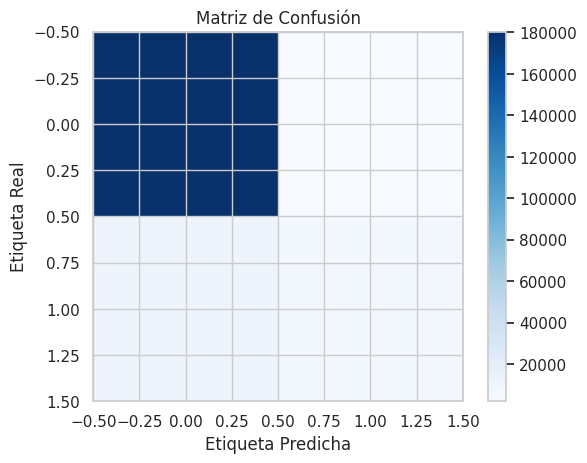

In [604]:
# Crea y entrena el modelo LDA
lda_model = LinearDiscriminantAnalysis()
result_lda = lda_model.fit(X_train, y_train)

conf_matrix_lda, f1score_lda, accuracy_lda, recall_lda = evaluate_model_performance(
    result_lda, X_test, y_test
)

print("Matriz de Confusión:")
print(conf_matrix_lda)
print("\nF1-score:", f1score_lda)
print("\nAccuracy:", accuracy_lda)
print("\nRecall:", recall_lda)

# Grafica la matriz de confusión
plt.imshow(conf_matrix_lda, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

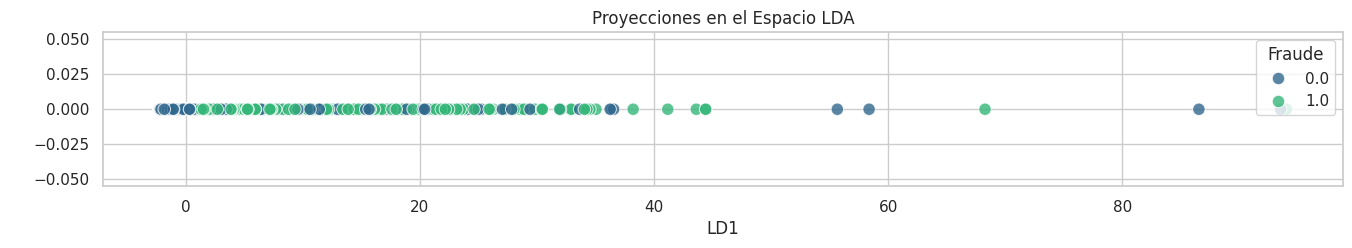

In [605]:
# Crea y entrena el modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Transforma los datos de entrenamiento al espacio LDA
X_lda_train = lda_model.transform(X_train)

# Crea un DataFrame con las proyecciones y la etiqueta de clase
df_lda_train = pd.DataFrame(X_lda_train, columns=["LD1"])
df_lda_train["fraud"] = y_train.values

# Grafica las proyecciones en el espacio LDA
plt.figure(figsize=(16, 2))
sns.scatterplot(
    x="LD1", y=0, hue="fraud", data=df_lda_train, palette="viridis", s=80, alpha=0.8
)
plt.title("Proyecciones en el Espacio LDA")
plt.xlabel("LD1")
plt.ylabel(" ")
plt.legend(title="Fraude", loc="upper right")
plt.show()

QDA


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Matriz de Confusión:
[[182519      0]
 [ 17481      0]]

F1-score: 0.0

Accuracy: 0.912595

Recall: 0.0


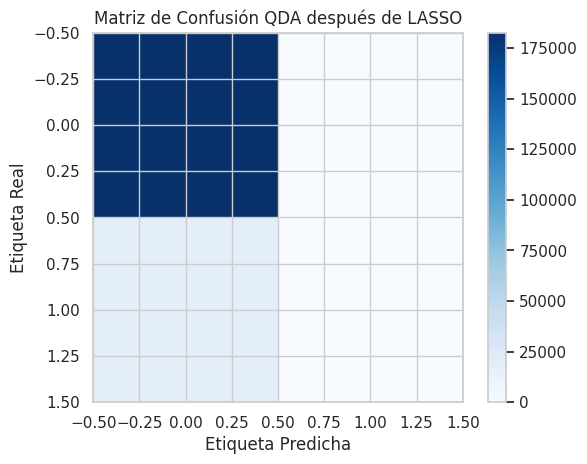

In [606]:
# Crea y entrena el modelo QDA
qda_model = QuadraticDiscriminantAnalysis()
result_qda = qda_model.fit(X_train, y_train)

conf_matrix_qda, f1score_qda, accuracy_qda, recall_qda = evaluate_model_performance(
    result_qda, X_test, y_test
)

print("Matriz de Confusión:")
print(conf_matrix_qda)
print("\nF1-score:", f1score_qda)
print("\nAccuracy:", accuracy_qda)
print("\nRecall:", recall_qda)

# Grafica la matriz de confusión
plt.imshow(conf_matrix_qda, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Matriz de Confusión QDA después de LASSO")
plt.colorbar()
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

Naive Bayes


Matriz de Confusión:
[[179804   2715]
 [  7132  10349]]

F1-score: 0.6776231789163529

Accuracy: 0.950765

Recall: 0.5920141868314169


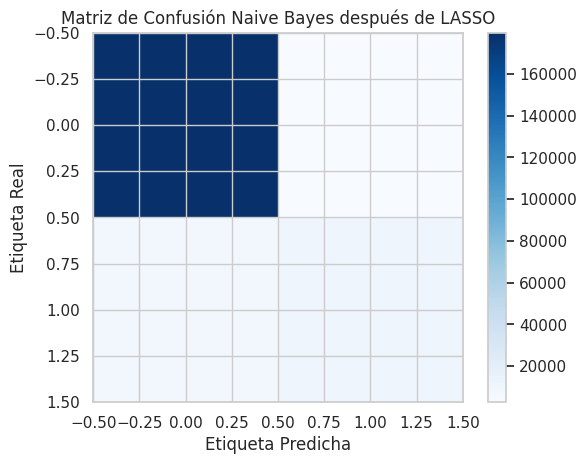

In [607]:
# Crea y entrena el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_nb = nb_model.predict(X_test)

# Calcula la matriz de confusión y otras métricas de desempeño
conf_matrix_nb, f1score_nb, accuracy_nb, recall_nb = evaluate_model_performance(
    nb_model, X_test, y_test
)

# Imprime la matriz de confusión y las métricas de desempeño
print("Matriz de Confusión:")
print(conf_matrix_nb)
print("\nF1-score:", f1score_nb)
print("\nAccuracy:", accuracy_nb)
print("\nRecall:", recall_nb)

# Grafica la matriz de confusión
plt.imshow(conf_matrix_nb, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Naive Bayes después de LASSO")
plt.colorbar()
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

## Entrenamiento, validación y prueba para los modelos


Se resume la validación de los modelos en la siguiente tabla, por el momento, el que mejor metrícas presenta es el KNN con k=4, sin embargo LDA presenta un mejor recall a cambio de cometer más errores tipo 1 (FP), es decir predecir un fraude cuando no está presente.


In [608]:
results_models = pd.DataFrame(
    {
        "Modelo": ["RL", "KNN", "LDA", "QDA", "Naive Bayes"],
        "Matriz de Confusión TP-FP-FN-TN": [
            conf_matrix_base,
            conf_matrix_knn,
            conf_matrix_lda,
            conf_matrix_qda,
            conf_matrix_nb,
        ],
        "F1-score": [f1score_base, f1score_knn, f1score_lda, f1score_qda, f1score_nb],
        "Accuracy": [
            accuracy_base,
            accuracy_knn,
            accuracy_lda,
            accuracy_qda,
            accuracy_nb,
        ],
        "Recall": [recall_base, recall_knn, recall_lda, recall_qda, recall_nb],
    }
)

results_models

,Modelo,Matriz de Confusión TP-FP-FN-TN,F1-score,Accuracy,Recall
0,RL,"[[181295, 1224], [6892, 10589]]",0.722947,0.959420,0.605743
1,KNN,"[[182476, 43], [250, 17231]]",0.991570,0.998535,0.985699
2,LDA,"[[180349, 2170], [10810, 6671]]",0.506876,0.935100,0.381614
3,QDA,"[[182519, 0], [17481, 0]]",0.000000,0.912595,0.000000
4,Naive Bayes,"[[179804, 2715], [7132, 10349]]",0.677623,0.950765,0.592014


## Ajuste de hiperparémetros para cada uno de los modelos


KNN - se ajustó con un K=3 el cual demostró el mejor desempeño.


In [609]:
results_list = []

for n_neighbors in range(1, 12):  # n_neighbors_values:
    # Crea y entrena el modelo k-NN
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    # Evalúa el modelo en el conjunto de prueba
    conf_matrix_knn, f1score_knn, accuracy_knn, recall_knn = evaluate_model_performance(
        knn_model, X_test, y_test
    )

    # Almacena los resultados en un diccionario
    results_list.append(
        {
            "n_neighbors": n_neighbors,
            "conf_matrix": conf_matrix_knn,
            "f1score": f1score_knn,
            "accuracy": accuracy_knn,
            "recall": recall_knn,
        }
    )

# Convierte la lista de resultados en un DataFrame
results_df_knn = pd.DataFrame(results_list)

# Imprime el DataFrame
results_df_knn

,n_neighbors,conf_matrix,f1score,accuracy,recall
0,1,"[[182390, 129], [131, 17350]]",0.992563,0.998700,0.992506
1,2,"[[182476, 43], [250, 17231]]",0.991570,0.998535,0.985699
2,3,"[[182408, 111], [134, 17347]]",0.992988,0.998775,0.992335
3,4,"[[182464, 55], [216, 17265]]",0.992213,0.998645,0.987644
4,5,"[[182411, 108], [143, 17338]]",0.992814,0.998745,0.991820
5,6,"[[182453, 66], [221, 17260]]",0.991755,0.998565,0.987358
6,7,"[[182410, 109], [148, 17333]]",0.992641,0.998715,0.991534
7,8,"[[182454, 65], [204, 17277]]",0.992275,0.998655,0.988330
8,9,"[[182413, 106], [150, 17331]]",0.992669,0.998720,0.991419
9,10,"[[182445, 74], [204, 17277]]",0.992019,0.998610,0.988330


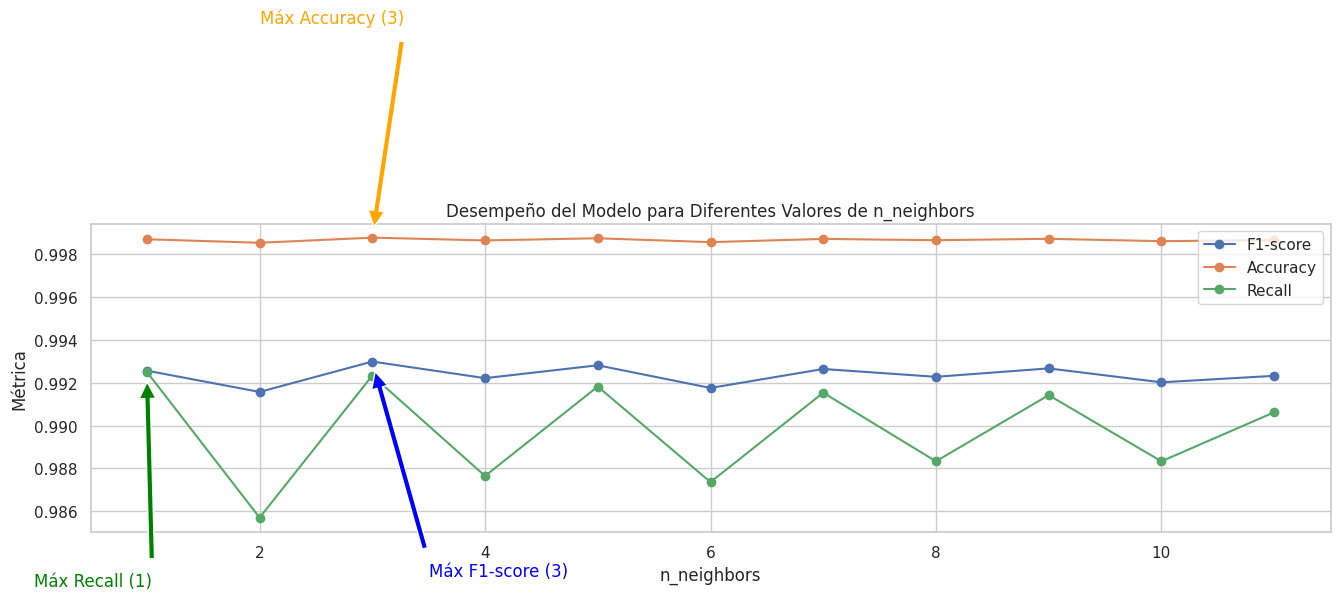

In [610]:
max_f1score_index = results_df_knn["f1score"].idxmax()
max_accuracy_index = results_df_knn["accuracy"].idxmax()
max_recall_index = results_df_knn["recall"].idxmax()

# Graficar F1-score, accuracy y recall en función de n_neighbors
plt.figure(figsize=(16, 4))

plt.plot(
    results_df_knn["n_neighbors"],
    results_df_knn["f1score"],
    label="F1-score",
    marker="o",
)
plt.plot(
    results_df_knn["n_neighbors"],
    results_df_knn["accuracy"],
    label="Accuracy",
    marker="o",
)
plt.plot(
    results_df_knn["n_neighbors"], results_df_knn["recall"], label="Recall", marker="o"
)

# Resaltar el punto máximo de cada métrica
plt.annotate(
    f'Máx F1-score ({results_df_knn["n_neighbors"][max_f1score_index]})',
    xy=(
        results_df_knn["n_neighbors"][max_f1score_index],
        results_df_knn["f1score"][max_f1score_index],
    ),
    xytext=(
        results_df_knn["n_neighbors"][max_f1score_index] + 0.5,
        results_df_knn["f1score"][max_f1score_index] - 0.01,
    ),
    arrowprops=dict(facecolor="blue", shrink=0.05),
    color="blue",
)

plt.annotate(
    f'Máx Accuracy ({results_df_knn["n_neighbors"][max_accuracy_index]})',
    xy=(
        results_df_knn["n_neighbors"][max_accuracy_index],
        results_df_knn["accuracy"][max_accuracy_index],
    ),
    xytext=(
        results_df_knn["n_neighbors"][max_accuracy_index] - 1,
        results_df_knn["accuracy"][max_accuracy_index] + 0.01,
    ),
    arrowprops=dict(facecolor="orange", shrink=0.05),
    color="orange",
)

plt.annotate(
    f'Máx Recall ({results_df_knn["n_neighbors"][max_recall_index]})',
    xy=(
        results_df_knn["n_neighbors"][max_recall_index],
        results_df_knn["recall"][max_recall_index],
    ),
    xytext=(
        results_df_knn["n_neighbors"][max_recall_index] - 1,
        results_df_knn["recall"][max_recall_index] - 0.01,
    ),
    arrowprops=dict(facecolor="green", shrink=0.05),
    color="green",
)

# Coloca la leyenda en la parte superior derecha
plt.legend(loc="upper right")

plt.title("Desempeño del Modelo para Diferentes Valores de n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Métrica")
plt.grid(True)
plt.show()

In [611]:
knn_model = KNeighborsClassifier(
    n_neighbors=3,
    weights="uniform",
    algorithm="auto",
    metric="minkowski",
    metric_params=None,
    n_jobs=None,
)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# Evalúa el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

(
    conf_matrix_knn_bestk,
    f1score_knn_bestk,
    accuracy_knn_bestk,
    recall_knn_bestk,
) = evaluate_model_performance(knn_model, X_test, y_test)
print("Matriz de Confusión:")
print(conf_matrix_knn_bestk)
print("\nF1-score:", f1score_knn_bestk)
print("\nAccuracy:", accuracy_knn_bestk)
print("\nRecall:", recall_knn_bestk)

Matriz de Confusión:
[[182408    111]
 [   134  17347]]

F1-score: 0.9929877787000201

Accuracy: 0.998775

Recall: 0.9923345346376066


In [612]:
X_train_lasso = X_train[selected_columns_list]
X_train_lasso = sm.add_constant(X_train_lasso)
X_test_lasso = X_test[selected_columns_list]
X_test_lasso = sm.add_constant(X_test_lasso)

LDA - lasso


In [613]:
# Crea y entrena el modelo LDA
lda_model = LinearDiscriminantAnalysis(solver="lsqr")
result_lda = lda_model.fit(X_train_lasso, y_train)

(
    conf_matrix_lda_lasso,
    f1score_lda_lasso,
    accuracy_lda_lasso,
    recall_lda_lasso,
) = evaluate_model_performance(result_lda, X_test_lasso, y_test)

print("Matriz de Confusión:")
print(conf_matrix_lda_lasso)
print("\nF1-score:", f1score_lda_lasso)
print("\nAccuracy:", accuracy_lda_lasso)
print("\nRecall:", recall_lda_lasso)

Matriz de Confusión:
[[180349   2170]
 [ 10810   6671]]

F1-score: 0.5068763771749867

Accuracy: 0.9351

Recall: 0.3816143241233339


QDA - lasso


/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/david/.local/share/virtualenvs/Taller2_Estadistica-O3QD5EEe/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Matriz de Confusión:
[[182519      0]
 [ 17481      0]]

F1-score: 0.0

Accuracy: 0.912595

Recall: 0.0


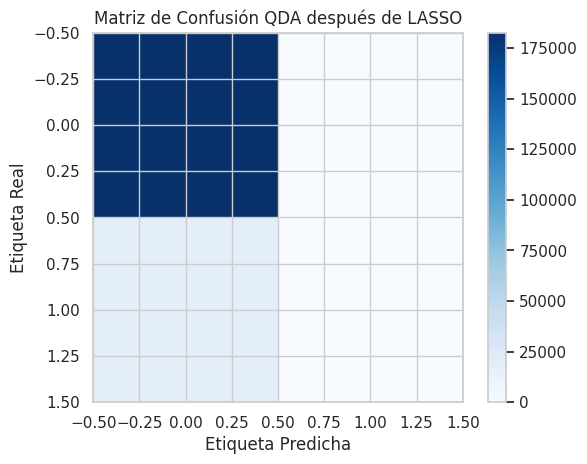

In [614]:
# Crea y entrena el modelo QDA
qda_model = QuadraticDiscriminantAnalysis()
result_qda = qda_model.fit(X_train_lasso, y_train)

(
    conf_matrix_qda_lasso,
    f1score_qda_lasso,
    accuracy_qda_lasso,
    recall_qda_lasso,
) = evaluate_model_performance(result_qda, X_test_lasso, y_test)

print("Matriz de Confusión:")
print(conf_matrix_qda)
print("\nF1-score:", f1score_qda)
print("\nAccuracy:", accuracy_qda)
print("\nRecall:", recall_qda)

# Grafica la matriz de confusión
plt.imshow(conf_matrix_qda, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Matriz de Confusión QDA después de LASSO")
plt.colorbar()
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

Naive Bayes - Lasso


In [615]:
# Crea y entrena el modelo Naive Bayes
nb_model = GaussianNB(priors=None, var_smoothing=1)
nb_model.fit(X_train_lasso, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_nb = nb_model.predict(X_test_lasso)

# Calcula la matriz de confusión y otras métricas de desempeño
(
    conf_matrix_nb_lasso,
    f1score_nb_lasso,
    accuracy_nb_lasso,
    recall_nb_lasso,
) = evaluate_model_performance(nb_model, X_test_lasso, y_test)

# Imprime la matriz de confusión y las métricas de desempeño
print("Matriz de Confusión:")
print(conf_matrix_nb_lasso)
print("\nF1-score:", f1score_nb_lasso)
print("\nAccuracy:", accuracy_nb_lasso)
print("\nRecall:", recall_nb_lasso)

Matriz de Confusión:
[[180472   2047]
 [ 14767   2714]]

F1-score: 0.24404280190630342

Accuracy: 0.91593

Recall: 0.155254276071163


In [616]:
results_models = pd.DataFrame(
    {
        "Modelo": ["RL", "KNN", "LDA", "QDA", "Naive Bayes"],
        "Matriz de Confusión TP-FP-FN-TN": [
            conf_matrix_base,
            conf_matrix_knn_bestk,
            conf_matrix_lda_lasso,
            conf_matrix_qda_lasso,
            conf_matrix_nb_lasso,
        ],
        "F1-score": [
            f1score_base,
            f1score_knn_bestk,
            f1score_lda_lasso,
            f1score_qda_lasso,
            f1score_nb_lasso,
        ],
        "Accuracy": [
            accuracy_base,
            accuracy_knn_bestk,
            accuracy_lda_lasso,
            accuracy_qda_lasso,
            accuracy_nb_lasso,
        ],
        "Recall": [
            recall_base,
            recall_knn_bestk,
            recall_lda_lasso,
            recall_qda_lasso,
            recall_nb_lasso,
        ],
    }
)


results_models

,Modelo,Matriz de Confusión TP-FP-FN-TN,F1-score,Accuracy,Recall
0,RL,"[[181295, 1224], [6892, 10589]]",0.722947,0.959420,0.605743
1,KNN,"[[182408, 111], [134, 17347]]",0.992988,0.998775,0.992335
2,LDA,"[[180349, 2170], [10810, 6671]]",0.506876,0.935100,0.381614
3,QDA,"[[182519, 0], [17481, 0]]",0.000000,0.912595,0.000000
4,Naive Bayes,"[[180472, 2047], [14767, 2714]]",0.244043,0.915930,0.155254


## Selección final del modelo y su desempeño esperado en producción


KNN


In [617]:
# Crear un modelo k-NN con los parámetros deseados
knn_model = KNeighborsClassifier(
    n_neighbors=3,
    weights="uniform",
    algorithm="auto",
    metric="minkowski",
    metric_params=None,
    n_jobs=None,
)

# Crear el objeto KFold con el número deseado de folds (k)
kfold = KFold(
    n_splits=5, shuffle=True, random_state=42
)  # Puedes ajustar n_splits según tus necesidades

# Realizar validación cruzada y obtener las predicciones para calcular métricas personalizadas
y_pred = cross_val_predict(knn_model, X_train, y_train, cv=kfold)

# Calcular métricas de evaluación
conf_matrix_knn_bestk_prod = confusion_matrix(y_train, y_pred)
f1score_knn_bestk_prod = f1_score(y_train, y_pred)
accuracy_knn_bestk_prod = accuracy_score(y_train, y_pred)
recall_knn_bestk_prod = recall_score(y_train, y_pred)

# Imprimir los resultados
print("Matriz de Confusión promedio:")
print(conf_matrix_knn_bestk_prod)
print("\nF1-score promedio:", f1score_knn_bestk_prod)
print("\nAccuracy promedio:", accuracy_knn_bestk_prod)
print("\nRecall promedio:", recall_knn_bestk_prod)

Matriz de Confusión promedio:
[[729607    471]
 [   594  69328]]

F1-score promedio: 0.9923776669219372

Accuracy promedio: 0.99866875

Recall promedio: 0.9915048196561883


Debido a que para este ejercicio nos interesa identificar más los errores de tipo 2 (FN) clasificar incorrectamente casos positivos como negativos, el modelo que mejor desempeño tiene es el KNN con un Recall del 99% lo cual nos ayudará a identificar la mayoria de transaciones fraudulentas, adicional tiene el mejor F1-score con un 99%.


# Problema 3

Considere el conjunto de datos ‘data_gapminder_experiment.csv’, en el que se encuentra informacion socio-demografica de diferentes paises para el año 2015. Aplique una estrategia de metodos jerarquicos, K means y DBScan para agrupación de paises. Analice los resultados y determine que estrategia es la más adecuada para el problema en estudio. Considere:

• Interpretacion/Analisis de clusters. ¿Qué podrian significar los clusters?

• Grupos pertinentes a encontrar

• Representación visual de los grupos utilizando estrategias reducción de dimensionalidad.
¿Al utilizar componentes principales, qué interpretación pueden tener los primeros dos
componentes?

• Metrica adecuada de validacion de la composicion de los clusters

• Analisis de los resultados


## Importando Liberías


In [618]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import (
    pairwise_distances,
    silhouette_samples,
    davies_bouldin_score,
    silhouette_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
import dbcv
import geopandas as gpd

## Leyendo y comprendiendo los datos

In [619]:
df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
print("Shape of df ", df.shape)
print("\nDataTypes\n", df.dtypes)
df.head()

Shape of df  (168, 13)

DataTypes
 country                                                  object
Date                                                      int64
children_and_elderly_per_100_adults                      object
children_per_woman_total_fertility                       object
child_mortality_0_5_year_olds_dying_per_1000_born        object
gdp_per_capita_yearly_growth                             object
income_per_person_gdppercapita_ppp_inflation_adjusted     int64
life_expectancy_years                                    object
mean_years_in_school_men_25_to_34_years                  object
mean_years_in_school_women_25_to_34_years                object
population_density_per_square_km                         object
population_growth_annual_percent                         object
population_total                                          int64
dtype: object


,country,Date,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total
0,Afghanistan,2015,87,"4,8","73,2","2,11",1750,"57,9","4,13","0,98","51,7","2,94",33700000
1,Albania,2015,"44,8","1,71",14,"3,82",11000,"77,6",12,"12,3",107,"-0,291",2920000
2,Algeria,2015,"52,6","2,84","25,5","2,1",13700,"77,3","8,52","7,74","16,7","1,92",39900000
3,Angola,2015,"99,9","5,77","86,5","2,46",6230,64,"7,24","5,31","22,3","3,43",27900000
4,Antigua and Barbuda,2015,"45,6","2,06","8,7","1,9",20100,"77,2","13,2","14,5",227,"1,05",99900


Se identifica que las columnas con datos númericos (a excepción de `income_per_person_gdppercapita_ppp_inflation_adjusted` y `population_total`) están con tipo de datos inadecuados, debido a que los decimales están con "," y no con ".".


In [620]:
# Evaluando años de historia
df.Date.unique()

array([2015])

Se identifica que solo hay 1 año de historia, por lo que esta columna es irrelevante


In [621]:
# Revisando los países con datos
print(len(df.country.unique()))
df.country.unique()

168


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica',
       "Cote d'Ivoire", 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israe

Es evidente que hay tantos países únicos como filas del DataFrame, por lo que se concluye que el DataFrame contiene datos socio-demográficos de un país para el 2015 por cada fila


## Preprocesando los Datos


In [622]:
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)

print("\nDataTypes\n", df.dtypes)
df.head()


DataTypes
 country                                                   object
Date                                                       int64
children_and_elderly_per_100_adults                      float64
children_per_woman_total_fertility                       float64
child_mortality_0_5_year_olds_dying_per_1000_born        float64
gdp_per_capita_yearly_growth                             float64
income_per_person_gdppercapita_ppp_inflation_adjusted      int64
life_expectancy_years                                    float64
mean_years_in_school_men_25_to_34_years                  float64
mean_years_in_school_women_25_to_34_years                float64
population_density_per_square_km                         float64
population_growth_annual_percent                         float64
population_total                                           int64
dtype: object


,country,Date,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total
0,Afghanistan,2015,87.0,4.80,73.2,2.11,1750,57.9,4.13,0.98,51.7,2.940,33700000
1,Albania,2015,44.8,1.71,14.0,3.82,11000,77.6,12.00,12.30,107.0,-0.291,2920000
2,Algeria,2015,52.6,2.84,25.5,2.10,13700,77.3,8.52,7.74,16.7,1.920,39900000
3,Angola,2015,99.9,5.77,86.5,2.46,6230,64.0,7.24,5.31,22.3,3.430,27900000
4,Antigua and Barbuda,2015,45.6,2.06,8.7,1.90,20100,77.2,13.20,14.50,227.0,1.050,99900


In [623]:
# Borrando columnas irrelevantes
columns_to_drop = ["country", "Date"]
df_clustering = df.drop(columns=columns_to_drop)

print("Shape of df ", df_clustering.shape)
df_clustering.head()

Shape of df  (168, 11)


,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total
0,87.0,4.80,73.2,2.11,1750,57.9,4.13,0.98,51.7,2.940,33700000
1,44.8,1.71,14.0,3.82,11000,77.6,12.00,12.30,107.0,-0.291,2920000
2,52.6,2.84,25.5,2.10,13700,77.3,8.52,7.74,16.7,1.920,39900000
3,99.9,5.77,86.5,2.46,6230,64.0,7.24,5.31,22.3,3.430,27900000
4,45.6,2.06,8.7,1.90,20100,77.2,13.20,14.50,227.0,1.050,99900


In [624]:
# Estandarizando los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled.shape

(168, 11)

## Aplicando Métodos de Clusterización


### Clusterización Jerarquica


In [625]:
# Hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
df["agg_cluster"] = agg_cluster.fit_predict(df_scaled)

### Clusterización con K-means


In [626]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(df_scaled)

### Clusterización DBScan


In [627]:
# DBScan clustering
dbscan = DBSCAN(eps=1.2, min_samples=7)
df["dbscan_cluster"] = dbscan.fit_predict(df_scaled)
df["dbscan_cluster"].replace({0: 2, -1: 0}, inplace=True)

## Visualización de Resultados de Clusterizaciones

### Reducción de dimensionalidad con PCA


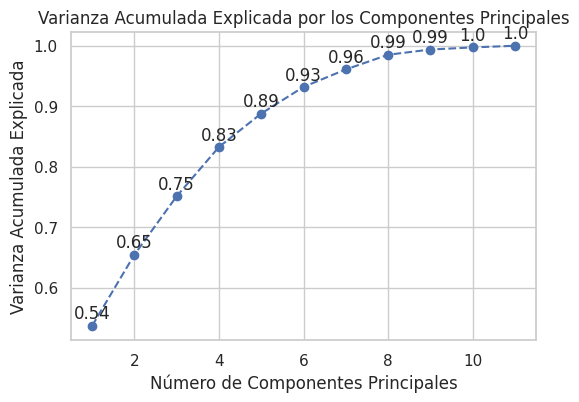

In [628]:
# Fit PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance with labels
plt.figure(figsize=(6, 4))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker="o",
    linestyle="--",
)

# Add labels to each point
for i, txt in enumerate(cumulative_variance):
    plt.annotate(
        f"{round(txt, 2)}",
        (i + 1, txt),
        textcoords="offset points",
        xytext=(0, 5),
        ha="center",
    )

plt.title("Varianza Acumulada Explicada por los Componentes Principales")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.grid(True)
plt.show()

**Se puede identificar que al rededor del 65% de la Varianza Total está representada por los 2 primeros Componentes Principales**


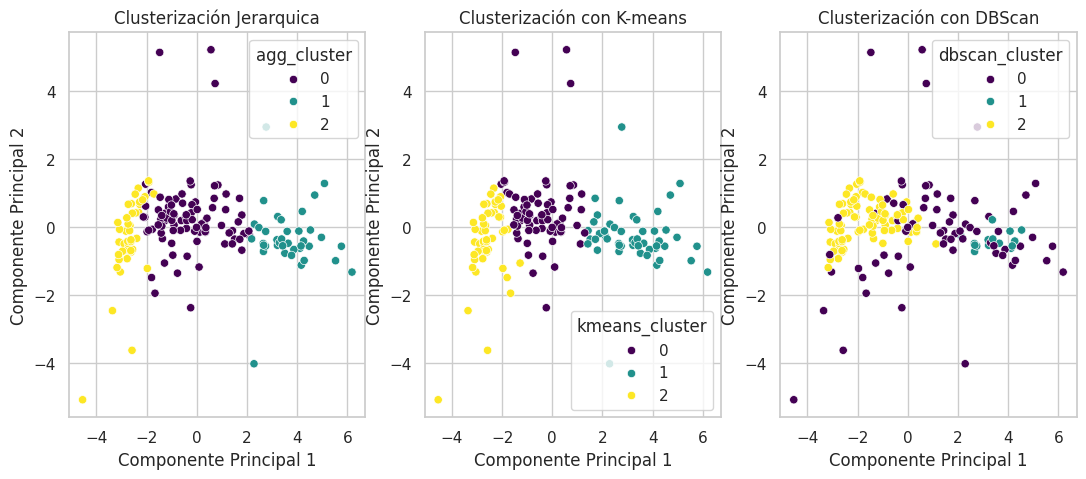

In [629]:
# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Visualización de la clusterización usando los dos primeros componentes principales de PCA
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["agg_cluster"], palette="viridis"
)
plt.title("Clusterización Jerarquica")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.subplot(1, 3, 2)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["kmeans_cluster"], palette="viridis"
)
plt.title("Clusterización con K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.subplot(1, 3, 3)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["dbscan_cluster"], palette="viridis"
)
plt.title("Clusterización con DBScan")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.show()

## Evaluando la composición de los Clusters de cada modelo

Para esta evaluación de usarán los métodos: **_Matriz de Similitud_**, **_Coeficiente de Silueta_** y **_Davies-Bouldin Index_** dado que los cluster son convexos de acuerdo a la visualización de los PCA


In [630]:
# Definiendo Funciones
def calculate_similarity_matrix(data, method="euclidean"):
    return pairwise_distances(data, metric=method)


def plot_similarity_matrix(matrix, title):
    plt.figure(figsize=(5, 3))
    sns.heatmap(matrix, cmap="viridis", annot=False)
    plt.title(title)
    plt.show()


def plot_silhouette_score(data, clusters, title):
    silhouette_avg = silhouette_score(data, clusters)
    sample_silhouette_values = silhouette_samples(data, clusters)

    plt.figure(figsize=(5, 3))
    y_lower = 10

    for i in range(max(clusters) + 1):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / max(clusters))
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        plt.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            color="red",
            fontweight="bold",
            verticalalignment="center",
        )

        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f"{title} - Coeficiente de Silueta: {silhouette_avg}")
    plt.xlabel("Valores del Coeficiente de Silueta")
    plt.ylabel("Etiqueta del Cluster")
    plt.show()


def calculate_davies_bouldin_index(data, clusters):
    return davies_bouldin_score(data, clusters)

### Evaluando Matriz de Similitud


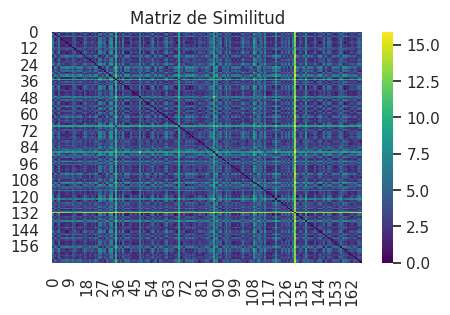

In [631]:
agg_similarity_matrix = calculate_similarity_matrix(df_scaled, method="euclidean")
plot_similarity_matrix(agg_similarity_matrix, "Matriz de Similitud")

**Al analizar la Matriz de Similitud de los datos, no se pueden encontrar a simple vista los clusters generados por los métodos de agrupación**


### Coeficiente de Silueta

Los valores más cercanos a 1 indican una mejor partición.


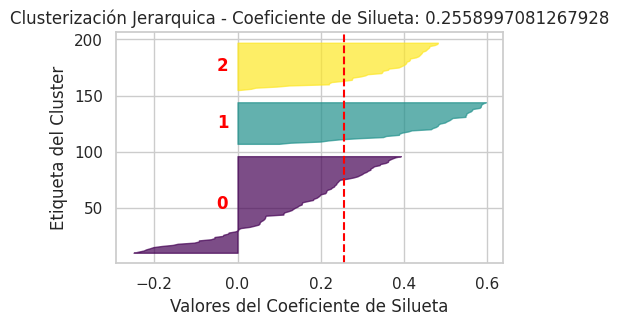

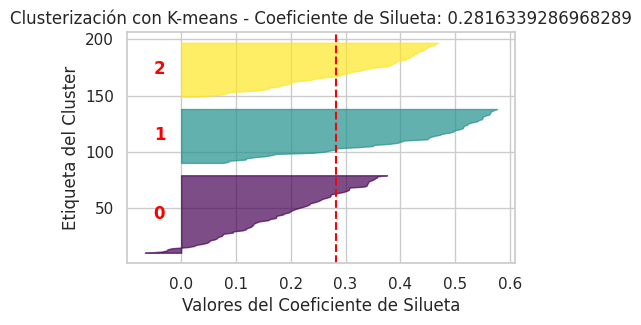

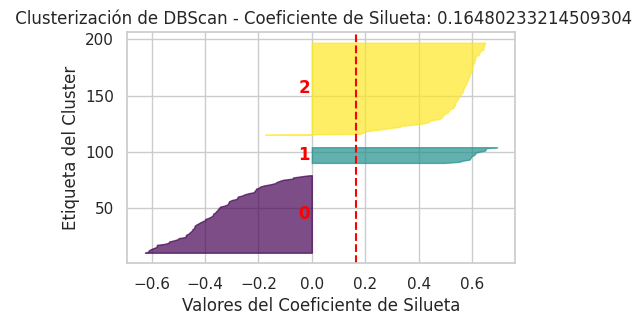

In [632]:
plot_silhouette_score(df_scaled, df["agg_cluster"], "Clusterización Jerarquica")
plot_silhouette_score(df_scaled, df["kmeans_cluster"], "Clusterización con K-means")
plot_silhouette_score(df_scaled, df["dbscan_cluster"], " Clusterización de DBScan")

**Se puede concluir que:**

-La Clusterización de BDScan se debe descartar porque hay una silueta negativa.

-La mejor Clusterización es realizada por el modelo de K-Means


### Davies-Bouldin Index

Los valores más cercanos a cero indican una mejor partición.


In [633]:
# Hierarchical Clustering
agg_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df["agg_cluster"])
print(f"Hierarchical Clustering Davies-Bouldin Index: {agg_davies_bouldin}")

# K-means Clustering
kmeans_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df["kmeans_cluster"])
print(f"K-means Clustering Davies-Bouldin Index: {kmeans_davies_bouldin}")

# DBScan Clustering
dbscan_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df["dbscan_cluster"])
print(f"DBScan Clustering Davies-Bouldin Index: {dbscan_davies_bouldin}")

Hierarchical Clustering Davies-Bouldin Index: 1.2821044404346384
K-means Clustering Davies-Bouldin Index: 1.3386266401572458
DBScan Clustering Davies-Bouldin Index: 1.8531779560340595


**De acuerdo con el Índice de Davies-Bouldin**

Se puede concluir que los mejores modelos son los de Clusterización Jerarquica y de K-Means


#### En Conclusión, el método de BDScan no es viable para este caso, dado que es un método para datos con clusterización No Convexa y se puede identificar en las gráficas de los 2 primeros componentes principales, que la clusterización es Convexa.


### Density-Based Cluster Validation (DBCV)\*

**\*NOTA:** Se aplica este método solo para experimentar cómo se utiliza. Sin embargo, se tiene claro que es un método para Clustering No convexo, y por lo tanto, no tiene sentido en este caso.


In [634]:
agg_score = dbcv.dbcv(df_scaled, df["agg_cluster"])
kmeans_score = dbcv.dbcv(df_scaled, df["kmeans_cluster"])
hdbscan_score = dbcv.dbcv(df_scaled, df["dbscan_cluster"])

print(f"DBCV Score para Clusterización Jerarquica {agg_score}")
print(f"DBCV Score para Clusterización con K-Means {kmeans_score}")
print(f"DBCV Score para Clusterización con DBScan {hdbscan_score}")

DBCV Score para Clusterización Jerarquica -0.8559984331973807
DBCV Score para Clusterización con K-Means -0.7425060762878016
DBCV Score para Clusterización con DBScan -0.1606617362226427


## Evaluando cuál es el mejor valor de K

Se decarta el modelo de BDScan para esta evaluación, porque es evidente que K-Means y Clustering Jerarquicos son mucho mejores para este caso.


#### Función para probar modelos con diferentes K


In [635]:
def probar_modelos(k):
    # Clusterización Jerarquica
    agg_cluster = AgglomerativeClustering(
        n_clusters=k, metric="euclidean", linkage="ward"
    )
    df["agg_cluster"] = agg_cluster.fit_predict(df_scaled)

    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df["kmeans_cluster"] = kmeans.fit_predict(df_scaled)

    # Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled)

    # Visualización de la clusterización usando los dos primeros componentes principales de PCA
    plt.figure(figsize=(13, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x=pca_result[:, 0], y=pca_result[:, 1], hue=df["agg_cluster"], palette="viridis"
    )
    plt.title("Clusterización Jerarquica")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")

    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x=pca_result[:, 0],
        y=pca_result[:, 1],
        hue=df["kmeans_cluster"],
        palette="viridis",
    )
    plt.title("Clusterización con K-means")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")

    plt.show()

    plot_silhouette_score(df_scaled, df["agg_cluster"], "Clusterización Jerarquica")
    plot_silhouette_score(df_scaled, df["kmeans_cluster"], "Clusterización con K-means")

    # Hierarchical Clustering
    agg_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df["agg_cluster"])
    print(f"Hierarchical Clustering Davies-Bouldin Index: {agg_davies_bouldin}")

    # K-means Clustering
    kmeans_davies_bouldin = calculate_davies_bouldin_index(
        df_scaled, df["kmeans_cluster"]
    )
    print(f"K-means Clustering Davies-Bouldin Index: {kmeans_davies_bouldin}")

#### **K=2**


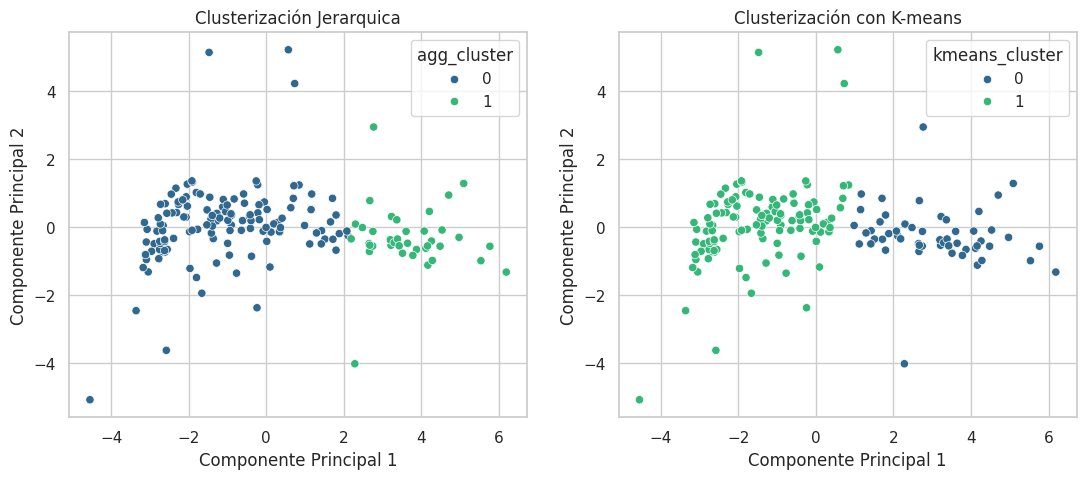

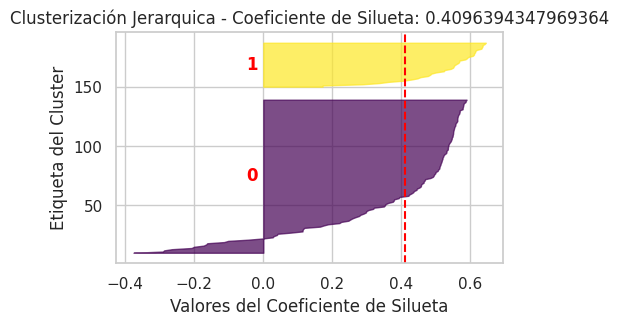

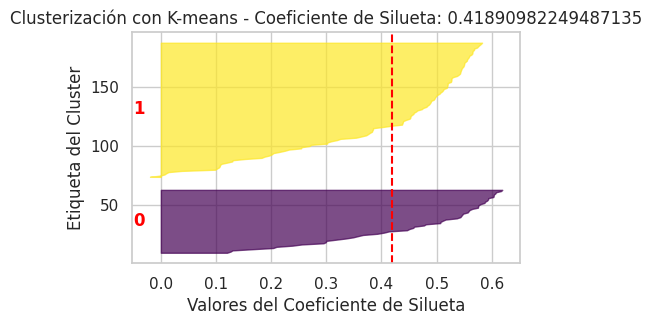

Hierarchical Clustering Davies-Bouldin Index: 0.8538569426574164
K-means Clustering Davies-Bouldin Index: 0.9116467845733178


In [636]:
df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)

probar_modelos(2)

#### **K=3**


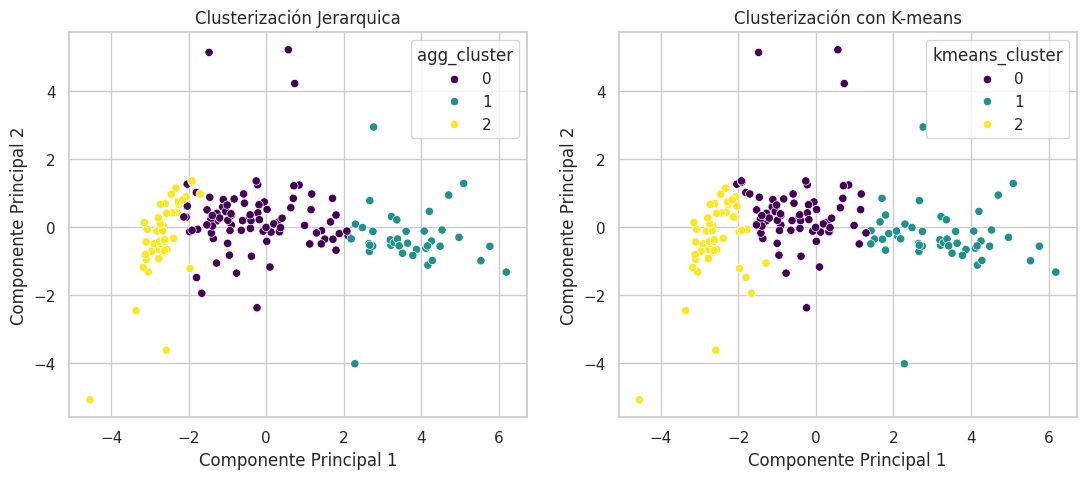

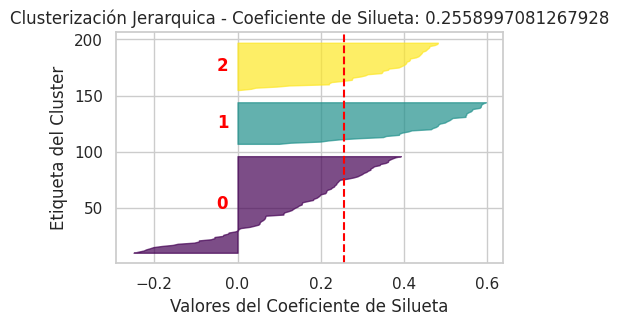

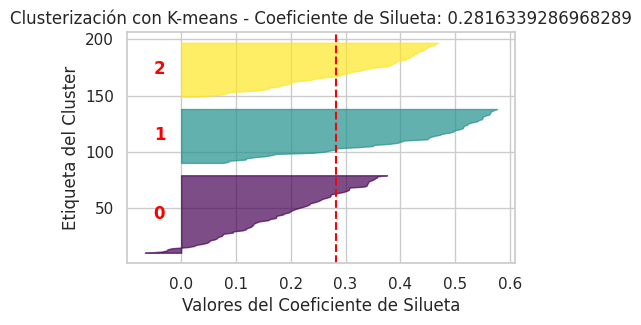

Hierarchical Clustering Davies-Bouldin Index: 1.2821044404346384
K-means Clustering Davies-Bouldin Index: 1.3386266401572458


In [637]:
df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)

probar_modelos(3)

#### **K=4**


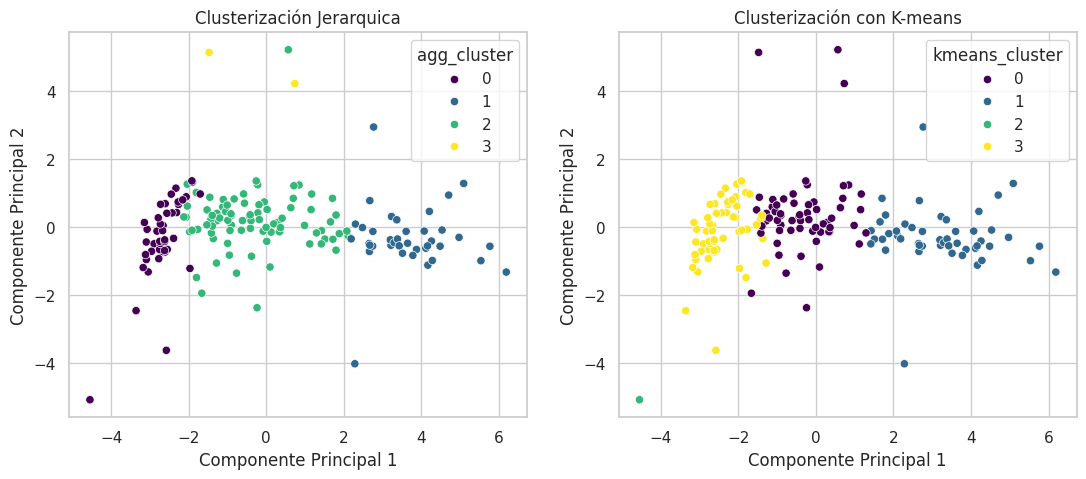

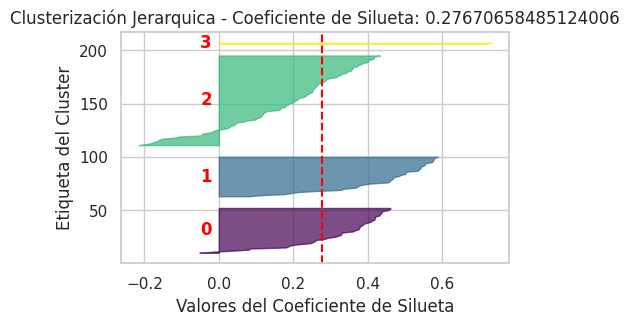

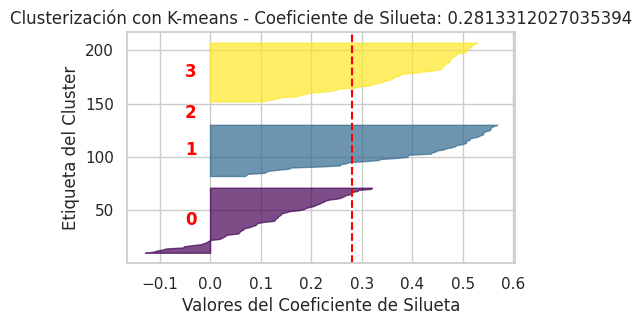

Hierarchical Clustering Davies-Bouldin Index: 1.0113769509323116
K-means Clustering Davies-Bouldin Index: 1.04626194902682


In [638]:
df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)
probar_modelos(4)

### Conclusión selección de K:

**Se identifica que la mejor distribución es cuando el número de cluster (k) es igual a 2, dado que las métricas de evaluación del `coeficiente de silueta` e `Índice de Davies-Bouldin` dan mejores resultados que cuando K es igual a 3 o a 4.**


## Determinando la Estrategia más adecuada.

Para esto, se van a analizar los clusters generados por los modelos de `K-Means` y de `Clusterización Jerrquica` con **K=2**, para determinar cuál de los dos es la mejor opción para este caso.


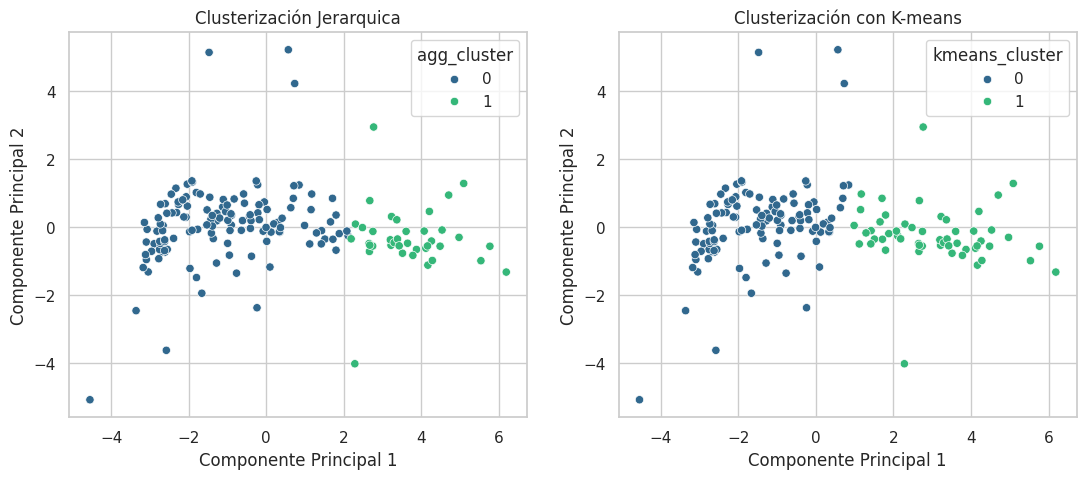

In [639]:
df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)

# cluster jeraquico
agg_cluster = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
df["agg_cluster"] = agg_cluster.fit_predict(df_scaled)
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(df_scaled)
df["kmeans_cluster"].replace({1: 0, 0: 1}, inplace=True)


# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
# Visualización de la clusterización usando los dos primeros componentes principales de PCA
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["agg_cluster"], palette="viridis"
)
plt.title("Clusterización Jerarquica")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["kmeans_cluster"], palette="viridis"
)
plt.title("Clusterización con K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

### Analizando Variables por cada Cluster

#### Analisis visual con Boxplots


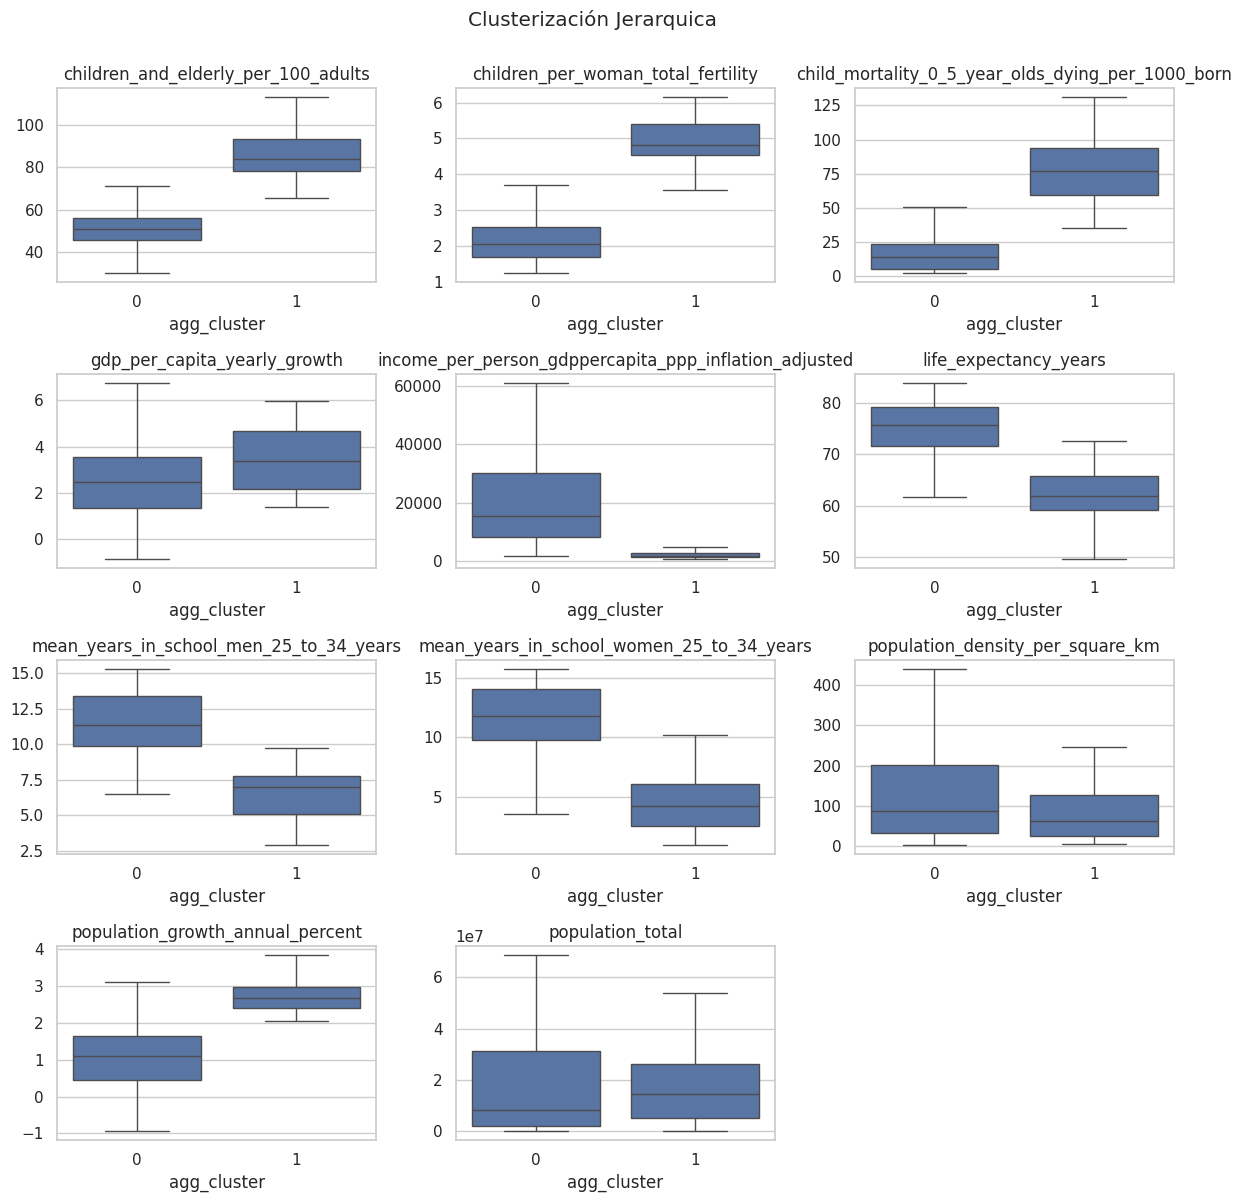

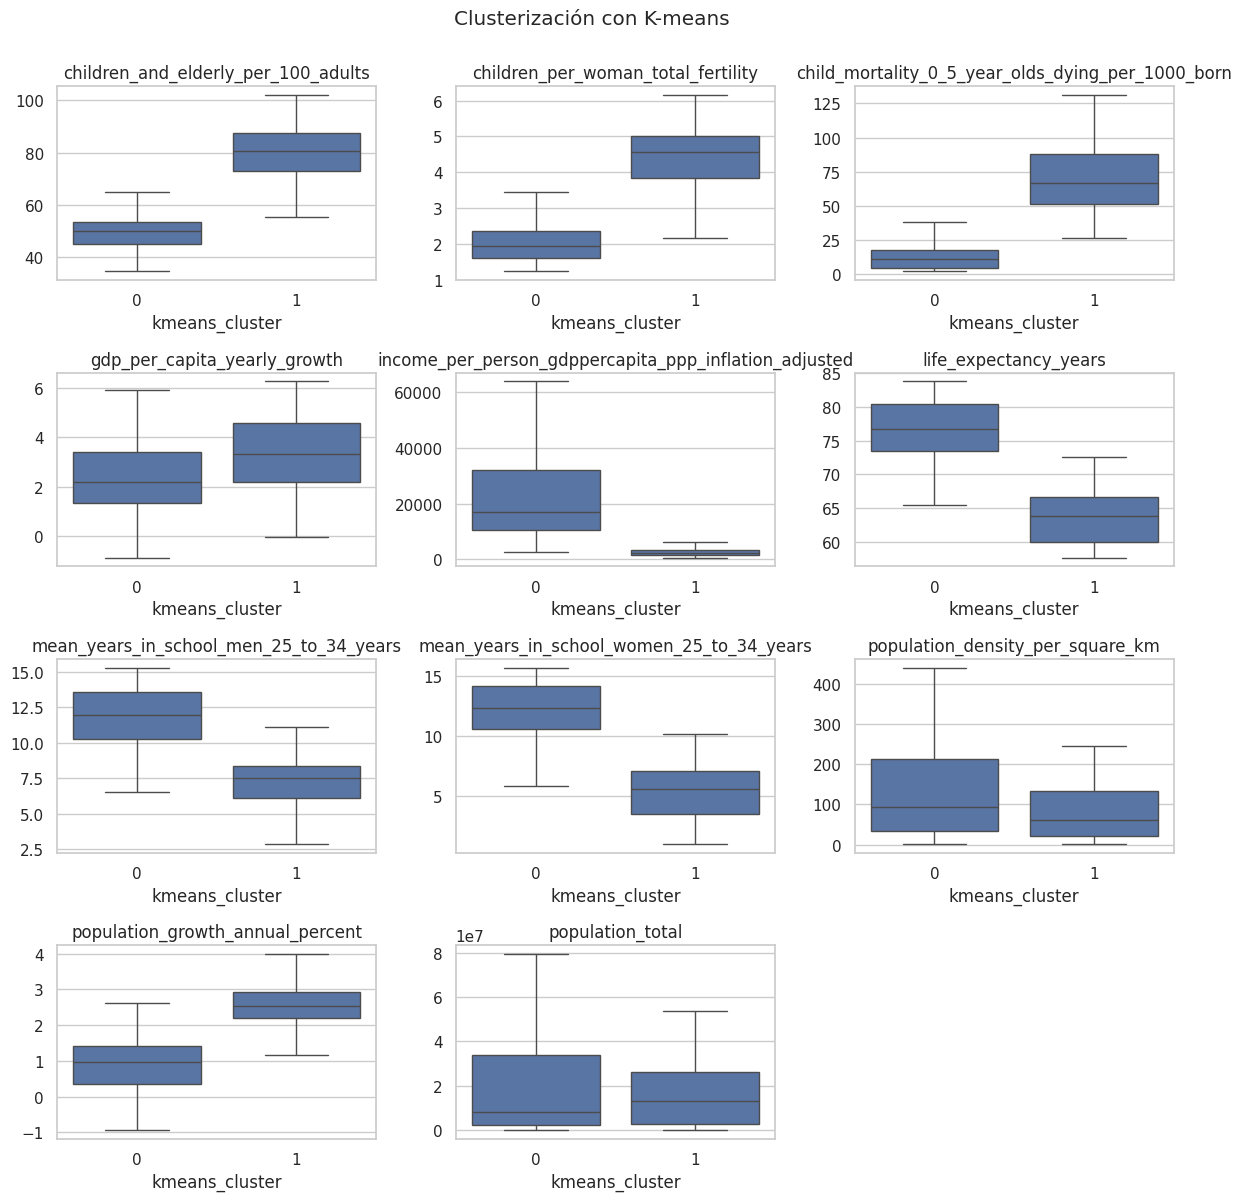

In [640]:
# Function to create boxplots for each numerical variable
def plot_boxplots(df, cluster_column, title):
    numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
    numerical_columns = numerical_columns.drop(["Date", "agg_cluster"])

    plt.figure(figsize=(12, 12))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x=cluster_column, y=column, data=df, showfliers=False)
        plt.title(f"{column}")
        plt.ylabel("")  # Remove y-axis label

    plt.suptitle(title, y=1)
    plt.tight_layout()
    plt.show()


# Create boxplots for each clustering method
plot_boxplots(df, "agg_cluster", "Clusterización Jerarquica")
plot_boxplots(df, "kmeans_cluster", "Clusterización con K-means")

##### Se puede evidenciar que la distribución de las variables, después de eliminar outliers, tienen diferencias significativas entre los cluster creados por cada uno de los modelos.


#### Valor promedio y mediano de las variables para cada Cluster


In [641]:
# Function to create a table with mean and median values for each variable and cluster
def create_mean_median_table(df, cluster_column, title):
    numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
    numerical_columns = numerical_columns.drop(["Date", "agg_cluster"])

    # Create an empty DataFrame to store mean and median values
    summary_table = pd.DataFrame(index=numerical_columns)

    # Calculate mean and median for each variable and cluster
    for cluster_label in sorted(df[cluster_column].unique()):
        cluster_data = df[df[cluster_column] == cluster_label][numerical_columns]
        cluster_mean = cluster_data.mean()
        cluster_median = cluster_data.median()

        summary_table[f"{cluster_column}_{cluster_label}_mean"] = cluster_mean
        summary_table[f"{cluster_column}_{cluster_label}_median"] = cluster_median

    # Set the float_format to avoid scientific notation
    pd.options.display.float_format = "{:.2f}".format

    # Display the summary table
    display(summary_table)


# Create mean and median tables for each clustering method
create_mean_median_table(df, "agg_cluster", "Hierarchical Clustering")
create_mean_median_table(df, "kmeans_cluster", "K-means Clustering")

,agg_cluster_0_mean,agg_cluster_0_median,agg_cluster_1_mean,agg_cluster_1_median
children_and_elderly_per_100_adults,51.66,51.00,85.39,83.75
children_per_woman_total_fertility,2.20,2.05,4.91,4.82
child_mortality_0_5_year_olds_dying_per_1000_born,18.03,13.85,79.02,76.90
gdp_per_capita_yearly_growth,2.80,2.49,3.79,3.40
income_per_person_gdppercapita_ppp_inflation_adjusted,21818.54,15250.00,2908.87,1865.00
life_expectancy_years,74.98,75.60,62.33,61.85
mean_years_in_school_men_25_to_34_years,11.45,11.35,6.52,7.02
mean_years_in_school_women_25_to_34_years,11.51,11.80,4.46,4.26
population_density_per_square_km,225.82,86.70,104.31,61.90
population_growth_annual_percent,1.13,1.11,2.68,2.67


,kmeans_cluster_0_mean,kmeans_cluster_0_median,kmeans_cluster_1_mean,kmeans_cluster_1_median
children_and_elderly_per_100_adults,49.37,50.20,80.22,80.65
children_per_woman_total_fertility,2.04,1.95,4.45,4.58
child_mortality_0_5_year_olds_dying_per_1000_born,13.95,11.50,69.57,66.65
gdp_per_capita_yearly_growth,2.75,2.21,3.60,3.34
income_per_person_gdppercapita_ppp_inflation_adjusted,24043.07,16850.00,3815.50,2225.00
life_expectancy_years,76.32,76.70,63.26,63.85
mean_years_in_school_men_25_to_34_years,11.82,12.00,7.20,7.51
mean_years_in_school_women_25_to_34_years,12.04,12.35,5.41,5.58
population_density_per_square_km,245.05,93.25,99.73,61.90
population_growth_annual_percent,1.01,0.95,2.49,2.54


**Es evidente que los clusters generados por cada método son similares, por lo tanto, se va a elegir el que tenga una mejor visualización del coeficiente de silueta para analizar los resultados**


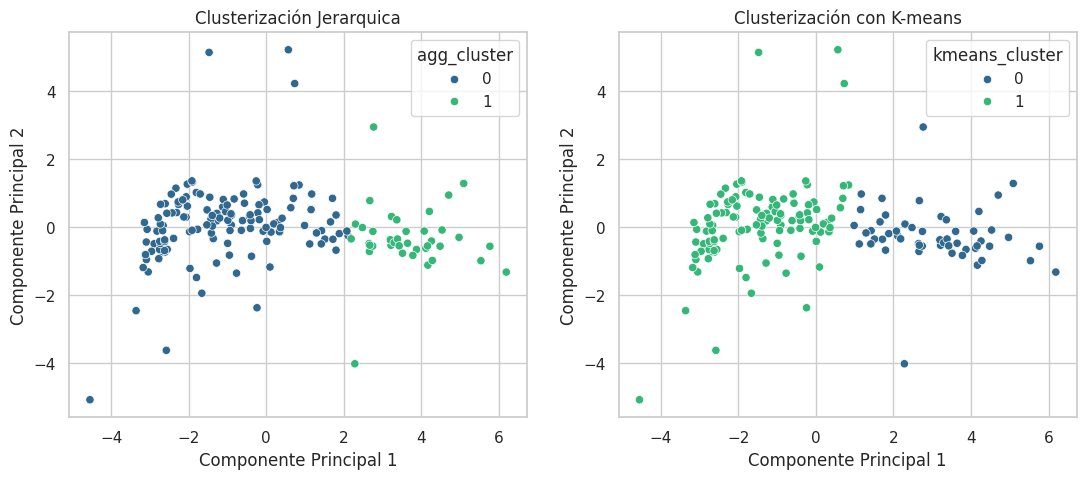

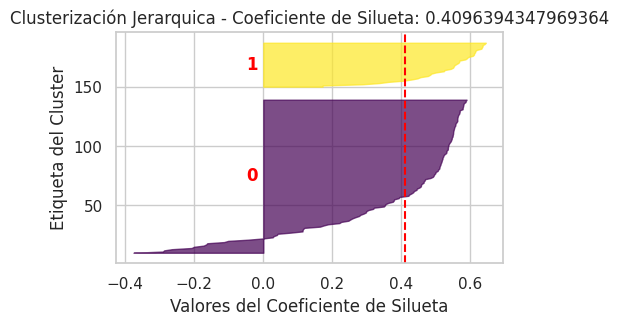

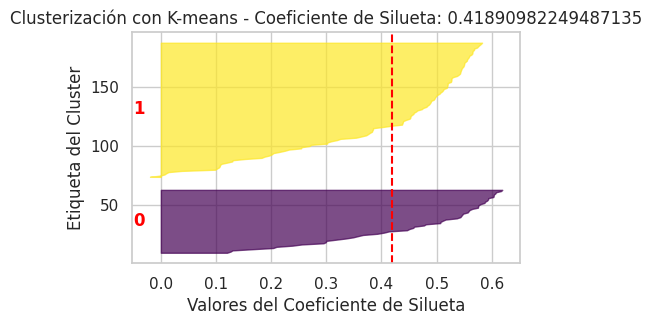

Hierarchical Clustering Davies-Bouldin Index: 0.8538569426574164
K-means Clustering Davies-Bouldin Index: 0.9116467845733178


In [642]:
df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)

probar_modelos(2)

#### **Dado que la visualización del coeficiente de silueta del K-Means se mantienen en terreno positivo, se concluye que este es el mejor método de Clusterización para este caso**


## Análisis de la Clusterización Generada


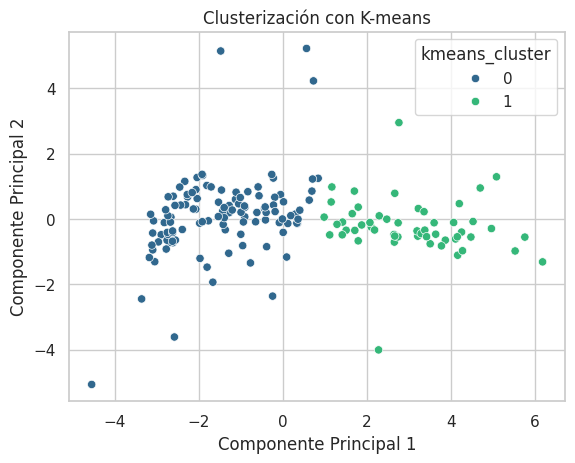

In [643]:
k = 2

df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)

# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(df_scaled)
df["kmeans_cluster"].replace({1: 0, 0: 1}, inplace=True)


# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["kmeans_cluster"], palette="viridis"
)
plt.title("Clusterización con K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [644]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
numerical_columns = numerical_columns.drop(["Date"])
# Create an empty DataFrame to store mean and median values
summary_table = pd.DataFrame(index=numerical_columns)
# Calculate mean and median for each variable and cluster
for cluster_label in sorted(df["kmeans_cluster"].unique()):
    cluster_data = df[df["kmeans_cluster"] == cluster_label][numerical_columns]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_mean'] = cluster_mean
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_median'] = cluster_median
# Set the float_format to avoid scientific notation
pd.options.display.float_format = "{:.2f}".format
# Display the summary table
display(summary_table)

,kmeans_cluster_0_mean,kmeans_cluster_0_median,kmeans_cluster_1_mean,kmeans_cluster_1_median
children_and_elderly_per_100_adults,49.37,50.20,80.22,80.65
children_per_woman_total_fertility,2.04,1.95,4.45,4.58
child_mortality_0_5_year_olds_dying_per_1000_born,13.95,11.50,69.57,66.65
gdp_per_capita_yearly_growth,2.75,2.21,3.60,3.34
income_per_person_gdppercapita_ppp_inflation_adjusted,24043.07,16850.00,3815.50,2225.00
life_expectancy_years,76.32,76.70,63.26,63.85
mean_years_in_school_men_25_to_34_years,11.82,12.00,7.20,7.51
mean_years_in_school_women_25_to_34_years,12.04,12.35,5.41,5.58
population_density_per_square_km,245.05,93.25,99.73,61.90
population_growth_annual_percent,1.01,0.95,2.49,2.54


##### Basado en los resultados de la clusterización, podemos definir los 2 grupos de países con características muy diferentes:

**Grupo 1**:

- Al rededor de 50 niños y ancianos por 100 adultos.
- Al rededor de 2 niños por mujer.
- Mueren en promedio 14 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 2,75 en promedio.
- Ingreso promedio por persona de 24.043
- Esperanza de vida promedio de 76 años.
- 12 Años de educación promedio en hombres entre 25 y 34 años.
- 12 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 93
- Crecimiento anual de la población promedio de 1%
- Población total promeido de 51.710.961

**Grupo 2**:

- Al rededor de 80 niños y ancianos por 100 adultos.
- Al rededor de 4.5 niños por mujer.
- Mueren en promedio 70 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 3,6 en promedio.
- Ingreso promedio por persona de 3.815
- Esperanza de vida promedio de 63 años.
- 7 Años de educación promedio en hombres entre 25 y 34 años.
- 5 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 62
- Crecimiento anual de la población promedio de 2.5%
- Población total promeido de 22.626.740


#### Analisis Geoespacial de los países con su respectivo cluster

Para esto se carga la librería de geopandas con el detalle de países y se trata de cruzar cada país con su respectivo indicativo para posteriormente gráficarlo.


In [645]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print(world.dtypes)
world.head()

/tmp/ipykernel_306481/4286800217.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


pop_est        float64
continent       object
name            object
iso_a3          object
gdp_md_est       int64
geometry      geometry
dtype: object


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.00,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.00,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [646]:
# Filter world map to include only countries present in the DataFrame
world_subset = world[world["name"].isin(df["country"])].reset_index(drop=True)
print(len(world_subset))
print(world_subset.dtypes)
world_subset.head()

139
pop_est        float64
continent       object
name            object
iso_a3          object
gdp_md_est       int64
geometry      geometry
dtype: object


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
3,18513930.00,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
4,33580650.00,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."


**Podemos identificar que de 168 países, 139 tienen un nombre que coincide perfectamente con los nombres de geopandas DataSet. Sin embargo, se tratará de cruzar de manera manual los que no coinciden exactamente**


In [647]:
# Países que no cruzaron
print(
    "No cruzaron por el nombre ",
    len(list(df[df["country"].isin(world_subset["name"]) == False]["country"])),
    " países",
)
list(df[df["country"].isin(world_subset["name"]) == False]["country"])

No cruzaron por el nombre  29  países


['Antigua and Barbuda',
 'Bahrain',
 'Barbados',
 'Bosnia and Herzegovina',
 'Cape Verde',
 'Central African Republic',
 'Comoros',
 "Cote d'Ivoire",
 'Czech Republic',
 'Dominican Republic',
 'Equatorial Guinea',
 'Grenada',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Maldives',
 'Malta',
 'Mauritius',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Singapore',
 'Slovak Republic',
 'Solomon Islands',
 'South Sudan',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Tonga',
 'United States']

In [648]:
# Mapenado los códigos iso_a3 de los países que no cruzaron por nombre

list_of_codes = [
    "ATG",  #'Antigua and Barbuda'
    "BHR",  #'Bahrain'
    "BRB",  #'Barbados
    "BIH",  #'Bosnia and Herzegovina'
    "CPV",  #'Cape Verde
    "CAF",  #'Central African Republic'
    "COM",  #'Comoros'
    "CZE",  #'Czech Republic'
    "DOM",  #'Dominican Republic'
    "GNQ",  # Equatorial Guinea
    "GRD",  #'Grenada'
    "KIR",  # Kiribati
    "LAO",  # Lao
    "MDV",  # Maldives
    "MLT",  # Malta
    "MUS",  # Mauritius
    "WSM",  # Samoa
    "STP",  # Sao Tome and Principe
    "SYC",  # Seychelles
    "SGP",  # Singapore
    "SVK",  # Slovak Republic
    "SLB",  # Solomon Islands
    "SSD",  # South Sudan
    "LCA",  # St. Lucia
    "VCT",  # St. Vincent and the Grenadine
    "TON",  # Tonga
    "USA",  # United States
]

subset_world_2 = world[world["iso_a3"].isin(list_of_codes)]
len(subset_world_2)

10

In [649]:
df = df.merge(
    world[["name", "iso_a3"]], left_on="country", right_on="name", how="left"
).drop(columns="name")
df.loc[df["country"] == "United States", "iso_a3"] = "USA"
df.loc[df["country"] == "Bosnia and Herzegovina", "iso_a3"] = "BIH"
df.loc[df["country"] == "Dominican Republic", "iso_a3"] = "DOM"
df.loc[df["country"] == "Central African Republic", "iso_a3"] = "CAF"
df.loc[df["country"] == "Equatorial Guinea", "iso_a3"] = "GNQ"
df.loc[df["country"] == "Lao", "iso_a3"] = "LAO"
df.loc[df["country"] == "Solomon Islands", "iso_a3"] = "SLB"
df.loc[df["country"] == "Slovak Republic", "iso_a3"] = "SVK"
df.loc[df["country"] == "Czech Republic", "iso_a3"] = "CZE"
df.loc[df["country"] == "South Sudan", "iso_a3"] = "SSD"
df = df.dropna().reset_index(drop=True)
df.head()

,country,Date,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total,kmeans_cluster,iso_a3
0,Afghanistan,2015,87.00,4.80,73.20,2.11,1750,57.90,4.13,0.98,51.70,2.94,33700000,1,AFG
1,Albania,2015,44.80,1.71,14.00,3.82,11000,77.60,12.00,12.30,107.00,-0.29,2920000,0,ALB
2,Algeria,2015,52.60,2.84,25.50,2.10,13700,77.30,8.52,7.74,16.70,1.92,39900000,0,DZA
3,Angola,2015,99.90,5.77,86.50,2.46,6230,64.00,7.24,5.31,22.30,3.43,27900000,1,AGO
4,Argentina,2015,56.50,2.31,11.60,-0.13,19100,76.50,12.00,13.00,15.90,1.01,43400000,0,ARG


In [650]:
df.iso_a3.isna().value_counts()

False    149
Name: iso_a3, dtype: int64

In [651]:
print(f"No cruzaron {167-len(df)} paises")

No cruzaron 18 paises


In [652]:
# Filter world map to include only countries present in the DataFrame
world_subset = world[world["iso_a3"].isin(df["iso_a3"])].copy()
world_subset["kmeans_cluster"] = df["kmeans_cluster"].copy()
# world_subset.dropna()
print(world_subset.shape)
world_subset.head()

(149, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,kmeans_cluster
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.00
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.00
3,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.00
4,328239523.00,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.00
5,18513930.00,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.00


In [653]:
world_subset.iso_a3.isna().value_counts()

False    149
Name: iso_a3, dtype: int64

In [654]:
df_map = world.merge(df, on="iso_a3", how="left").dropna()
df_map.drop(columns=["Date", "pop_est", "gdp_md_est"], inplace=True)
df_map["kmeans_cluster"] = df_map["kmeans_cluster"].astype(int)
df_map["population_total"] = df_map["population_total"].astype(int)
print(df_map.dtypes)
df_map.head()

continent                                                  object
name                                                       object
iso_a3                                                     object
geometry                                                 geometry
country                                                    object
children_and_elderly_per_100_adults                       float64
children_per_woman_total_fertility                        float64
child_mortality_0_5_year_olds_dying_per_1000_born         float64
gdp_per_capita_yearly_growth                              float64
income_per_person_gdppercapita_ppp_inflation_adjusted     float64
life_expectancy_years                                     float64
mean_years_in_school_men_25_to_34_years                   float64
mean_years_in_school_women_25_to_34_years                 float64
population_density_per_square_km                          float64
population_growth_annual_percent                          float64
population

,continent,name,iso_a3,geometry,country,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total,kmeans_cluster
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,52.80,2.54,22.50,1.80,8760.00,65.50,11.60,12.10,48.80,0.71,892000,0
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,93.80,5.08,58.80,3.88,2490.00,63.50,7.96,7.06,60.80,3.10,53900000,1
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,47.30,1.59,5.10,1.34,43000.00,81.70,15.30,15.70,3.95,0.83,35900000,0
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,50.90,1.93,6.60,2.15,52800.00,78.80,14.60,15.10,35.00,0.76,320000000,0
5,Asia,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,50.30,2.66,12.60,4.63,23500.00,71.60,13.40,13.90,6.57,1.46,17700000,0


In [664]:
import folium

# Assuming df contains the socio-demographic data with 'country', 'kmeans_cluster', and 'Geometry' columns

# Create a Folium map centered on the world
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer based on kmeans clusters
folium.Choropleth(
    geo_data=df_map[
        ["country", "kmeans_cluster", "geometry"]
    ].to_json(),  # Use only relevant columns
    data=df_map,
    columns=["country", "kmeans_cluster"],
    key_on="feature.properties.country",
    fill_color="YlGnBu",  # Choose a color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="K-means Clusters",
).add_to(world_map)

# Display the map
world_map

## Conclusión grupos pertinentes a encontrar

**De acuerdo a las métricas de evaluación de los modelos, se había definido que el número de clusters óptimo era k=2. Sin embargo, al análizar estos clusters geoespacialmente, se concluye que no tiene sentido meter en el mismo cluster a países latinoaméricanos con países europeos.**

**Por lo tanto, se reconsidera el número de grupos y se asigna nuevamente un número de clustes óptimo de k=3**


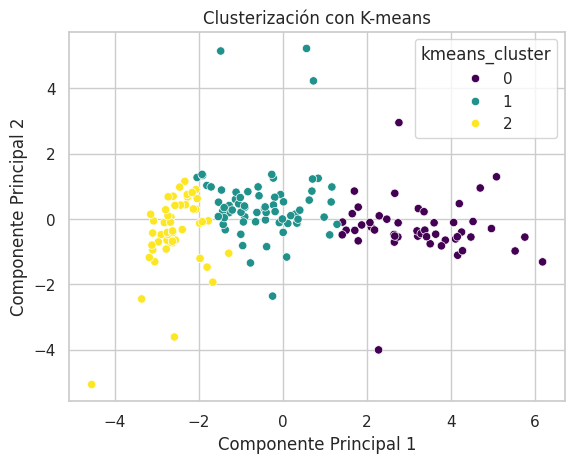

In [656]:
k = 3

df = pd.read_csv("data_gapminder_experiment.csv", delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float = df.columns.drop(
    [
        "country",
        "Date",
        "income_per_person_gdppercapita_ppp_inflation_adjusted",
        "population_total",
    ]
)

for column in columns_to_float:
    df[column] = df[column].apply(lambda x: x.replace(",", ".")).astype(float)

# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(df_scaled)
df["kmeans_cluster"].replace({1: 0, 0: 1}, inplace=True)


# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1], hue=df["kmeans_cluster"], palette="viridis"
)
plt.title("Clusterización con K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [657]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
numerical_columns = numerical_columns.drop(["Date"])
# Create an empty DataFrame to store mean and median values
summary_table = pd.DataFrame(index=numerical_columns)
# Calculate mean and median for each variable and cluster
for cluster_label in sorted(df["kmeans_cluster"].unique()):
    cluster_data = df[df["kmeans_cluster"] == cluster_label][numerical_columns]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_mean'] = cluster_mean
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_median'] = cluster_median
# Set the float_format to avoid scientific notation
pd.options.display.float_format = "{:.2f}".format
# Display the summary table
display(summary_table)

,kmeans_cluster_0_mean,kmeans_cluster_0_median,kmeans_cluster_1_mean,kmeans_cluster_1_median,kmeans_cluster_2_mean,kmeans_cluster_2_median
children_and_elderly_per_100_adults,82.04,81.80,51.17,50.95,48.13,49.50
children_per_woman_total_fertility,4.62,4.65,2.34,2.31,1.69,1.68
child_mortality_0_5_year_olds_dying_per_1000_born,73.24,68.90,21.35,17.05,5.39,4.00
gdp_per_capita_yearly_growth,3.65,3.45,3.43,2.99,1.82,1.64
income_per_person_gdppercapita_ppp_inflation_adjusted,3570.35,2050.00,11478.57,10800.00,40173.47,34400.00
life_expectancy_years,62.81,63.50,73.64,74.25,79.27,80.70
mean_years_in_school_men_25_to_34_years,7.14,7.51,10.35,10.60,13.51,13.80
mean_years_in_school_women_25_to_34_years,5.28,5.31,10.29,10.85,14.01,14.40
population_density_per_square_km,100.41,60.80,160.23,79.05,350.70,108.00
population_growth_annual_percent,2.56,2.57,1.28,1.19,0.70,0.71


##### Basado en los resultados de la clusterización, podemos definir los 2 grupos de países con características muy diferentes:

**Grupo 0**:

- Al rededor de 48 niños y ancianos por 100 adultos.
- Al rededor de 1,7 niños por mujer.
- Mueren en promedio 5 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 1,82 en promedio.
- Ingreso promedio por persona de 40.173
- Esperanza de vida promedio de 79 años.
- 13,5 Años de educación promedio en hombres entre 25 y 34 años.
- 14 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 108
- Crecimiento anual de la población promedio de 0,7%
- Población total promeido de 26.689.957

**Grupo 1**:

- Al rededor de 51 niños y ancianos por 100 adultos.
- Al rededor de 2.3 niños por mujer.
- Mueren en promedio 21 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 3,43 en promedio.
- Ingreso promedio por persona de 11.478
- Esperanza de vida promedio de 74 años.
- 10 Años de educación promedio en hombres entre 25 y 34 años.
- 10 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 79
- Crecimiento anual de la población promedio de 1,28%
- Población total promedio de 66.431.667

**Grupo 2**:

- Al rededor de 82 niños y ancianos por 100 adultos.
- Al rededor de 4.6 niños por mujer.
- Mueren en promedio 73 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 3,6 en promedio.
- Ingreso promedio por persona de 3.570
- Esperanza de vida promedio de 63 años.
- 7 Años de educación promedio en hombres entre 25 y 34 años.
- 5 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 60
- Crecimiento anual de la población promedio de 2.5%
- Población total promeido de 23.650.387


#### Analisis Geoespacial de los países con su respectivo cluster

Para esto se carga la librería de geopandas con el detalle de países y se trata de cruzar cada país con su respectivo indicativo para posteriormente gráficarlo.


In [658]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# Filter world map to include only countries present in the DataFrame
world_subset = world[world["name"].isin(df["country"])].reset_index(drop=True)
print(len(world_subset))
print(world_subset.dtypes)
world_subset.head()

139
pop_est        float64
continent       object
name            object
iso_a3          object
gdp_md_est       int64
geometry      geometry
dtype: object


/tmp/ipykernel_306481/1408454237.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
3,18513930.00,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
4,33580650.00,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."


**Podemos identificar que de 168 países, 139 tienen un nombre que coincide perfectamente con los nombres de geopandas DataSet. Sin embargo, se tratará de cruzar de manera manual los que no coinciden exactamente**


In [659]:
# Mapenado los códigos iso_a3 de los países que no cruzaron por nombre

list_of_codes = [
    "ATG",  #'Antigua and Barbuda'
    "BHR",  #'Bahrain'
    "BRB",  #'Barbados
    "BIH",  #'Bosnia and Herzegovina'
    "CPV",  #'Cape Verde
    "CAF",  #'Central African Republic'
    "COM",  #'Comoros'
    "CZE",  #'Czech Republic'
    "DOM",  #'Dominican Republic'
    "GNQ",  # Equatorial Guinea
    "GRD",  #'Grenada'
    "KIR",  # Kiribati
    "LAO",  # Lao
    "MDV",  # Maldives
    "MLT",  # Malta
    "MUS",  # Mauritius
    "WSM",  # Samoa
    "STP",  # Sao Tome and Principe
    "SYC",  # Seychelles
    "SGP",  # Singapore
    "SVK",  # Slovak Republic
    "SLB",  # Solomon Islands
    "SSD",  # South Sudan
    "LCA",  # St. Lucia
    "VCT",  # St. Vincent and the Grenadine
    "TON",  # Tonga
    "USA",  # United States
]

subset_world_2 = world[world["iso_a3"].isin(list_of_codes)]
len(subset_world_2)

10

In [660]:
df = df.merge(
    world[["name", "iso_a3"]], left_on="country", right_on="name", how="left"
).drop(columns="name")
df.loc[df["country"] == "United States", "iso_a3"] = "USA"
df.loc[df["country"] == "Bosnia and Herzegovina", "iso_a3"] = "BIH"
df.loc[df["country"] == "Dominican Republic", "iso_a3"] = "DOM"
df.loc[df["country"] == "Central African Republic", "iso_a3"] = "CAF"
df.loc[df["country"] == "Equatorial Guinea", "iso_a3"] = "GNQ"
df.loc[df["country"] == "Lao", "iso_a3"] = "LAO"
df.loc[df["country"] == "Solomon Islands", "iso_a3"] = "SLB"
df.loc[df["country"] == "Slovak Republic", "iso_a3"] = "SVK"
df.loc[df["country"] == "Czech Republic", "iso_a3"] = "CZE"
df.loc[df["country"] == "South Sudan", "iso_a3"] = "SSD"
df = df.dropna().reset_index(drop=True)

In [661]:
# Filter world map to include only countries present in the DataFrame
world_subset = world[world["iso_a3"].isin(df["iso_a3"])].copy()
world_subset["kmeans_cluster"] = df["kmeans_cluster"].copy()

In [662]:
df_map = world.merge(df, on="iso_a3", how="left").dropna()
df_map.drop(columns=["Date", "pop_est", "gdp_md_est"], inplace=True)
df_map["kmeans_cluster"] = df_map["kmeans_cluster"].astype(int)
df_map["population_total"] = df_map["population_total"].astype(int)

In [665]:
# Create a Folium map centered on the world
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer based on kmeans clusters
folium.Choropleth(
    geo_data=df_map[
        ["country", "kmeans_cluster", "geometry"]
    ].to_json(),  # Use only relevant columns
    data=df_map,
    columns=["country", "kmeans_cluster"],
    key_on="feature.properties.country",
    fill_color="YlGnBu",  # Choose a color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="K-means Clusters",
).add_to(world_map)

# Display the map
world_map

## Análisis de Resultados

Se concluye que hay una distribución mucho más coherente con un K=3, dado que se puede ver en el mapa que los países desarrollados tienen un cluster, los países en desarrollo tienen otro y finalmente hay un tercer cluster con los países más pobres.
